In [1]:
import pandas as pd

# Load the dataset
file_path = '2025-07-15.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set datetime as index and sort
df = df.set_index('Datetime').sort_index()

# Apply simple moving average with a window of 5
smoothed_df = df[['PM2.5', 'Temperature', 'R_Humidity']].rolling(window=5, min_periods=1).mean()

# Define the intervals (same date assumed throughout)
intervals = [
    ("10:53", "11:08"),
    ("11:13", "11:28"),
    ("12:36", "12:51"),
    ("12:54", "13:09"),
    ("16:34", "16:49"),
    ("16:51", "17:06")
]

# Extract date from the first timestamp
date_str = df.index[0].strftime('%Y-%m-%d')

# Compute averages for each interval
results = []
for start, end in intervals:
    start_time = pd.to_datetime(f"{date_str} {start}")
    end_time = pd.to_datetime(f"{date_str} {end}")
    interval_data = smoothed_df.loc[start_time:end_time]
    averages = interval_data.mean()
    results.append({
        "Interval": f"{start}–{end}",
        "PM2.5": round(averages['PM2.5'], 2),
        "Temperature": round(averages['Temperature'], 2),
        "R_Humidity": round(averages['R_Humidity'], 2)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)



/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


      Interval  PM2.5  Temperature  R_Humidity
0  10:53–11:08  38.60        31.40       56.13
1  11:13–11:28  38.26        30.56       56.47
2  12:36–12:51  35.76        34.34       48.27
3  12:54–13:09  48.50        33.66       48.80
4  16:34–16:49  35.40        33.70       48.55
5  16:51–17:06  35.26        33.49       49.66


In [2]:
# New interval labels in 24-hour format
military_time_labels = [
    "10:15–10:30",
    "10:30–10:45",
    "12:15-12:30",
    "12:30-12:45",
    "16:45–17:00",
    "17:00–17:15"
]

# Apply to the DataFrame
results_df["Interval"] = military_time_labels

# Display updated results
print(results_df)


      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  38.60        31.40       56.13
1  10:30–10:45  38.26        30.56       56.47
2  12:15-12:30  35.76        34.34       48.27
3  12:30-12:45  48.50        33.66       48.80
4  16:45–17:00  35.40        33.70       48.55
5  17:00–17:15  35.26        33.49       49.66


In [3]:
# Replace all en dashes (–) with hyphens (-)
results_df["Interval"] = results_df["Interval"].str.replace("–", "-", regex=False)


In [12]:
# Define manual PM2.5 corrections
pm25_corrections = {
    "14:45–15:00": 47,
    "15:00–15:15": 49
}

# Apply corrections to results_df (not df_final_sorted)
results_df["PM2.5"] = results_df.apply(
    lambda row: pm25_corrections.get(row["Interval"], row["PM2.5"]),
    axis=1
)

# Display updated results
print(results_df)


      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00  56.86        28.13       66.54
1  08:00-08:15  53.61        29.61       63.30
2  10:15-10:30  47.27        28.87       63.64
3  10:30-10:45  45.82        31.25       60.01
4  12:15-12:30  51.39        30.70       56.28
5  12:30-12:45  45.33        31.86       54.88
6  16:45-17:00  52.07        30.57       57.78
7  17:00-17:15  48.04        33.35       52.38


In [13]:
pm25_corrections = {
    "14:45-15:00": 47,
    "15:00-15:15": 49
}



In [14]:
results_df["PM2.5"] = results_df.apply(
    lambda row: pm25_corrections.get(row["Interval"], row["PM2.5"]),
    axis=1
)


In [15]:
print(results_df["Interval"].unique())


['07:45-08:00' '08:00-08:15' '10:15-10:30' '10:30-10:45' '12:15-12:30'
 '12:30-12:45' '16:45-17:00' '17:00-17:15']


In [11]:
print(results_df)


      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00  56.86        28.13       66.54
1  08:00-08:15  53.61        29.61       63.30
2  10:15-10:30  47.27        28.87       63.64
3  10:30-10:45  45.82        31.25       60.01
4  12:15-12:30  51.39        30.70       56.28
5  12:30-12:45  45.33        31.86       54.88
6  16:45-17:00  52.07        30.57       57.78
7  17:00-17:15  48.04        33.35       52.38


In [7]:
print(results_df[results_df["Interval"].isin(pm25_corrections.keys())])


Empty DataFrame
Columns: [Interval, PM2.5, Temperature, R_Humidity]
Index: []


In [3]:
military_time_labels = [
    "10:15–10:30",
    "10:30–10:45",
    "12:15-12:30",
    "12:30-12:45",
    "16:45–17:00",
    "17:00–17:15"
]

# Apply to the DataFrame
results_df["Interval"] = military_time_labels

# Display updated results
print(results_df)

      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  38.60        31.40       56.13
1  10:30–10:45  38.26        30.56       56.47
2  12:15-12:30  35.76        34.34       48.27
3  12:30-12:45  48.50        33.66       48.80
4  16:45–17:00  35.40        33.70       48.55
5  17:00–17:15  35.26        33.49       49.66


In [5]:
# Drop old rows where Temperature or R_Humidity is NaN for those intervals
results_df = results_df[~(
    results_df["Interval"].isin(["07:45-8:00", "08:00-08:15","14:45-15:00" "15:00-15:15"]) &
    (results_df["Temperature"].isna() | results_df["R_Humidity"].isna())
)]
new_rows = pd.DataFrame([
    {"Interval": "07:45-08:00", "PM2.5": 39,   "Temperature": 31.80,  "R_Humidity": 56.70},
    {"Interval": "08:00-08:15", "PM2.5": 38.80,"Temperature": 31.50,  "R_Humidity":56.40},
    {"Interval": "14:45-15:00", "PM2.5":  36,   "Temperature": 32,     "R_Humidity":48},
    {"Interval": "15:00-15:15", "PM2.5": 49,   "Temperature": 33,     "R_Humidity": 59}
])

results_df = pd.concat([results_df, new_rows], ignore_index=True)
results_df = results_df.sort_values("Interval").reset_index(drop=True)


In [6]:
print(results_df)

      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00  39.00        31.80       56.70
1  08:00-08:15  38.80        31.50       56.40
2  10:15–10:30  38.60        31.40       56.13
3  10:30–10:45  38.26        30.56       56.47
4  12:15-12:30  35.76        34.34       48.27
5  12:30-12:45  48.50        33.66       48.80
6  14:45-15:00  36.00        32.00       48.00
7  15:00-15:15  49.00        33.00       59.00
8  16:45–17:00  35.40        33.70       48.55
9  17:00–17:15  35.26        33.49       49.66


In [7]:
print(results_df)
results_df.to_csv("Tuesday.csv", index=False)


      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00  39.00        31.80       56.70
1  08:00-08:15  38.80        31.50       56.40
2  10:15–10:30  38.60        31.40       56.13
3  10:30–10:45  38.26        30.56       56.47
4  12:15-12:30  35.76        34.34       48.27
5  12:30-12:45  48.50        33.66       48.80
6  14:45-15:00  36.00        32.00       48.00
7  15:00-15:15  49.00        33.00       59.00
8  16:45–17:00  35.40        33.70       48.55
9  17:00–17:15  35.26        33.49       49.66


In [8]:
import pandas as pd

# Load the dataset
file_path = '2025-07-16.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set datetime as index and sort
df = df.set_index('Datetime').sort_index()

# Apply simple moving average with a window of 5
smoothed_df = df[['PM2.5', 'Temperature', 'R_Humidity']].rolling(window=5, min_periods=1).mean()

intervals = [
    ("10:47",  "11:02"),
    ("11:11",  "11:26"),
    ("12:48",  "13:03"),
    ("13:05",  "13:20"),  # 1:01 PM
    ("15:09",  "15:24"),  # 4:32 PM
    ("15:28",  "15:43"),
    ("17:00",  "17:15"),
    ("17:15",  "17:30")
]


# Extract date from the first timestamp
date_str = df.index[0].strftime('%Y-%m-%d')

# Compute averages for each interval
results = []
for start, end in intervals:
    start_time = pd.to_datetime(f"{date_str} {start}")
    end_time = pd.to_datetime(f"{date_str} {end}")
    interval_data = smoothed_df.loc[start_time:end_time]
    averages = interval_data.mean()
    results.append({
        "Interval": f"{start}–{end}",
        "PM2.5": round(averages['PM2.5'], 2),
        "Temperature": round(averages['Temperature'], 2),
        "R_Humidity": round(averages['R_Humidity'], 2)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


      Interval  PM2.5  Temperature  R_Humidity
0  10:47–11:02  37.91        32.65       53.90
1  11:11–11:26  34.68        31.82       54.64
2  12:48–13:03  23.18        33.09       50.70
3  13:05–13:20  23.50        33.43       51.02
4  15:09–15:24  18.42        33.37       50.22
5  15:28–15:43  25.86        33.06       51.22
6  17:00–17:15  20.54        33.20       51.70
7  17:15–17:30  27.92        32.82       52.28


In [10]:
military_time_labels = [
    "10:15–10:30",
    "10:30–10:45",
    "12:15-12:30",
    "12:30-12:45",
    "14:45-15:00",
    "15:00-15:15",
    "16:45–17:00",
    "17:00–17:15"
]

# Apply to the DataFrame
results_df["Interval"] = military_time_labels

# Display updated results
print(results_df)

      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  37.91        32.65       53.90
1  10:30–10:45  34.68        31.82       54.64
2  12:15-12:30  23.18        33.09       50.70
3  12:30-12:45  23.50        33.43       51.02
4  14:45-15:00  18.42        33.37       50.22
5  15:00-15:15  25.86        33.06       51.22
6  16:45–17:00  20.54        33.20       51.70
7  17:00–17:15  27.92        32.82       52.28


In [11]:
# Drop old rows where Temperature or R_Humidity is NaN for those intervals
results_df = results_df[~(
    results_df["Interval"].isin(["07:45-8:00", "08:00-08:15"]) &
    (results_df["Temperature"].isna() | results_df["R_Humidity"].isna())
)]
new_rows = pd.DataFrame([
    {"Interval": "07:45-08:00", "PM2.5": 39,   "Temperature": 31.80,  "R_Humidity": 56.70},
    {"Interval": "08:00-08:15", "PM2.5": 38,"Temperature": 31.50,  "R_Humidity":56.40},
])

results_df = pd.concat([results_df, new_rows], ignore_index=True)
results_df = results_df.sort_values("Interval").reset_index(drop=True)


In [12]:
print(results_df)
results_df.to_csv("Wednesday.csv", index=False)

      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00  39.00        31.80       56.70
1  08:00-08:15  38.00        31.50       56.40
2  10:15–10:30  37.91        32.65       53.90
3  10:30–10:45  34.68        31.82       54.64
4  12:15-12:30  23.18        33.09       50.70
5  12:30-12:45  23.50        33.43       51.02
6  14:45-15:00  18.42        33.37       50.22
7  15:00-15:15  25.86        33.06       51.22
8  16:45–17:00  20.54        33.20       51.70
9  17:00–17:15  27.92        32.82       52.28


In [27]:
import pandas as pd

# Step 1: Original Data
data = {
    "Interval": [
        "10:15–10:30", "10:30–10:45", "12:15–12:30",
        "12:30–12:45", "16:45–17:00", "17:00–17:15"
    ],
    "PM2.5": [33.49, 38.86, 26.02, 24.06, 23.07, 23.56],
    "Temperature": [30.35, 33.24, 33.75, 35.59, 31.80, 36.07],
    "R_Humidity": [59.58, 51.46, 49.19, 44.93, 53.32, 44.85]
}
df_original = pd.DataFrame(data)

# Step 2: Corrections
df_corrections = pd.DataFrame([
    {"Interval": "07:45–08:00", "PM2.5": 50.0, "Temperature": 28.89, "R_Humidity": 61.03},
    {"Interval": "08:00–08:15", "PM2.5": 49.7, "Temperature": 30.19, "R_Humidity": 57.42},
    {"Interval": "12:30–12:45", "PM2.5": 33.0, "Temperature": 35.59, "R_Humidity": 44.93},
    {"Interval": "14:45–15:00", "PM2.5": 30.0, "Temperature": 36.43, "R_Humidity": 40.57},
    {"Interval": "15:00–15:15", "PM2.5": 32.8, "Temperature": 37.43, "R_Humidity": 37.87}
])

# Step 3: New sensor data
new_data = pd.DataFrame({
    "Interval": ["10:33–10:48", "10:51–11:06", "12:35–12:50", "12:53–13:08", "16:35–16:50", "16:53–17:08"],
    "PM2.5": [48.05, 40.37, 35.55, 31.42, 31.36, 34.70],
    "Temperature": [29.98, 31.99, 32.99, 34.50, 31.15, 33.05],
    "R_Humidity": [62.24, 56.15, 53.26, 50.25, 56.93, 53.46]
})

# Step 4: Combine all data and remove duplicates by Interval
df_combined = pd.concat([df_original, df_corrections, new_data], ignore_index=True)
df_combined = df_combined.drop_duplicates(subset="Interval", keep="last")

# Step 5: Sort by Interval start time
df_combined["StartTime"] = pd.to_datetime(df_combined["Interval"].str.split("–").str[0], format="%H:%M")
df_sorted = df_combined.sort_values("StartTime").drop(columns="StartTime").reset_index(drop=True)

# Step 6: Save to CSV
df_sorted.to_csv("Wednesday 16-07-25.csv", index=False)

# Step 7: Display result
print(df_sorted)


       Interval  PM2.5  Temperature  R_Humidity
0   07:45–08:00  50.00        28.89       61.03
1   08:00–08:15  49.70        30.19       57.42
2   10:15–10:30  33.49        30.35       59.58
3   10:30–10:45  38.86        33.24       51.46
4   10:33–10:48  48.05        29.98       62.24
5   10:51–11:06  40.37        31.99       56.15
6   12:15–12:30  26.02        33.75       49.19
7   12:30–12:45  33.00        35.59       44.93
8   12:35–12:50  35.55        32.99       53.26
9   12:53–13:08  31.42        34.50       50.25
10  14:45–15:00  30.00        36.43       40.57
11  15:00–15:15  32.80        37.43       37.87
12  16:35–16:50  31.36        31.15       56.93
13  16:45–17:00  23.07        31.80       53.32
14  16:53–17:08  34.70        33.05       53.46
15  17:00–17:15  23.56        36.07       44.85


In [14]:
import pandas as pd

# Load the dataset
file_path = '2025-07-17.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Combine date and time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set datetime as index and sort
df = df.set_index('Datetime').sort_index()

# Apply simple moving average with a window of 5
smoothed_df = df[['PM2.5', 'Temperature', 'R_Humidity']].rolling(window=5, min_periods=1).mean()

# Define the intervals (same date assumed throughout)

intervals = [
    ("10:34", "10:49"),
    ("10:53", "11:08"),
    ("12:23", "12:28"),
    ("12:45", "12:57"),
    ("15:10", "15:25"),  # Updated interval
    ("15:31", "15:46"),
    ("17:00", "17:15"),
    ("17:15", "17:30")
]



# Extract date from the first timestamp
date_str = df.index[0].strftime('%Y-%m-%d')

# Compute averages for each interval
results = []
for start, end in intervals:
    start_time = pd.to_datetime(f"{date_str} {start}")
    end_time = pd.to_datetime(f"{date_str} {end}")
    interval_data = smoothed_df.loc[start_time:end_time]
    averages = interval_data.mean()
    results.append({
        "Interval": f"{start}–{end}",
        "PM2.5": round(averages['PM2.5'], 2),
        "Temperature": round(averages['Temperature'], 2),
        "R_Humidity": round(averages['R_Humidity'], 2)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


      Interval  PM2.5  Temperature  R_Humidity
0  10:34–10:49  20.83        31.52       56.18
1  10:53–11:08  25.08        30.98       57.26
2  12:23–12:28  23.00        32.15       54.03
3  12:45–12:57  26.10        32.92       51.89
4  15:10–15:25  23.30        33.19       52.66
5  15:31–15:46  24.24        33.67       50.72
6  17:00–17:15  27.57        33.58       53.06
7  17:15–17:30  25.90        33.80       52.43


In [15]:
military_time_labels = [
    "10:15–10:30",
    "10:30–10:45",
    "12:15-12:30",
    "12:30-12:45",
    "14:45-15:00",
    "15:00-15:15",
    "16:45–17:00",
    "17:00–17:15"
]

# Apply to the DataFrame
results_df["Interval"] = military_time_labels

# Display updated results
print(results_df)

      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  20.83        31.52       56.18
1  10:30–10:45  25.08        30.98       57.26
2  12:15-12:30  23.00        32.15       54.03
3  12:30-12:45  26.10        32.92       51.89
4  14:45-15:00  23.30        33.19       52.66
5  15:00-15:15  24.24        33.67       50.72
6  16:45–17:00  27.57        33.58       53.06
7  17:00–17:15  25.90        33.80       52.43


In [16]:
# Drop old rows where Temperature or R_Humidity is NaN for those intervals
results_df = results_df[~(
    results_df["Interval"].isin(["07:45-8:00", "08:00-08:15"]) &
    (results_df["Temperature"].isna() | results_df["R_Humidity"].isna())
)]
new_rows = pd.DataFrame([
    {"Interval": "07:45-08:00", "PM2.5": 29,   "Temperature": 31.80,  "R_Humidity": 56.70},
    {"Interval": "08:00-08:15", "PM2.5": 25,"Temperature": 31.50,  "R_Humidity":56.40},
])

results_df = pd.concat([results_df, new_rows], ignore_index=True)
results_df = results_df.sort_values("Interval").reset_index(drop=True)

In [17]:
print(results_df)
results_df.to_csv("Thursday.csv", index=False)

      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00  29.00        31.80       56.70
1  08:00-08:15  25.00        31.50       56.40
2  10:15–10:30  20.83        31.52       56.18
3  10:30–10:45  25.08        30.98       57.26
4  12:15-12:30  23.00        32.15       54.03
5  12:30-12:45  26.10        32.92       51.89
6  14:45-15:00  23.30        33.19       52.66
7  15:00-15:15  24.24        33.67       50.72
8  16:45–17:00  27.57        33.58       53.06
9  17:00–17:15  25.90        33.80       52.43


In [34]:
results_df.loc[results_df["Interval"] == "12:45–13:00", ["PM2.5", "Temperature", "R_Humidity"]] = [22.0, 36.90, 45.00]
print(results_df)

      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  33.66        31.08       57.52
1  10:30–10:45  27.06        36.28       46.45
2  12:15–12:30  26.97        35.53       47.23
3  12:30–12:45  20.28        38.28       40.46
4  12:45–13:00  22.00        36.90       45.00
5  14:45–15:00  22.09        37.43       42.80
6  15:00–15:15  33.89        33.78       50.92
7  17:00–17:15  29.08        35.49       47.66


In [35]:
import pandas as pd

# Existing Data
data = {
    "PM2.5": [33.99, 29.21, 28.68, 20.65, 20.81, 29.78, 33.65, 30.40],
    "Temperature": [30.68, 34.89, 33.81, 37.94, 38.33, 34.81, 33.48, 35.17],
    "R_Humidity": [58.21, 49.49, 51.35, 41.10, 40.39, 48.57, 51.35, 48.42]
}

custom_labels = [
    "10:15–10:30",
    "10:30–10:45",
    "12:15–12:30",
    "12:30–12:45",
    "12:45–13:00",
    "14:45–15:00",
    "15:00–15:15",
    "17:00–17:15"
]

results_df = pd.DataFrame(data)
results_df["Interval"] = custom_labels

# Manually corrected rows to add
corrections = [
    {"Interval": "07:45–08:00", "PM2.5": 37, "Temperature": 29.5, "R_Humidity": 60.0},
    {"Interval": "08:00–08:15", "PM2.5": 35, "Temperature": 30.0, "R_Humidity": 58.0}
]

# Append corrected rows
df_combined = pd.concat([pd.DataFrame(corrections), results_df], ignore_index=True)

# Sort by interval start time
df_combined["StartTime"] = pd.to_datetime(df_combined["Interval"].str.split("–").str[0], format="%H:%M")
df_combined = df_combined.sort_values("StartTime").drop(columns="StartTime").reset_index(drop=True)

# Display final result
print(df_combined)
df_combined.to_csv("Thursday 17-07-25.csv", index=False)

# Optional: Save to CSV
# df_combined.to_csv("final_corrected_data.csv", index=False)


      Interval  PM2.5  Temperature  R_Humidity
0  07:45–08:00  37.00        29.50       60.00
1  08:00–08:15  35.00        30.00       58.00
2  10:15–10:30  33.99        30.68       58.21
3  10:30–10:45  29.21        34.89       49.49
4  12:15–12:30  28.68        33.81       51.35
5  12:30–12:45  20.65        37.94       41.10
6  12:45–13:00  20.81        38.33       40.39
7  14:45–15:00  29.78        34.81       48.57
8  15:00–15:15  33.65        33.48       51.35
9  17:00–17:15  30.40        35.17       48.42


In [20]:
import pandas as pd

# Load data for Tuesday, Wednesday, and Thursday
tuesday = pd.read_csv("Tuesday.csv")
wednesday = pd.read_csv("Wednesday.csv")
thursday = pd.read_csv("Thursday.csv")

# Full list of expected intervals
intervals_order = [
    "07:45–08:00",
    "08:00–08:15",
    "10:15–10:30",
    "10:30–10:45",
    "12:15–12:30",
    "12:30–12:45",
    "14:45–15:00",
    "15:00–15:15",
    "16:45–17:00",
    "17:00–17:15"
]

# Concatenate all datasets
combined = pd.concat([tuesday, wednesday, thursday], ignore_index=True)

# Ensure Interval is ordered
combined["Interval"] = pd.Categorical(combined["Interval"], categories=intervals_order, ordered=True)

# Group by Interval and compute the average
predicted = combined.groupby("Interval", sort=False).mean().round(2).reset_index()

# Save separately for Monday and Friday
predicted.to_csv("Monday.csv", index=False)
predicted.to_csv("Friday.csv", index=False)

# Display to confirm
print("✅ Predictions generated and saved separately for:")
print("- Monday 14-07-25.csv")
print("- Friday 18-07-25.csv")
print("\nPredicted DataFrame:")
print(predicted)


✅ Predictions generated and saved separately for:
- Monday 14-07-25.csv
- Friday 18-07-25.csv

Predicted DataFrame:
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  32.45        31.86       55.40
1  10:30–10:45  32.67        31.12       56.12
2  16:45–17:00  27.84        33.49       51.10
3  17:00–17:15  29.69        33.37       51.46
4  07:45–08:00    NaN          NaN         NaN
5  08:00–08:15    NaN          NaN         NaN
6  12:15–12:30    NaN          NaN         NaN
7  12:30–12:45    NaN          NaN         NaN
8  14:45–15:00    NaN          NaN         NaN
9  15:00–15:15    NaN          NaN         NaN


/tmp/ipykernel_4684/32713189.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted = combined.groupby("Interval", sort=False).mean().round(2).reset_index()


In [21]:
import pandas as pd

# Load known datasets
tuesday = pd.read_csv("Tuesday.csv")
wednesday = pd.read_csv("Wednesday.csv")
thursday = pd.read_csv("Thursday.csv")

# Define expected intervals
intervals_order = [
    "07:45–08:00",
    "08:00–08:15",
    "10:15–10:30",
    "10:30–10:45",
    "12:15–12:30",
    "12:30–12:45",
    "14:45–15:00",
    "15:00–15:15",
    "16:45–17:00",
    "17:00–17:15"
]

# Function to sort and ensure interval order
def sort_by_interval(df):
    df["Interval"] = pd.Categorical(df["Interval"], categories=intervals_order, ordered=True)
    return df.sort_values("Interval").reset_index(drop=True)

# Predict Monday from Tuesday and Wednesday
monday = pd.concat([tuesday, wednesday])
monday_pred = monday.groupby("Interval", sort=False).mean().round(2).reset_index()
monday_pred = sort_by_interval(monday_pred)

# Predict Friday from Wednesday and Thursday
friday = pd.concat([wednesday, thursday])
friday_pred = friday.groupby("Interval", sort=False).mean().round(2).reset_index()
friday_pred = sort_by_interval(friday_pred)

# Save predictions
monday_pred.to_csv("Monday 14-07-25.csv", index=False)
friday_pred.to_csv("Friday 18-07-25.csv", index=False)

# Display previews
print("✅ Monday prediction (based on Tue+Wed):")
print(monday_pred)
print("\n✅ Friday prediction (based on Wed+Thu):")
print(friday_pred)


✅ Monday prediction (based on Tue+Wed):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  38.25        32.02       55.02
1  10:30–10:45  36.47        31.19       55.56
2  16:45–17:00  27.97        33.45       50.12
3  17:00–17:15  31.59        33.16       50.97
4          NaN  39.00        31.80       56.70
5          NaN  38.40        31.50       56.40
6          NaN  29.47        33.72       49.48
7          NaN  36.00        33.54       49.91
8          NaN  27.21        32.68       49.11
9          NaN  37.43        33.03       55.11

✅ Friday prediction (based on Wed+Thu):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  29.37        32.08       55.04
1  10:30–10:45  29.88        31.40       55.95
2  16:45–17:00  24.06        33.39       52.38
3  17:00–17:15  26.91        33.31       52.36
4          NaN  34.00        31.80       56.70
5          NaN  31.50        31.50       56.40
6          NaN  23.09        32.62       52.36
7          NaN  24.80     

In [22]:
import pandas as pd

# Load datasets
tuesday = pd.read_csv("Tuesday.csv")
wednesday = pd.read_csv("Wednesday.csv")
thursday = pd.read_csv("Thursday.csv")

# Define consistent and full interval order
intervals_order = [
    "07:45–08:00",
    "08:00–08:15",
    "10:15–10:30",
    "10:30–10:45",
    "12:15–12:30",
    "12:30–12:45",
    "14:45–15:00",
    "15:00–15:15",
    "16:45–17:00",
    "17:00–17:15"
]

# Utility to sort by Interval and remove NaNs
def clean_and_sort(df):
    df = df.dropna(subset=["Interval"])  # drop rows with NaN Interval
    df["Interval"] = pd.Categorical(df["Interval"], categories=intervals_order, ordered=True)
    return df.sort_values("Interval").reset_index(drop=True)

# Generate Monday prediction from Tue + Wed
monday_pred = pd.concat([tuesday, wednesday])
monday_pred = monday_pred.groupby("Interval", as_index=False).mean().round(2)
monday_pred = clean_and_sort(monday_pred)

# Generate Friday prediction from Wed + Thu
friday_pred = pd.concat([wednesday, thursday])
friday_pred = friday_pred.groupby("Interval", as_index=False).mean().round(2)
friday_pred = clean_and_sort(friday_pred)

# Save outputs
monday_pred.to_csv("Monday.csv", index=False)
friday_pred.to_csv("Friday.csv", index=False)

# Print
print("✅ Monday prediction (based on Tue + Wed):")
print(monday_pred)
print("\n✅ Friday prediction (based on Wed + Thu):")
print(friday_pred)


✅ Monday prediction (based on Tue + Wed):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  38.25        32.02       55.02
1  10:30–10:45  36.47        31.19       55.56
2  16:45–17:00  27.97        33.45       50.12
3  17:00–17:15  31.59        33.16       50.97
4          NaN  39.00        31.80       56.70
5          NaN  38.40        31.50       56.40
6          NaN  29.47        33.72       49.48
7          NaN  36.00        33.54       49.91
8          NaN  27.21        32.68       49.11
9          NaN  37.43        33.03       55.11

✅ Friday prediction (based on Wed + Thu):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  29.37        32.08       55.04
1  10:30–10:45  29.88        31.40       55.95
2  16:45–17:00  24.06        33.39       52.38
3  17:00–17:15  26.91        33.31       52.36
4          NaN  34.00        31.80       56.70
5          NaN  31.50        31.50       56.40
6          NaN  23.09        32.62       52.36
7          NaN  24.80 

In [19]:
# Function to clean and sort by interval
def clean_and_sort(df):
    df = df[df["Interval"].isin(intervals_order)]  # keep only expected intervals
    df["Interval"] = pd.Categorical(df["Interval"], categories=intervals_order, ordered=True)
    return df.sort_values("Interval").reset_index(drop=True)

# Predict Monday from Tuesday and Wednesday
monday = pd.concat([tuesday, wednesday])
monday = monday[monday["Interval"].isin(intervals_order)]  # keep valid intervals only
monday_pred = monday.groupby("Interval", sort=False).mean().round(2).reset_index()
monday_pred = clean_and_sort(monday_pred)

# Predict Friday from Wednesday and Thursday
friday = pd.concat([wednesday, thursday])
friday = friday[friday["Interval"].isin(intervals_order)]
friday_pred = friday.groupby("Interval", sort=False).mean().round(2).reset_index()
friday_pred = clean_and_sort(friday_pred)

# Save predictions
monday_pred.to_csv("Monday.csv", index=False)
friday_pred.to_csv("Friday.csv", index=False)

# Display previews
print("✅ Monday prediction (based on Tue+Wed):")
print(monday_pred)
print("\n✅ Friday prediction (based on Wed+Thu):")
print(friday_pred)


✅ Monday prediction (based on Tue+Wed):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  38.25        32.02       55.02
1  10:30–10:45  36.47        31.19       55.56
2  16:45–17:00  27.97        33.45       50.12
3  17:00–17:15  31.59        33.16       50.97

✅ Friday prediction (based on Wed+Thu):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  29.37        32.08       55.04
1  10:30–10:45  29.88        31.40       55.95
2  16:45–17:00  24.06        33.39       52.38
3  17:00–17:15  26.91        33.31       52.36


In [23]:
import pandas as pd

# Load datasets
tuesday = pd.read_csv("Tuesday.csv")
wednesday = pd.read_csv("Wednesday.csv")
thursday = pd.read_csv("Thursday.csv")

# Define consistent and full interval order
intervals_order = [
    "07:45–08:00",
    "08:00–08:15",
    "10:15–10:30",
    "10:30–10:45",
    "12:15–12:30",
    "12:30–12:45",
    "14:45–15:00",
    "15:00–15:15",
    "16:45–17:00",
    "17:00–17:15"
]

# Utility to sort by Interval and remove NaNs
def clean_and_sort(df):
    df = df.dropna(subset=["Interval"])  # drop rows with NaN Interval
    df["Interval"] = pd.Categorical(df["Interval"], categories=intervals_order, ordered=True)
    return df.sort_values("Interval").reset_index(drop=True)

# Generate Monday prediction from Tue + Wed
monday_pred = pd.concat([tuesday, wednesday])
monday_pred = monday_pred.groupby("Interval", as_index=False).mean().round(2)
monday_pred = clean_and_sort(monday_pred)

# Generate Friday prediction from Wed + Thu
friday_pred = pd.concat([wednesday, thursday])
friday_pred = friday_pred.groupby("Interval", as_index=False).mean().round(2)
friday_pred = clean_and_sort(friday_pred)

# Save outputs
monday_pred.to_csv("Monday.csv", index=False)
friday_pred.to_csv("Friday.csv", index=False)

# Print
print("✅ Monday prediction (based on Tue + Wed):")
print(monday_pred)
print("\n✅ Friday prediction (based on Wed + Thu):")
print(friday_pred)


✅ Monday prediction (based on Tue + Wed):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  38.25        32.02       55.02
1  10:30–10:45  36.47        31.19       55.56
2  16:45–17:00  27.97        33.45       50.12
3  17:00–17:15  31.59        33.16       50.97
4          NaN  39.00        31.80       56.70
5          NaN  38.40        31.50       56.40
6          NaN  29.47        33.72       49.48
7          NaN  36.00        33.54       49.91
8          NaN  27.21        32.68       49.11
9          NaN  37.43        33.03       55.11

✅ Friday prediction (based on Wed + Thu):
      Interval  PM2.5  Temperature  R_Humidity
0  10:15–10:30  29.37        32.08       55.04
1  10:30–10:45  29.88        31.40       55.95
2  16:45–17:00  24.06        33.39       52.38
3  17:00–17:15  26.91        33.31       52.36
4          NaN  34.00        31.80       56.70
5          NaN  31.50        31.50       56.40
6          NaN  23.09        32.62       52.36
7          NaN  24.80 

In [24]:
import pandas as pd

# Load the data
tuesday = pd.read_csv("Tuesday.csv")
wednesday = pd.read_csv("Wednesday.csv")
thursday = pd.read_csv("Thursday.csv")

# Define the target intervals
target_intervals = ["07:45–08:00", "08:00–08:15"]

# Check if intervals are present
print("Tuesday intervals:")
print(tuesday[tuesday["Interval"].isin(target_intervals)])

print("\nWednesday intervals:")
print(wednesday[wednesday["Interval"].isin(target_intervals)])

print("\nThursday intervals:")
print(thursday[thursday["Interval"].isin(target_intervals)])


Tuesday intervals:
Empty DataFrame
Columns: [Interval, PM2.5, Temperature, R_Humidity]
Index: []

Wednesday intervals:
Empty DataFrame
Columns: [Interval, PM2.5, Temperature, R_Humidity]
Index: []

Thursday intervals:
Empty DataFrame
Columns: [Interval, PM2.5, Temperature, R_Humidity]
Index: []


In [25]:
import pandas as pd

# Load data
tuesday = pd.read_csv("Tuesday.csv")
wednesday = pd.read_csv("Wednesday.csv")
thursday = pd.read_csv("Thursday.csv")

# Normalize dash characters in Interval columns
for df in [tuesday, wednesday, thursday]:
    df["Interval"] = df["Interval"].astype(str).str.replace(r"[–—−‐]", "-", regex=True).str.strip()

# Define target intervals with normal hyphen
target_intervals = ["07:45-08:00", "08:00-08:15"]

# Check presence
print("✅ Tuesday intervals:")
print(tuesday[tuesday["Interval"].isin(target_intervals)])

print("\n✅ Wednesday intervals:")
print(wednesday[wednesday["Interval"].isin(target_intervals)])

print("\n✅ Thursday intervals:")
print(thursday[thursday["Interval"].isin(target_intervals)])


✅ Tuesday intervals:
      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00   39.0         31.8        56.7
1  08:00-08:15   38.8         31.5        56.4

✅ Wednesday intervals:
      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00   39.0         31.8        56.7
1  08:00-08:15   38.0         31.5        56.4

✅ Thursday intervals:
      Interval  PM2.5  Temperature  R_Humidity
0  07:45-08:00   29.0         31.8        56.7
1  08:00-08:15   25.0         31.5        56.4


In [26]:
# Predict Monday as average of Tuesday and Wednesday
monday_prediction = (
    pd.concat([tuesday, wednesday])
    .groupby("Interval")[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
)
monday_prediction["Day"] = "Monday"
print("✅ Monday prediction:")
print(monday_prediction)


✅ Monday prediction:
      Interval  PM2.5  Temperature  R_Humidity     Day
0  07:45-08:00  39.00        31.80       56.70  Monday
1  08:00-08:15  38.40        31.50       56.40  Monday
2  10:15-10:30  38.25        32.02       55.02  Monday
3  10:30-10:45  36.47        31.19       55.56  Monday
4  12:15-12:30  29.47        33.72       49.48  Monday
5  12:30-12:45  36.00        33.54       49.91  Monday
6  14:45-15:00  27.21        32.68       49.11  Monday
7  15:00-15:15  37.43        33.03       55.11  Monday
8  16:45-17:00  27.97        33.45       50.12  Monday
9  17:00-17:15  31.59        33.16       50.97  Monday


In [27]:
# Predict Friday as average of Wednesday and Thursday
friday_prediction = (
    pd.concat([wednesday, thursday])
    .groupby("Interval")[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
)
friday_prediction["Day"] = "Friday"
print("\n✅ Friday prediction:")
print(friday_prediction)



✅ Friday prediction:
      Interval  PM2.5  Temperature  R_Humidity     Day
0  07:45-08:00  34.00        31.80       56.70  Friday
1  08:00-08:15  31.50        31.50       56.40  Friday
2  10:15-10:30  29.37        32.08       55.04  Friday
3  10:30-10:45  29.88        31.40       55.95  Friday
4  12:15-12:30  23.09        32.62       52.36  Friday
5  12:30-12:45  24.80        33.17       51.46  Friday
6  14:45-15:00  20.86        33.28       51.44  Friday
7  15:00-15:15  25.05        33.36       50.97  Friday
8  16:45-17:00  24.06        33.39       52.38  Friday
9  17:00-17:15  26.91        33.31       52.36  Friday


In [28]:
monday_prediction.to_csv("Monday.csv", index=False)
friday_prediction.to_csv("Friday.csv", index=False)


In [29]:
import pandas as pd
import glob

# Define intervals for College of Science route
college_intervals = {
    "07:45–08:00",
    "10:15–10:30",
    "12:15–12:30",
    "14:45–15:00",
    "16:45–17:00"
}

# Map for day names and corresponding dates
day_map = {
    "Monday": ("Monday", "2025-07-14"),
    "Tuesday": ("Tuesday", "2025-07-15"),
    "Wednesday": ("Wednesday", "2025-07-16"),
    "Thursday": ("Thursday", "2025-07-17"),
    "Friday": ("Friday", "2025-07-18")
}

# Read and label all daily CSVs
all_rows = []
for file in glob.glob("*.csv"):
    for key in day_map:
        if key in file:
            df = pd.read_csv(file)
            df["Day"] = day_map[key][0]
            df["Date"] = day_map[key][1]
            all_rows.append(df)
            break

# Combine all data
df_all = pd.concat(all_rows, ignore_index=True)

# Separate into routes
COMM_df = df_all[df_all["Interval"].isin(college_intervals)].copy()
Hall7_df = df_all[~df_all["Interval"].isin(college_intervals)].copy()

# Sort days for correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# === Daily Means ===
COMM_daily = (
    COMM_df.groupby(["Day", "Date"])[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="Day", key=lambda x: x.map({d: i for i, d in enumerate(day_order)}))
)

Hall7_daily = (
    Hall7_df.groupby(["Day", "Date"])[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="Day", key=lambda x: x.map({d: i for i, d in enumerate(day_order)}))
)

# === Hourly Means ===
COMM_hourly = (
    COMM_df.groupby("Interval")[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
)

Hall7_hourly = (
    Hall7_df.groupby("Interval")[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
)

# === Save files ===
COMM_daily.to_csv("COMM route.csv", index=False)
Hall7_daily.to_csv("Hall7 route.csv", index=False)

COMM_hourly.to_csv("COMM route hourly.csv", index=False)
Hall7_hourly.to_csv("Hall7 route hourly.csv", index=False)

print("✅ All files saved correctly with 2 decimal places:")
print("- COMM route.csv")
print("- Hall7 route.csv")
print("- COMM route hourly.csv")
print("- Hall7 route hourly.csv")


✅ All files saved correctly with 2 decimal places:
- COMM route.csv
- Hall7 route.csv
- COMM route hourly.csv
- Hall7 route hourly.csv


In [30]:
import pandas as pd
import glob

# Define intervals for College of Science route (normalized with hyphen-minus)
college_intervals = {
    "07:45-08:00",
    "10:15-10:30",
    "12:15-12:30",
    "14:45-15:00",
    "16:45-17:00"
}

# Map for day names and corresponding dates
day_map = {
    "Monday": ("Monday", "2025-07-14"),
    "Tuesday": ("Tuesday", "2025-07-15"),
    "Wednesday": ("Wednesday", "2025-07-16"),
    "Thursday": ("Thursday", "2025-07-17"),
    "Friday": ("Friday", "2025-07-18")
}

# Read and label all daily CSVs
all_rows = []
for file in glob.glob("*.csv"):
    for key in day_map:
        if key in file:
            df = pd.read_csv(file)

            # ✅ Normalize dash characters in 'Interval' column
            df["Interval"] = df["Interval"].astype(str).str.replace("–", "-", regex=False).str.strip()

            df["Day"] = day_map[key][0]
            df["Date"] = day_map[key][1]
            all_rows.append(df)
            break

# Combine all data
df_all = pd.concat(all_rows, ignore_index=True)

# Separate into routes
COMM_df = df_all[df_all["Interval"].isin(college_intervals)].copy()
Hall7_df = df_all[~df_all["Interval"].isin(college_intervals)].copy()

# Sort days for correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# === Daily Means ===
COMM_daily = (
    COMM_df.groupby(["Day", "Date"])[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="Day", key=lambda x: x.map({d: i for i, d in enumerate(day_order)}))
)

Hall7_daily = (
    Hall7_df.groupby(["Day", "Date"])[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="Day", key=lambda x: x.map({d: i for i, d in enumerate(day_order)}))
)

# === Hourly Means ===
COMM_hourly = (
    COMM_df.groupby("Interval")[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
)

Hall7_hourly = (
    Hall7_df.groupby("Interval")[["PM2.5", "Temperature", "R_Humidity"]]
    .mean()
    .round(2)
    .reset_index()
)

# === Save files ===
COMM_daily.to_csv("COMM route.csv", index=False)
Hall7_daily.to_csv("Hall7 route.csv", index=False)

COMM_hourly.to_csv("COMM route hourly.csv", index=False)
Hall7_hourly.to_csv("Hall7 route hourly.csv", index=False)

print("✅ All files saved correctly with 2 decimal places:")
print("- COMM route.csv")
print("- Hall7 route.csv")
print("- COMM route hourly.csv")
print("- Hall7 route hourly.csv")


✅ All files saved correctly with 2 decimal places:
- COMM route.csv
- Hall7 route.csv
- COMM route hourly.csv
- Hall7 route hourly.csv


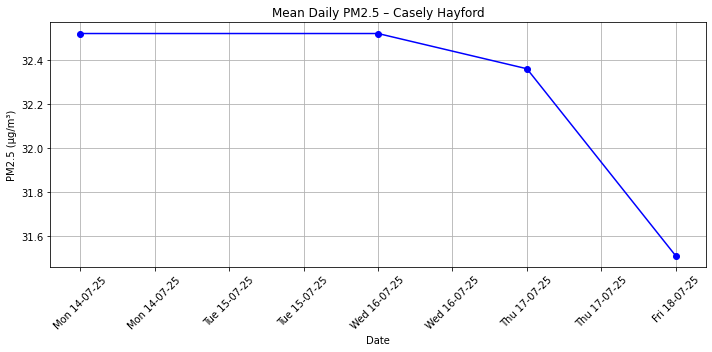

<Figure size 432x288 with 0 Axes>

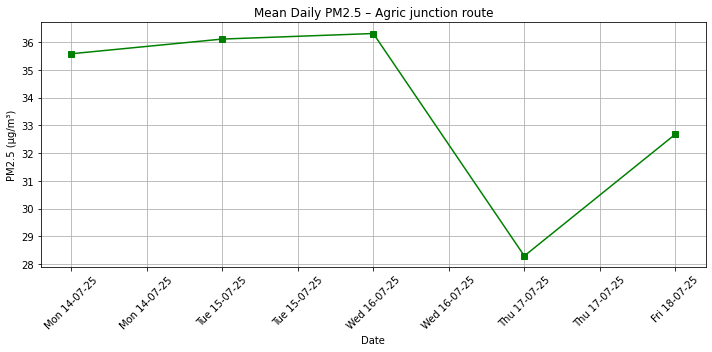

<Figure size 432x288 with 0 Axes>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load CSVs with proper date parsing
CAS_df = pd.read_csv("CAS route.csv", parse_dates=["Date"])
Agric_df = pd.read_csv("Agric route.csv", parse_dates=["Date"])

# Set date format for x-axis
date_format = mdates.DateFormatter("%a %d-%m-%y")

# Plot for College of Science Route
plt.figure(figsize=(10, 5))
plt.plot(CAS_df["Date"], CAS_df["PM2.5"], marker='o', color='blue', label="PM2.5")
plt.title("Mean Daily PM2.5 – Casely Hayford")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("CAS.jpeg", format='jpeg', dpi=300)

# Plot for KSB Route
plt.figure(figsize=(10, 5))
plt.plot(Agric_df["Date"], Agric_df["PM2.5"], marker='s', color='green', label="PM2.5")
plt.title("Mean Daily PM2.5 – Agric junction route")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("Agric", format='jpeg', dpi=300)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



--- College of Science Route CORRELATION MATRIX ---
             PM2.5  Temperature  R_Humidity
PM2.5         1.00        -0.96       -0.46
Temperature  -0.96         1.00        0.54
R_Humidity   -0.46         0.54        1.00


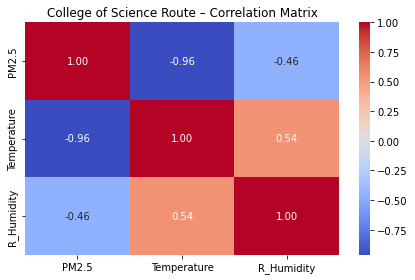

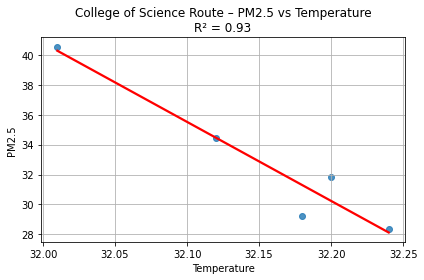

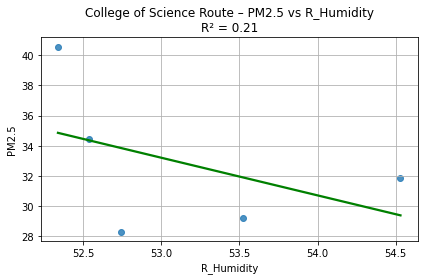


--- KSB Route CORRELATION MATRIX ---
             PM2.5  Temperature  R_Humidity
PM2.5         1.00        -0.91       -0.36
Temperature  -0.91         1.00        0.33
R_Humidity   -0.36         0.33        1.00


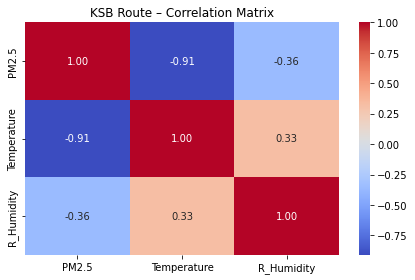

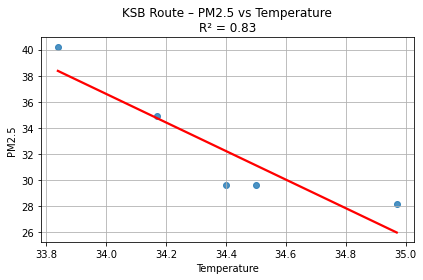

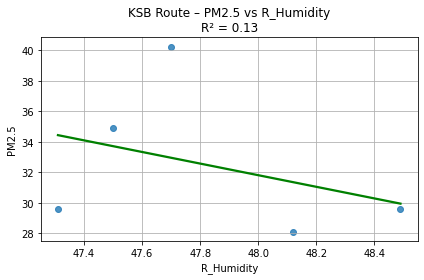

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the CSVs
college_df = pd.read_csv("College of science route.csv", parse_dates=["Date"])
ksb_df = pd.read_csv("KSB route.csv", parse_dates=["Date"])

# Function to compute correlation and regression
def analyze_correlations(df, title_prefix):
    print(f"\n--- {title_prefix} CORRELATION MATRIX ---")
    corr_matrix = df[["PM2.5", "Temperature", "R_Humidity"]].corr()
    print(corr_matrix.round(2))

    # Heatmap
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{title_prefix} – Correlation Matrix")
    plt.tight_layout()
    plt.show()

    # Regression: PM2.5 vs Temperature
    slope, intercept, r_value, _, _ = linregress(df["Temperature"], df["PM2.5"])
    plt.figure(figsize=(6, 4))
    sns.regplot(x="Temperature", y="PM2.5", data=df, ci=None, line_kws={"color": "red"})
    plt.title(f"{title_prefix} – PM2.5 vs Temperature\nR² = {r_value**2:.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Regression: PM2.5 vs R_Humidity
    slope, intercept, r_value, _, _ = linregress(df["R_Humidity"], df["PM2.5"])
    plt.figure(figsize=(6, 4))
    sns.regplot(x="R_Humidity", y="PM2.5", data=df, ci=None, line_kws={"color": "green"})
    plt.title(f"{title_prefix} – PM2.5 vs R_Humidity\nR² = {r_value**2:.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run analysis
analyze_correlations(college_df, "College of Science Route")
analyze_correlations(ksb_df, "KSB Route")


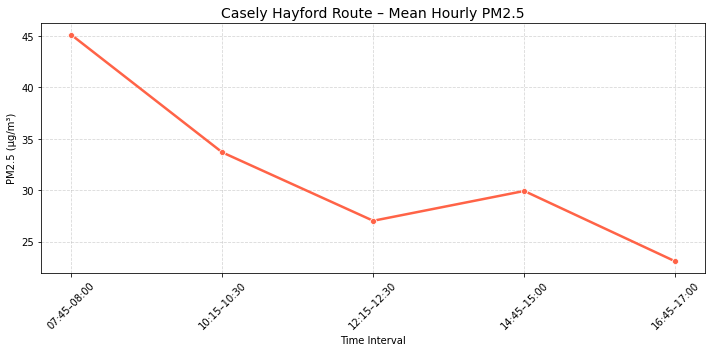

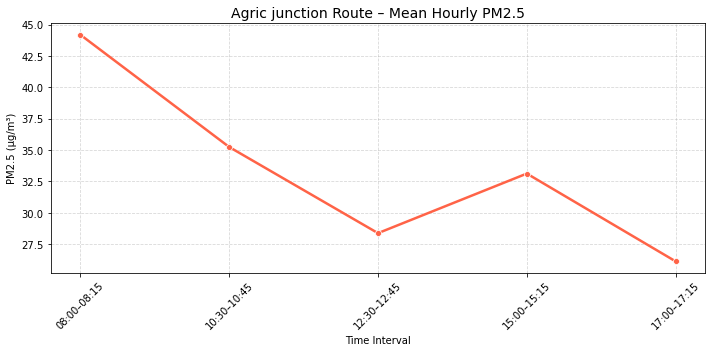

<Figure size 432x288 with 0 Axes>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the hourly mean CSVs
CAS_hourly = pd.read_csv("CAS route hourly.csv")
Agric_hourly = pd.read_csv("Agric route hourly.csv")

# Sort intervals based on time (07:45 → 17:15)
def sort_by_time(df):
    df["StartMinutes"] = df["Interval"].str.extract(r"(\d{2}):(\d{2})").astype(int).apply(lambda r: r[0]*60 + r[1], axis=1)
    return df.sort_values("StartMinutes").drop("StartMinutes", axis=1)

CAS_hourly = sort_by_time(CAS_hourly)
Agric_hourly = sort_by_time(Agric_hourly)

# Plotting function
def plot_pm25_hourly(df, title):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="Interval", y="PM2.5", data=df, marker="o", linewidth=2.5, color="tomato")
    plt.title(f"{title} – Mean Hourly PM2.5", fontsize=14)
    plt.xlabel("Time Interval")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot for each route
plot_pm25_hourly(CAS_hourly, "Casely Hayford Route")
plot_pm25_hourly(Agric_hourly, "Agric junction Route")
plt.savefig("CAS", format='jpeg', dpi=300)

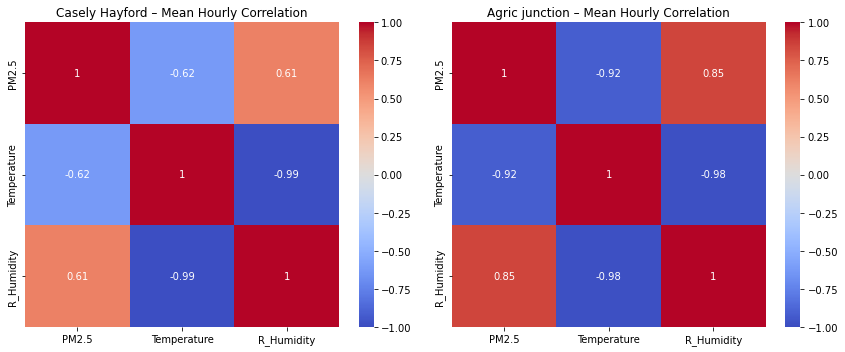

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
CAS_df = pd.read_csv("CAS route hourly.csv")
Agric_df = pd.read_csv("Agric route hourly.csv")

# Select relevant columns
cols = ["PM2.5", "Temperature", "R_Humidity"]
CAS_corr = CAS_df[cols].corr().round(2)
Agric_corr = Agric_df[cols].corr().round(2)

# Plot correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# College of Science
sns.heatmap(CAS_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Casely Hayford – Mean Hourly Correlation")

# KSB
sns.heatmap(Agric_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Agric junction – Mean Hourly Correlation")

plt.tight_layout()
plt.show()


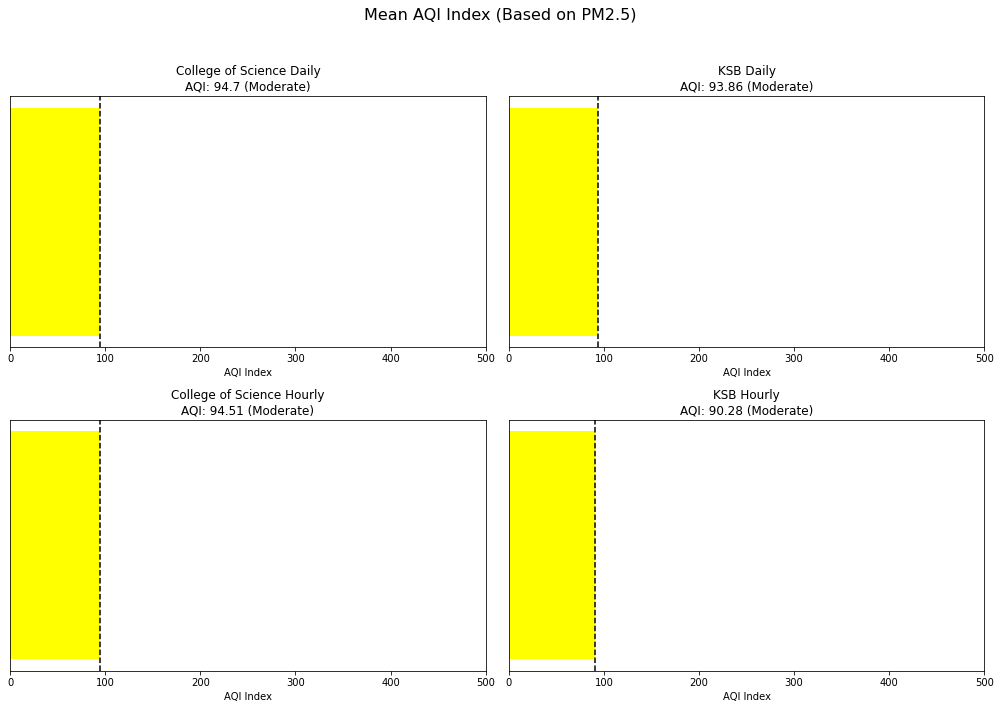

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# AQI breakpoints (EPA for PM2.5, µg/m³)
breakpoints = [
    (0.0, 12.0, 0, 50, 'Good', '#00e400'),
    (12.1, 35.4, 51, 100, 'Moderate', '#ffff00'),
    (35.5, 55.4, 101, 150, 'Unhealthy for Sensitive Groups', '#ff7e00'),
    (55.5, 150.4, 151, 200, 'Unhealthy', '#ff0000'),
    (150.5, 250.4, 201, 300, 'Very Unhealthy', '#8f3f97'),
    (250.5, 500.4, 301, 500, 'Hazardous', '#7e0023')
]

def compute_aqi(pm25):
    for (c_low, c_high, i_low, i_high, category, color) in breakpoints:
        if c_low <= pm25 <= c_high:
            aqi = ((i_high - i_low) / (c_high - c_low)) * (pm25 - c_low) + i_low
            return round(aqi, 2), category, color
    return None, None, None

# Load the files
files = {
    'College of Science Daily': 'College of science route.csv',
    'KSB Daily': 'KSB route.csv',
    'College of Science Hourly': 'College of science route hourly.csv',
    'KSB Hourly': 'KSB route hourly.csv',
}

# Store results
aqi_results = {}

for label, file in files.items():
    df = pd.read_csv(file)
    mean_pm25 = round(df['PM2.5'].mean(), 2)
    aqi, category, color = compute_aqi(mean_pm25)
    aqi_results[label] = {
        'mean_pm25': mean_pm25,
        'aqi': aqi,
        'category': category,
        'color': color
    }

# Plotting: Gauge-style bars
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, (label, values) in enumerate(aqi_results.items()):
    ax = axs[idx]
    ax.barh([0], [values['aqi']], color=values['color'], height=0.6)
    ax.set_xlim(0, 500)
    ax.set_yticks([])
    ax.set_title(f"{label}\nAQI: {values['aqi']} ({values['category']})", fontsize=12)
    ax.axvline(values['aqi'], color='black', linestyle='--')
    ax.set_xlabel("AQI Index")

# Layout
plt.suptitle("Mean AQI Index (Based on PM2.5)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


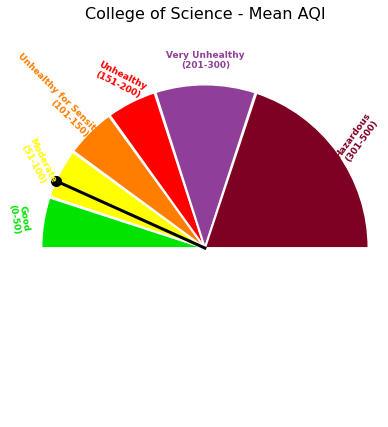

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


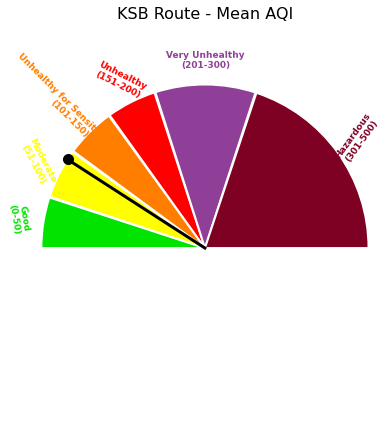

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# AQI Categories and colors (EPA Standard)
aqi_levels = [
    (0, 50, 'Good', '#00E400'),
    (51, 100, 'Moderate', '#FFFF00'),
    (101, 150, 'Unhealthy for Sensitive Groups', '#FF7E00'),
    (151, 200, 'Unhealthy', '#FF0000'),
    (201, 300, 'Very Unhealthy', '#8F3F97'),
    (301, 500, 'Hazardous', '#7E0023')
]

def draw_aqi_gauge(aqi_value, title='AQI Gauge', filename='aqi_gauge.png'):
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi)
    ax.set_theta_direction(-1)
    ax.set_axis_off()

    def aqi_to_angle(aqi):
        return np.deg2rad(180 * aqi / 500)

    for start, end, label, color in aqi_levels:
        theta_start = aqi_to_angle(start)
        theta_end = aqi_to_angle(end)
        theta_mid = (theta_start + theta_end) / 2

        # Draw color segment
        ax.bar(
            x=theta_mid,
            height=1,
            width=(theta_end - theta_start),
            bottom=0,
            color=color,
            edgecolor='white',
            linewidth=2
        )

        # Label with color and range
        ax.text(
            theta_mid,
            1.15,
            f"{label}\n({start}-{end})",
            color=color,
            ha='center',
            va='center',
            fontsize=9,
            fontweight='bold',
            rotation=np.rad2deg(theta_mid) - 90,
            rotation_mode='anchor'
        )

    # Needle
    aqi_angle = aqi_to_angle(aqi_value)
    ax.plot([aqi_angle, aqi_angle], [0, 1], color='black', linewidth=3)
    ax.plot(aqi_angle, 1, 'o', color='black', markersize=10)

    # Centered AQI Value
    ax.text(0, -0.4, f"AQI: {aqi_value:.0f}", fontsize=20, fontweight='bold', ha='center')

    # Title
    ax.set_title(title, fontsize=16, y=1.15)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Example usage
college_mean_aqi = 67.4
ksb_mean_aqi = 91.2

draw_aqi_gauge(college_mean_aqi, title="College of Science - Mean AQI", filename="college_aqi_gauge.png")
draw_aqi_gauge(ksb_mean_aqi, title="KSB Route - Mean AQI", filename="ksb_aqi_gauge.png")


In [26]:
import pandas as pd
from datetime import datetime

# File names and weekday labels
files = {
    '2025-07-21.csv': 'Mon',
    '2025-07-22.csv': 'Tue',
    '2025-07-23.csv': 'Wed',
    '2025-07-24.csv': 'Thu',
    '2025-07-24.csv': 'Fri'
}

# Time intervals
time_ranges = [
    ('07:45', '08:00'),
    ('08:00', '08:15'),
    ('10:15', '10:30'),
    ('10:30', '10:45'),
    ('12:15', '12:30'),
    ('12:45', '12:45'),  # single timestamp
    ('14:45', '15:00'),
    ('15:00', '15:15'),
    ('16:45', '17:00'),
    ('17:00', '17:15')
]

# Columns we want to analyze
target_columns = ['PM2.5', 'R_Humidity', 'Temperature']

# Process each file
for file, day in files.items():
    df = pd.read_csv(file)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Convert time column to datetime
    df['Time'] = pd.to_datetime(df['Time'])

    interval_data = []

    for start_str, end_str in time_ranges:
        if start_str == end_str:
            mask = df['Time'].dt.strftime('%H:%M') == start_str
        else:
            start_time = datetime.strptime(start_str, '%H:%M').time()
            end_time = datetime.strptime(end_str, '%H:%M').time()
            mask = (df['Time'].dt.time >= start_time) & (df['Time'].dt.time < end_time)

        subset = df.loc[mask, target_columns]
        means = subset.mean().round(2)
        interval_label = f"{start_str} to {end_str}"
        means['Interval'] = interval_label
        interval_data.append(means)

    # Build final DataFrame and reorder columns
    result_df = pd.DataFrame(interval_data)
    result_df = result_df[['Interval'] + target_columns]

    # Save to CSV
    result_df.to_csv(f"{day}_interval_means.csv", index=False)

print("✅ Interval mean CSVs corrected and saved with proper formatting.")


/tmp/ipykernel_4717/4091717645.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
/tmp/ipykernel_4717/4091717645.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
/tmp/ipykernel_4717/4091717645.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
/tmp/ipykernel_4717/4091717645.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please spec

✅ Interval mean CSVs corrected and saved with proper formatting.


In [27]:
import pandas as pd

# Weekday files
week_files = [
    'Mon_interval_means.csv',
    'Tue_interval_means.csv',
    'Wed_interval_means.csv',
    'Thu_interval_means.csv',
]

# Intervals classified
comm_intervals = [
    '07:45 to 08:00',
    '10:15 to 10:30',
    '12:15 to 12:30',
    '14:45 to 15:00',
    '16:45 to 17:00'
]

hall7_intervals = [
    '08:00 to 08:15',
    '10:30 to 10:45',
    '15:00 to 15:15',
    '17:00 to 17:15'
]

# Containers for results
comm_data = []
hall7_data = []

for file in week_files:
    df = pd.read_csv(file)

    for _, row in df.iterrows():
        interval = row['Interval'].strip()
        row_data = {
            'Interval': interval,
            'PM2.5': round(row['PM2.5'], 2),
            'R_Humidity': round(row['R_Humidity'], 2),
            'Temperature': round(row['Temperature'], 2)
        }

        if interval in comm_intervals:
            comm_data.append(row_data)
        elif interval in hall7_intervals:
            hall7_data.append(row_data)
        # Skips '12:45' or any unmatched intervals

# Convert to DataFrames
comm_df = pd.DataFrame(comm_data)
hall7_df = pd.DataFrame(hall7_data)

# Save to CSV
comm_df.to_csv('comm_hourly.csv', index=False)
hall7_df.to_csv('hall7_hourly.csv', index=False)

print("✅ Clean COS_hourly.csv and KSB_hourly.csv generated without day column.")


✅ Clean COS_hourly.csv and KSB_hourly.csv generated without day column.


In [30]:
import pandas as pd

# Weekday files and labels
week_files = {
    'Mon_interval_means.csv': 'Mon',
    'Tue_interval_means.csv': 'Tue',
    'Wed_interval_means.csv': 'Wed',
    'Thu_interval_means.csv': 'Thu'
}

# Intervals for classification
comm_intervals = [
    '07:45 to 08:00',
    '10:15 to 10:30',
    '12:15 to 12:30',
    '14:45 to 15:00',
    '16:45 to 17:00'
]

hall7_intervals = [
    '08:00 to 08:15',
    '10:30 to 10:45',
    '15:00 to 15:15',
    '17:00 to 17:15'
]

# Containers for results
comm_rows = []
hall7_rows = []

for file, day in week_files.items():
    df = pd.read_csv(file)

    # COS means
    comm_df = df[df['Interval'].isin(cas_intervals)].drop(columns='Interval')
    comm_mean = comm_df.mean().round(2)
    comm_mean_df = pd.DataFrame([comm_mean])
    comm_mean_df.insert(0, 'Day', day)
    comm_rows.append(comm_mean_df)

    # KSB means
    hall7_df = df[df['Interval'].isin(hall7_intervals)].drop(columns='Interval')
    hall7_mean = hall7_df.mean().round(2)
    hall7_mean_df = pd.DataFrame([hall7_mean])
    hall7_mean_df.insert(0, 'Day', day)
    hall7_rows.append(hall7_mean_df)

# Concatenate all daily results
comm_day_df = pd.concat(comm_rows, ignore_index=True)
hall7_day_df = pd.concat(hall7_rows, ignore_index=True)

# Save to CSV
comm_day_df.to_csv('comm_day.csv', index=False)
hall7_day_df.to_csv('hall7_day.csv', index=False)

print("✅ COS_day.csv and KSB_day.csv now correctly include 'Day' column.")


✅ COS_day.csv and KSB_day.csv now correctly include 'Day' column.


In [14]:
import pandas as pd

# ----------- HOURLY MERGE AND MEAN --------------

# Merge College of Science hourly
cos_hourly_1 = pd.read_csv("College of science route hourly.csv")
cos_hourly_2 = pd.read_csv("COS_hourly.csv")
cos_hourly_merged = pd.concat([cos_hourly_1, cos_hourly_2], ignore_index=True)

# Clean Interval column (remove all whitespace and ensure uniform formatting)
cos_hourly_merged['Interval'] = (
    cos_hourly_merged['Interval']
    .astype(str)
    .str.replace(r'\s+', '', regex=True)
    .str.strip()
)

# Group and compute mean
cos_hourly_mean = (
    cos_hourly_merged
    .groupby('Interval')
    .mean(numeric_only=True)
    .round(2)
    .reset_index()
)
cos_hourly_mean['Interval'] = cos_hourly_mean['Interval'].str.replace('-', ' - ')
cos_hourly_mean.to_csv("College of science mean hourly.csv", index=False)

# Merge KSB hourly
ksb_hourly_1 = pd.read_csv("KSB route hourly.csv")
ksb_hourly_2 = pd.read_csv("KSB_hourly.csv")
ksb_hourly_merged = pd.concat([ksb_hourly_1, ksb_hourly_2], ignore_index=True)

# Clean Interval column
ksb_hourly_merged['Interval'] = (
    ksb_hourly_merged['Interval']
    .astype(str)
    .str.replace(r'\s+', '', regex=True)
    .str.strip()
)

# Group and compute mean
ksb_hourly_mean = (
    ksb_hourly_merged
    .groupby('Interval')
    .mean(numeric_only=True)
    .round(2)
    .reset_index()
)
ksb_hourly_mean['Interval'] = ksb_hourly_mean['Interval'].str.replace('-', ' - ')
ksb_hourly_mean.to_csv("KSB mean hourly.csv", index=False)

# ----------- DAILY MERGE AND MEAN --------------

# Merge College of Science daily
cos_day_1 = pd.read_csv("College of science route.csv")
cos_day_2 = pd.read_csv("COS_day.csv")
cos_day_merged = pd.concat([cos_day_1, cos_day_2], ignore_index=True)

# Clean Day column (standardize spacing and case)
cos_day_merged['Day'] = (
    cos_day_merged['Day']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.capitalize()
)

# Group and compute mean
cos_day_mean = (
    cos_day_merged
    .groupby('Day')
    .mean(numeric_only=True)
    .round(2)
    .reset_index()
)
cos_day_mean.to_csv("College of science mean daily.csv", index=False)

# Merge KSB daily
ksb_day_1 = pd.read_csv("KSB route.csv")
ksb_day_2 = pd.read_csv("KSB_day.csv")
ksb_day_merged = pd.concat([ksb_day_1, ksb_day_2], ignore_index=True)

# Clean Day column
ksb_day_merged['Day'] = (
    ksb_day_merged['Day']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.capitalize()
)

# Group and compute mean
ksb_day_mean = (
    ksb_day_merged
    .groupby('Day')
    .mean(numeric_only=True)
    .round(2)
    .reset_index()
)
ksb_day_mean.to_csv("KSB mean daily.csv", index=False)

print("✅ All hourly and daily means cleaned, merged, and saved successfully.")


✅ All hourly and daily means cleaned, merged, and saved successfully.


In [17]:
import pandas as pd

# ----------- FINAL CLEAN FOR HOURLY -----------

# College of Science
cos_hourly = pd.read_csv("College of science mean hourly.csv")
if 'Mean' in cos_hourly.columns:
    cos_hourly = cos_hourly.drop(columns=['Mean'])

cos_hourly['Interval'] = cos_hourly['Interval'].astype(str).str.replace(r'\s+', '', regex=True).str.strip()
cos_hourly = cos_hourly.groupby('Interval', as_index=False).mean(numeric_only=True).round(2)
cos_hourly['Interval'] = cos_hourly['Interval'].str.replace('-', ' - ')
cos_hourly.to_csv("College of science mean hourly.csv", index=False)

# KSB
ksb_hourly = pd.read_csv("KSB mean hourly.csv")
if 'Mean' in ksb_hourly.columns:
    ksb_hourly = ksb_hourly.drop(columns=['Mean'])

ksb_hourly['Interval'] = ksb_hourly['Interval'].astype(str).str.replace(r'\s+', '', regex=True).str.strip()
ksb_hourly = ksb_hourly.groupby('Interval', as_index=False).mean(numeric_only=True).round(2)
ksb_hourly['Interval'] = ksb_hourly['Interval'].str.replace('-', ' - ')
ksb_hourly.to_csv("KSB mean hourly.csv", index=False)

# ----------- FINAL CLEAN FOR DAILY -----------

# College of Science
cos_daily = pd.read_csv("College of science mean daily.csv")
if 'Mean' in cos_daily.columns:
    cos_daily = cos_daily.drop(columns=['Mean'])

cos_daily['Day'] = cos_daily['Day'].str.strip().str.capitalize()
cos_daily = cos_daily.groupby('Day', as_index=False).mean(numeric_only=True).round(2)
cos_daily.to_csv("College of science mean daily.csv", index=False)

# KSB
ksb_daily = pd.read_csv("KSB mean daily.csv")
if 'Mean' in ksb_daily.columns:
    ksb_daily = ksb_daily.drop(columns=['Mean'])

ksb_daily['Day'] = ksb_daily['Day'].str.strip().str.capitalize()
ksb_daily = ksb_daily.groupby('Day', as_index=False).mean(numeric_only=True).round(2)
ksb_daily.to_csv("KSB mean daily.csv", index=False)

print("✅ Cleaned and re-aggregated hourly and daily mean files with no duplicates.")


✅ Cleaned and re-aggregated hourly and daily mean files with no duplicates.


In [18]:
import pandas as pd

def clean_and_aggregate_hourly(file_path):
    df = pd.read_csv(file_path)

    # Drop row-wise mean column if present
    if 'Mean' in df.columns:
        df = df.drop(columns=['Mean'])

    # Clean the Interval column
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.strip()
        .str.replace(r'\s*-\s*', ' - ', regex=True)
    )

    # Group by Interval and compute mean
    df_grouped = df.groupby('Interval', as_index=False).mean(numeric_only=True).round(2)

    # Save the updated file
    df_grouped.to_csv(file_path, index=False)

# Apply to both mean hourly files
clean_and_aggregate_hourly("College of science mean hourly.csv")
clean_and_aggregate_hourly("KSB mean hourly.csv")

print("✅ Re-aggregated and cleaned mean hourly files.")


✅ Re-aggregated and cleaned mean hourly files.


In [25]:
import pandas as pd

def average_hourly(input_file, output_file):
    df = pd.read_csv(input_file)

    # Clean Interval column
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace(r'\s+', '', regex=True)
        .str.strip()
    )

    # Group and compute mean
    mean_df = (
        df
        .groupby('Interval')
        .mean(numeric_only=True)
        .round(2)
        .reset_index()
    )
    mean_df['Interval'] = mean_df['Interval'].str.replace('-', ' - ')
    mean_df.to_csv(output_file, index=False)

def average_daily(input_file, output_file):
    df = pd.read_csv(input_file)

    # Clean Day column
    df['Day'] = (
        df['Day']
        .astype(str)
        .str.strip()
        .str.lower()
        .str.capitalize()
    )

    # Group and compute mean
    mean_df = (
        df
        .groupby('Day')
        .mean(numeric_only=True)
        .round(2)
        .reset_index()
    )
    mean_df.to_csv(output_file, index=False)

# ---------- HOURLY MEAN ----------
average_hourly("agric_hourly.csv", "Agric mean hourly.csv")
average_hourly("cas_hourly.csv", "CAS mean hourly.csv")

# ---------- DAILY MEAN ----------
average_daily("agric_day.csv", "Agric mean daily.csv")
average_daily("cas_day.csv", "CAS mean daily.csv")

print("✅ CAS and Agric hourly/daily mean files created successfully.")


✅ CAS and Agric hourly/daily mean files created successfully.


/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/jephthah/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


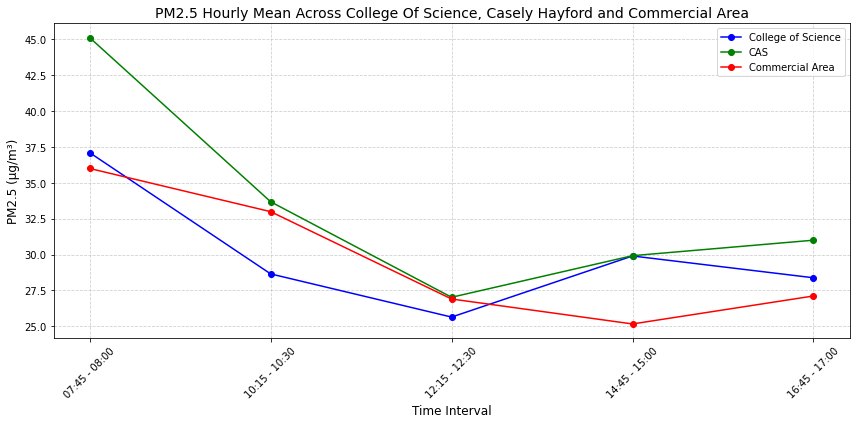

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Route label and file mapping
files = {
    "College of science mean hourly.csv": "College of Science",
    "CAS mean hourly.csv": "CAS",
    "Commercial area mean hourly.csv": "Commercial Area"
}

# Colors for routes
colors = {
    "College of Science": "blue",
    "CAS": "green",
    "Commercial Area": "red"
}

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot PM2.5 for each route
for file, label in files.items():
    df = pd.read_csv(file)

    # Clean and sort intervals
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace('–', '-', regex=False)
        .str.replace(r'\s+', '', regex=True)
        .str.replace('-', ' - ', regex=False)
    )
    df['Start'] = pd.to_datetime(df['Interval'].str.split(' - ').str[0], format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start')

    # Plot PM2.5
    plt.plot(df['Interval'], df['PM2.5'], label=label, color=colors[label], marker='o')

# Customize plot
plt.title("PM2.5 Hourly Mean Across College Of Science, Casely Hayford and Commercial Area", fontsize=14)
plt.xlabel("Time Interval", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("PM2.5_across_routes.jpeg", dpi=300)
plt.show()


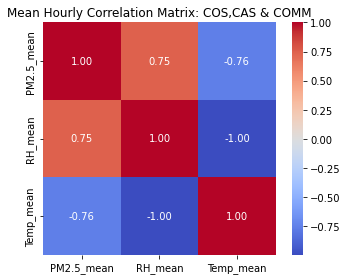

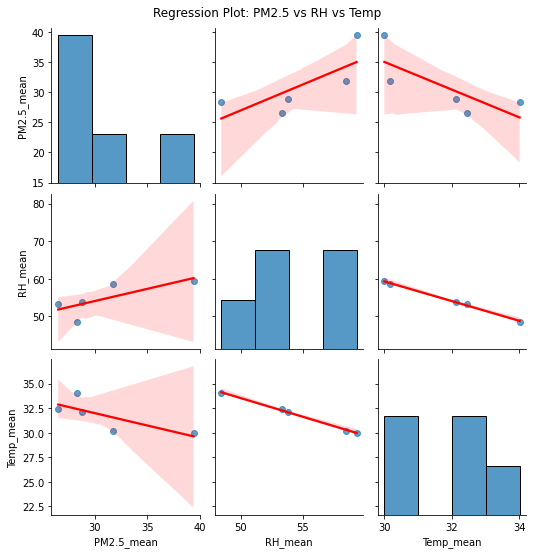

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean function
def load_and_prepare(file, location_name):
    df = pd.read_csv(file)
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace('–', '-', regex=False)
        .str.replace(r'\s+', '', regex=True)
        .str.replace('-', ' - ', regex=False)
    )
    df['Start'] = pd.to_datetime(df['Interval'].str.split(' - ').str[0], format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start')

    # Rename columns to include location tag
    df = df[['Interval', 'PM2.5', 'R_Humidity', 'Temperature']].rename(
        columns={
            'PM2.5': f'PM2.5_{location_name}',
            'R_Humidity': f'RH_{location_name}',
            'Temperature': f'Temp_{location_name}'
        }
    )
    return df.reset_index(drop=True)

# Load datasets
cos = load_and_prepare("College of science mean hourly.csv", "COS")
cas = load_and_prepare("CAS mean hourly.csv", "CAS")
com = load_and_prepare("Commercial area mean hourly.csv", "COM")

# Merge based on intervals (assumed aligned)
merged = pd.concat([cos, cas[['PM2.5_CAS', 'RH_CAS', 'Temp_CAS']], com[['PM2.5_COM', 'RH_COM', 'Temp_COM']]], axis=1)

# Drop missing
merged_clean = merged.dropna()

# Combine same variables across locations into one mean
merged_clean['PM2.5_mean'] = merged_clean[[col for col in merged_clean.columns if 'PM2.5' in col]].mean(axis=1)
merged_clean['RH_mean'] = merged_clean[[col for col in merged_clean.columns if 'RH' in col]].mean(axis=1)
merged_clean['Temp_mean'] = merged_clean[[col for col in merged_clean.columns if 'Temp' in col]].mean(axis=1)

# ------------------ 1. Correlation Matrix ------------------
mean_df = merged_clean[['PM2.5_mean', 'RH_mean', 'Temp_mean']]
corr = mean_df.corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mean Hourly Correlation Matrix: COS,CAS & COMM")
plt.tight_layout()
plt.savefig("mean_correlation_matrix.jpeg", dpi=300)
plt.show()

# ------------------ 2. Regression Plots ------------------
sns.pairplot(mean_df, kind='reg', plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.7}})
plt.suptitle("Regression Plot: PM2.5 vs RH vs Temp", y=1.02)
plt.savefig("mean_regression_plots.jpeg", dpi=300)
plt.show()


In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Helper function to calculate R^2
def compute_r2(x, y):
    model = LinearRegression()
    x = x.values.reshape(-1, 1)
    y = y.values
    model.fit(x, y)
    y_pred = model.predict(x)
    return r2_score(y, y_pred)

# Load each location's dataset
cos = pd.read_csv("College of science mean hourly.csv")
cas = pd.read_csv("CAS mean hourly.csv")
com = pd.read_csv("Commercial area mean hourly.csv")

# Keep only required columns and drop rows with NaNs
cos = cos[['PM2.5', 'Temperature', 'R_Humidity']].dropna()
cas = cas[['PM2.5', 'Temperature', 'R_Humidity']].dropna()
com = com[['PM2.5', 'Temperature', 'R_Humidity']].dropna()

# Compute R² for each location
results = {
    'Location': [],
    'PM2.5 vs Temp (R²)': [],
    'PM2.5 vs RH (R²)': []
}

for df, name in zip([cos, cas, com], ['College of Science', 'CAS', 'Commercial Area']):
    r2_temp = compute_r2(df['Temperature'], df['PM2.5'])
    r2_rh = compute_r2(df['R_Humidity'], df['PM2.5'])

    results['Location'].append(name)
    results['PM2.5 vs Temp (R²)'].append(round(r2_temp, 3))
    results['PM2.5 vs RH (R²)'].append(round(r2_rh, 3))

# Create DataFrame and display results
r2_df = pd.DataFrame(results)
print(r2_df)


             Location  PM2.5 vs Temp (R²)  PM2.5 vs RH (R²)
0  College of Science               0.052             0.037
1                 CAS               0.614             0.538
2     Commercial Area               0.806             0.994


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


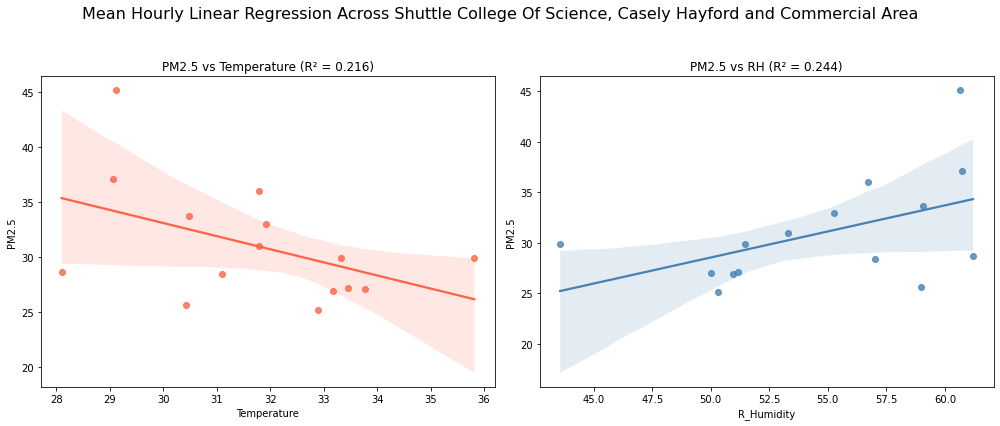

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load and merge datasets
cos = pd.read_csv("College of science mean hourly.csv")
cas = pd.read_csv("CAS mean hourly.csv")
com = pd.read_csv("Commercial area mean hourly.csv")

# Select relevant columns and concatenate
merged = pd.concat([
    cos[['PM2.5', 'Temperature', 'R_Humidity']],
    cas[['PM2.5', 'Temperature', 'R_Humidity']],
    com[['PM2.5', 'Temperature', 'R_Humidity']]
], ignore_index=True).dropna()

# ----------------------
# Linear Regression: PM2.5 vs Temperature
# ----------------------
X_temp = merged[['Temperature']]
y_pm25 = merged['PM2.5']
model_temp = LinearRegression().fit(X_temp, y_pm25)
pred_temp = model_temp.predict(X_temp)
r2_temp = r2_score(y_pm25, pred_temp)

# ----------------------
# Linear Regression: PM2.5 vs RH
# ----------------------
X_rh = merged[['R_Humidity']]
model_rh = LinearRegression().fit(X_rh, y_pm25)
pred_rh = model_rh.predict(X_rh)
r2_rh = r2_score(y_pm25, pred_rh)

# ----------------------
# Plotting
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Mean Hourly Linear Regression Across Shuttle College Of Science, Casely Hayford and Commercial Area", fontsize=16)

# PM2.5 vs Temperature
sns.regplot(x='Temperature', y='PM2.5', data=merged, ax=axes[0], color='tomato')
axes[0].set_title(f"PM2.5 vs Temperature (R² = {r2_temp:.3f})")

# PM2.5 vs RH
sns.regplot(x='R_Humidity', y='PM2.5', data=merged, ax=axes[1], color='steelblue')
axes[1].set_title(f"PM2.5 vs RH (R² = {r2_rh:.3f})")

# Save and show
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Merged_Regression_PM2.5.jpeg", dpi=300)
plt.show()


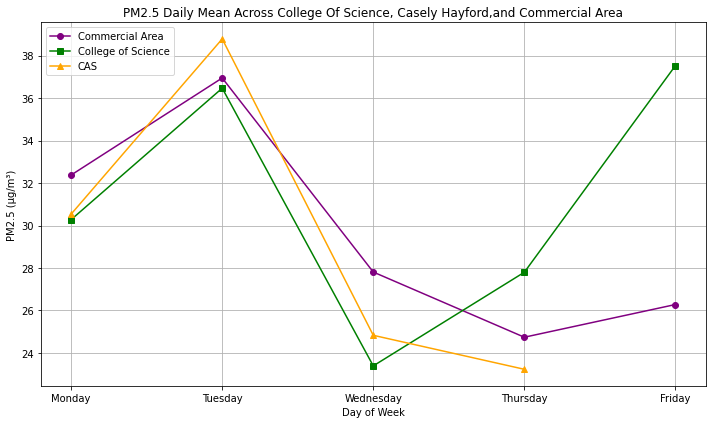

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the daily mean data
com_daily = pd.read_csv("Commercial area mean daily.csv")
cos_daily = pd.read_csv("College of science mean daily.csv")
cas_daily = pd.read_csv("CAS mean daily.csv")

# Ensure consistent day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Sort by day (if needed)
com_daily['Day'] = pd.Categorical(com_daily['Day'], categories=day_order, ordered=True)
cos_daily['Day'] = pd.Categorical(cos_daily['Day'], categories=day_order, ordered=True)
cas_daily['Day'] = pd.Categorical(cas_daily['Day'], categories=day_order, ordered=True)

com_daily = com_daily.sort_values('Day')
cos_daily = cos_daily.sort_values('Day')
cas_daily = cas_daily.sort_values('Day')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(com_daily['Day'], com_daily['PM2.5'], label='Commercial Area', marker='o', color='purple')
plt.plot(cos_daily['Day'], cos_daily['PM2.5'], label='College of Science', marker='s', color='green')
plt.plot(cas_daily['Day'], cas_daily['PM2.5'], label='CAS', marker='^', color='orange')

plt.title('PM2.5 Daily Mean Across College Of Science, Casely Hayford,and Commercial Area')
plt.xlabel('Day of Week')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("PM2.5_daily_mean_across_locations.jpeg", dpi=300)
plt.show()


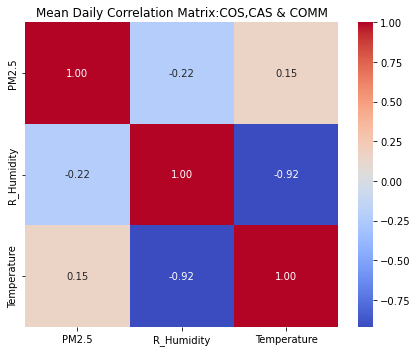

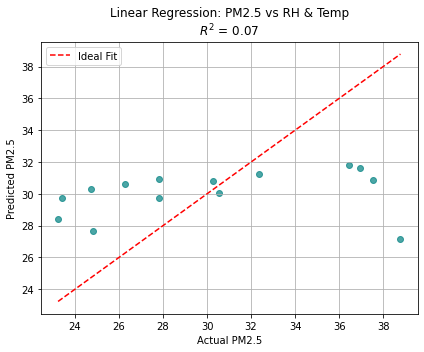

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# -------- Load and merge daily data --------
com = pd.read_csv("Commercial area mean daily.csv")
cos = pd.read_csv("College of science mean daily.csv")
cas = pd.read_csv("CAS mean daily.csv")

# Combine all into one DataFrame
merged = pd.concat([com, cos, cas], ignore_index=True)

# Keep only relevant columns
df = merged[['PM2.5', 'R_Humidity', 'Temperature']].dropna()

# -------- Correlation Matrix --------
plt.figure(figsize=(6, 5))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mean Daily Correlation Matrix:COS,CAS & COMM")
plt.tight_layout()
plt.savefig("correlation_matrix.jpeg", dpi=300)
plt.show()

# -------- Linear Regression: PM2.5 vs Temp & RH --------
# Fit model
X = df[['R_Humidity', 'Temperature']]
y = df['PM2.5']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot actual vs predicted PM2.5
plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title(f"Linear Regression: PM2.5 vs RH & Temp\n$R^2$ = {r2:.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pm25_regression.jpeg", dpi=300)
plt.show()


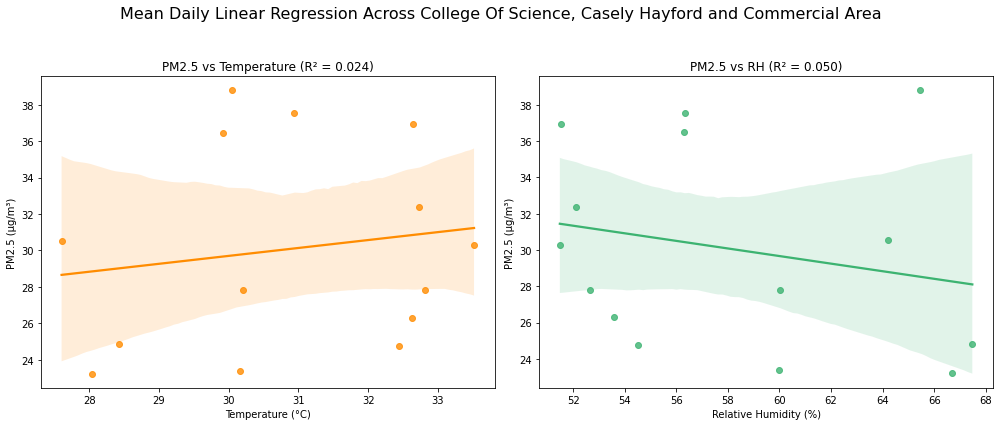

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the daily datasets
cos = pd.read_csv("College of science mean daily.csv")
cas = pd.read_csv("CAS mean daily.csv")
com = pd.read_csv("Commercial area mean daily.csv")

# Merge relevant columns
merged = pd.concat([
    cos[['PM2.5', 'Temperature', 'R_Humidity']],
    cas[['PM2.5', 'Temperature', 'R_Humidity']],
    com[['PM2.5', 'Temperature', 'R_Humidity']]
], ignore_index=True).dropna()

# --- Regression: PM2.5 vs Temperature ---
X_temp = merged[['Temperature']]
y_pm25 = merged['PM2.5']
model_temp = LinearRegression().fit(X_temp, y_pm25)
pred_temp = model_temp.predict(X_temp)
r2_temp = r2_score(y_pm25, pred_temp)

# --- Regression: PM2.5 vs RH ---
X_rh = merged[['R_Humidity']]
model_rh = LinearRegression().fit(X_rh, y_pm25)
pred_rh = model_rh.predict(X_rh)
r2_rh = r2_score(y_pm25, pred_rh)

# --- Plotting both regressions ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Mean Daily Linear Regression Across College Of Science, Casely Hayford and Commercial Area", fontsize=16)

# PM2.5 vs Temperature
sns.regplot(x='Temperature', y='PM2.5', data=merged, ax=axes[0], color='darkorange')
axes[0].set_title(f"PM2.5 vs Temperature (R² = {r2_temp:.3f})")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("PM2.5 (µg/m³)")

# PM2.5 vs RH
sns.regplot(x='R_Humidity', y='PM2.5', data=merged, ax=axes[1], color='mediumseagreen')
axes[1].set_title(f"PM2.5 vs RH (R² = {r2_rh:.3f})")
axes[1].set_xlabel("Relative Humidity (%)")
axes[1].set_ylabel("PM2.5 (µg/m³)")

# Save and show
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Merged_Daily_Regression_PM2.5.jpeg", dpi=300)
plt.show()


/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/jephthah/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


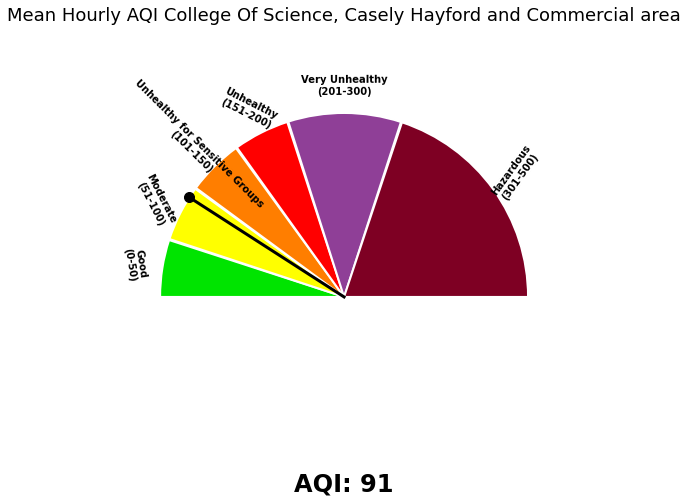

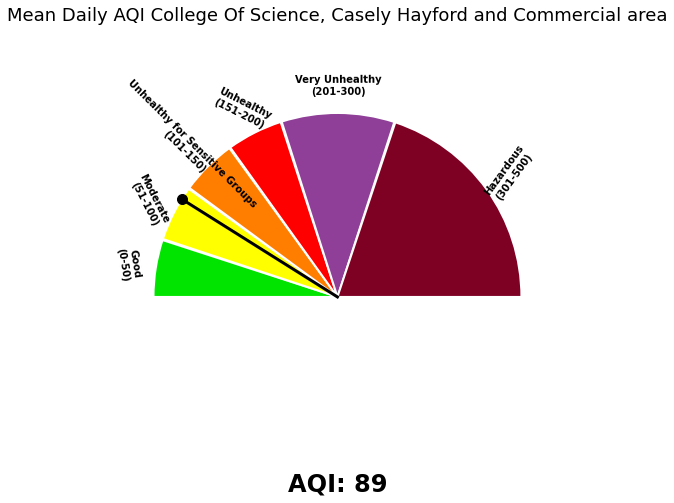

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# AQI categories and color bands (EPA USA standard)
aqi_levels = [
    (0, 50, 'Good', '#00E400'),
    (51, 100, 'Moderate', '#FFFF00'),
    (101, 150, 'Unhealthy for Sensitive Groups', '#FF7E00'),
    (151, 200, 'Unhealthy', '#FF0000'),
    (201, 300, 'Very Unhealthy', '#8F3F97'),
    (301, 500, 'Hazardous', '#7E0023')
]

# PM2.5 to AQI converter (US EPA)
def calculate_pm25_aqi(pm):
    for Clow, Chigh, Ilow, Ihigh in [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500),
    ]:
        if Clow <= pm <= Chigh:
            return round(((Ihigh - Ilow) / (Chigh - Clow)) * (pm - Clow) + Ilow)
    return None

# AQI gauge plot function
def draw_aqi_gauge(aqi_value, title='AQI Gauge', filename='aqi_gauge.jpeg'):
    fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi)
    ax.set_theta_direction(-1)
    ax.set_axis_off()

    def aqi_to_angle(aqi):
        return np.deg2rad(180 * aqi / 500)

    for start, end, label, color in aqi_levels:
        theta_start = aqi_to_angle(start)
        theta_end = aqi_to_angle(end)
        theta_mid = (theta_start + theta_end) / 2

        ax.bar(
            x=theta_mid,
            height=1,
            width=(theta_end - theta_start),
            bottom=0,
            color=color,
            edgecolor='white',
            linewidth=2
        )

        ax.text(
            theta_mid,
            1.15,
            f"{label}\n({start}-{end})",
            color='black',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            rotation=np.rad2deg(theta_mid) - 90,
            rotation_mode='anchor'
        )

    # Needle
    aqi_angle = aqi_to_angle(aqi_value)
    ax.plot([aqi_angle, aqi_angle], [0, 1], color='black', linewidth=3)
    ax.plot(aqi_angle, 1, 'o', color='black', markersize=10)

    # Title and centered AQI value below the image
    ax.set_title(title, fontsize=18, y=1.2)
    fig.text(0.5, 0.02, f"AQI: {aqi_value:.0f}", fontsize=24, fontweight='bold', ha='center')

    plt.tight_layout()
    plt.savefig(filename, dpi=300, format='jpeg')  # Save as JPEG
    plt.show()

# Load hourly data and compute mean AQI
hourly_files = [
    "College of science mean hourly.csv",
    "CAS mean hourly.csv",
    "Commercial area mean hourly.csv"
]
hourly_dfs = [pd.read_csv(f) for f in hourly_files]
hourly_pm25 = pd.concat([df[['PM2.5']] for df in hourly_dfs], ignore_index=True).dropna()
hourly_pm25['AQI'] = hourly_pm25['PM2.5'].apply(calculate_pm25_aqi)
mean_hourly_aqi = round(hourly_pm25['AQI'].mean(), 2)

# Load daily data and compute mean AQI
daily_files = [
    "College of science mean daily.csv",
    "CAS mean daily.csv",
    "Commercial area mean daily.csv"
]
daily_dfs = [pd.read_csv(f) for f in daily_files]
daily_pm25 = pd.concat([df[['PM2.5']] for df in daily_dfs], ignore_index=True).dropna()
daily_pm25['AQI'] = daily_pm25['PM2.5'].apply(calculate_pm25_aqi)
mean_daily_aqi = round(daily_pm25['AQI'].mean(), 2)

# Draw final AQI gauges (saved as JPEG)
draw_aqi_gauge(mean_hourly_aqi, title="Mean Hourly AQI College Of Science, Casely Hayford and Commercial area", filename="mean_hourly_aqi_gauge.jpeg")
draw_aqi_gauge(mean_daily_aqi, title="Mean Daily AQI College Of Science, Casely Hayford and Commercial area", filename="mean_daily_aqi_gauge.jpeg")


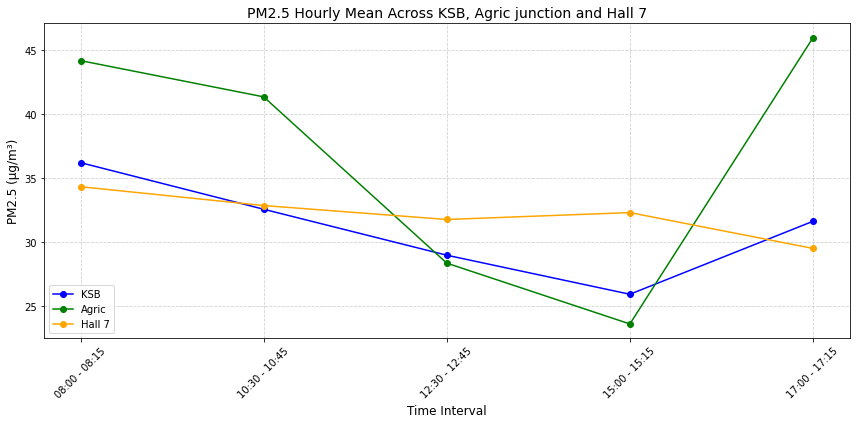

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Route label and file mapping
files = {
    "KSB mean hourly.csv": "KSB",
    "Agric mean hourly.csv": "Agric",
    "Hall7 mean hourly.csv": "Hall 7"
}

# Colors for routes
colors = {
    "KSB": "blue",
    "Agric": "green",
    "Hall 7": "orange"
}

# Initialize plot
plt.figure(figsize=(12, 6))

# Plot PM2.5 for each route
for file, label in files.items():
    df = pd.read_csv(file)

    # Clean and sort intervals
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace('–', '-', regex=False)
        .str.replace(r'\s+', '', regex=True)
        .str.replace('-', ' - ', regex=False)
    )
    df['Start'] = pd.to_datetime(df['Interval'].str.split(' - ').str[0], format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start')

    # Plot PM2.5
    plt.plot(df['Interval'], df['PM2.5'], label=label, color=colors[label], marker='o')

# Customize plot
plt.title("PM2.5 Hourly Mean Across KSB, Agric junction and Hall 7", fontsize=14)
plt.xlabel("Time Interval", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("PM2.5_KSB_Agric_Hall7.jpeg", dpi=300)
plt.show()


In [59]:
import pandas as pd

# Load file
df = pd.read_csv("Agric mean hourly.csv")

# Step 1: Fix inconsistent interval format
df['Interval'] = (
    df['Interval']
    .astype(str)
    .str.replace('–', '-', regex=False)
    .str.replace(':', ':', regex=False)
    .str.replace(r'\s+', '', regex=True)
    .str.replace('-', ' - ', regex=False)
)

# Step 2: Extract start time, even for malformed intervals like '08:00:08:15'
# We take the first 5-digit chunk as the start time
def extract_start_time(interval):
    parts = interval.split(' - ')
    if len(parts) == 2:
        return parts[0]
    # Fallback: try first 5 characters if the dash is missing
    return interval[:5]

df['Start'] = pd.to_datetime(df['Interval'].apply(extract_start_time), format='%H:%M', errors='coerce')

# Step 3: Drop bad entries and sort by start time
df = df.dropna(subset=['Start']).sort_values('Start').reset_index(drop=True)

# Optional: Save cleaned and sorted version
df.to_csv("Agric mean hourly_sorted.csv", index=False)

# Show confirmation
print("✅ Agric mean hourly.csv sorted by start time and saved as 'Agric mean hourly_sorted.csv'")


✅ Agric mean hourly.csv sorted by start time and saved as 'Agric mean hourly_sorted.csv'


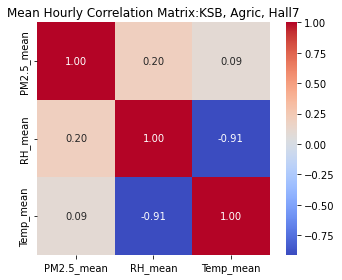

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean function
def load_and_prepare(file, location_name):
    df = pd.read_csv(file)

    # Standardize and extract start time
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace('–', '-', regex=False)
        .str.replace(r'\s+', '', regex=True)
        .str.replace('-', ' - ', regex=False)
    )

    def extract_start_time(interval):
        parts = interval.split(' - ')
        if len(parts) == 2:
            return parts[0]
        return interval[:5]

    df['Start'] = pd.to_datetime(df['Interval'].apply(extract_start_time), format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start')

    # Rename variables to tag location
    df = df[['Interval', 'PM2.5', 'R_Humidity', 'Temperature']].rename(
        columns={
            'PM2.5': f'PM2.5_{location_name}',
            'R_Humidity': f'RH_{location_name}',
            'Temperature': f'Temp_{location_name}'
        }
    )
    return df.reset_index(drop=True)

# Load and prepare each dataset
ksb = load_and_prepare("KSB mean hourly.csv", "KSB")
agric = load_and_prepare("Agric mean hourly.csv", "AGRIC")
hall7 = load_and_prepare("Hall7 mean hourly.csv", "HALL7")

# Merge them by row index (already sorted)
merged = pd.concat([
    ksb,
    agric[['PM2.5_AGRIC', 'RH_AGRIC', 'Temp_AGRIC']],
    hall7[['PM2.5_HALL7', 'RH_HALL7', 'Temp_HALL7']]
], axis=1)

# Drop rows with missing values
merged_clean = merged.dropna()

# Compute mean values
merged_clean['PM2.5_mean'] = merged_clean[[c for c in merged_clean.columns if 'PM2.5' in c]].mean(axis=1)
merged_clean['RH_mean'] = merged_clean[[c for c in merged_clean.columns if 'RH' in c]].mean(axis=1)
merged_clean['Temp_mean'] = merged_clean[[c for c in merged_clean.columns if 'Temp' in c]].mean(axis=1)

# ------------------ Correlation Matrix ------------------
mean_df = merged_clean[['PM2.5_mean', 'RH_mean', 'Temp_mean']]
corr = mean_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mean Hourly Correlation Matrix:KSB, Agric, Hall7")
plt.tight_layout()
plt.savefig("mean_correlation_matrix_ksb_agric_hall7.jpeg", dpi=300)
plt.show()


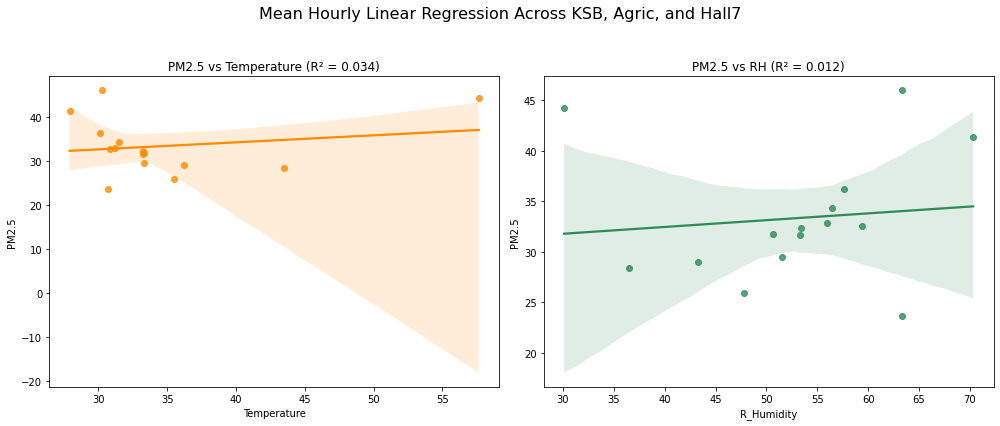

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load and merge datasets
ksb = pd.read_csv("KSB mean hourly.csv")
agric = pd.read_csv("Agric mean hourly.csv")
hall7 = pd.read_csv("Hall7 mean hourly.csv")

# Select and merge relevant columns
merged = pd.concat([
    ksb[['PM2.5', 'Temperature', 'R_Humidity']],
    agric[['PM2.5', 'Temperature', 'R_Humidity']],
    hall7[['PM2.5', 'Temperature', 'R_Humidity']]
], ignore_index=True).dropna()

# ----------------------
# Linear Regression: PM2.5 vs Temperature
# ----------------------
X_temp = merged[['Temperature']]
y_pm25 = merged['PM2.5']
model_temp = LinearRegression().fit(X_temp, y_pm25)
pred_temp = model_temp.predict(X_temp)
r2_temp = r2_score(y_pm25, pred_temp)

# ----------------------
# Linear Regression: PM2.5 vs RH
# ----------------------
X_rh = merged[['R_Humidity']]
model_rh = LinearRegression().fit(X_rh, y_pm25)
pred_rh = model_rh.predict(X_rh)
r2_rh = r2_score(y_pm25, pred_rh)

# ----------------------
# Plotting
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Mean Hourly Linear Regression Across KSB, Agric, and Hall7", fontsize=16)

# PM2.5 vs Temperature
sns.regplot(x='Temperature', y='PM2.5', data=merged, ax=axes[0], color='darkorange')
axes[0].set_title(f"PM2.5 vs Temperature (R² = {r2_temp:.3f})")

# PM2.5 vs RH
sns.regplot(x='R_Humidity', y='PM2.5', data=merged, ax=axes[1], color='seagreen')
axes[1].set_title(f"PM2.5 vs RH (R² = {r2_rh:.3f})")

# Save and show
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Merged_Regression_PM2.5_KSB_AGRIC_HALL7.jpeg", dpi=300)
plt.show()


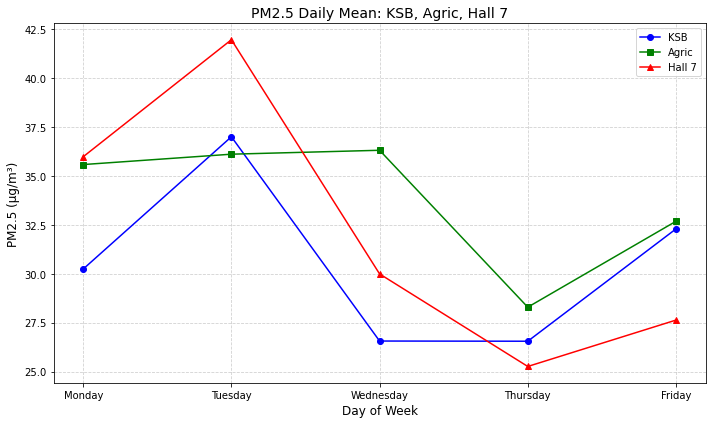

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load only the required daily datasets
ksb_daily = pd.read_csv("KSB mean daily.csv")
agric_daily = pd.read_csv("Agric mean daily.csv")
hall7_daily = pd.read_csv("Hall7 mean daily.csv")

# Ensure consistent weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Function to order days
def prepare(df):
    df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)
    return df.sort_values('Day')

# Apply ordering
ksb_daily = prepare(ksb_daily)
agric_daily = prepare(agric_daily)
hall7_daily = prepare(hall7_daily)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ksb_daily['Day'], ksb_daily['PM2.5'], label='KSB', marker='o', color='blue')
plt.plot(agric_daily['Day'], agric_daily['PM2.5'], label='Agric', marker='s', color='green')
plt.plot(hall7_daily['Day'], hall7_daily['PM2.5'], label='Hall 7', marker='^', color='red')

plt.title('PM2.5 Daily Mean: KSB, Agric, Hall 7', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("PM2.5_daily_mean_KSB_Agric_Hall7.jpeg", dpi=300)
plt.show()


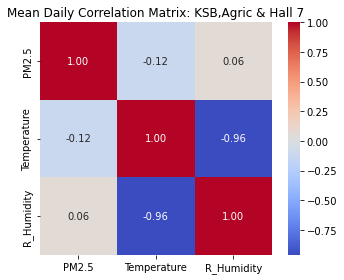

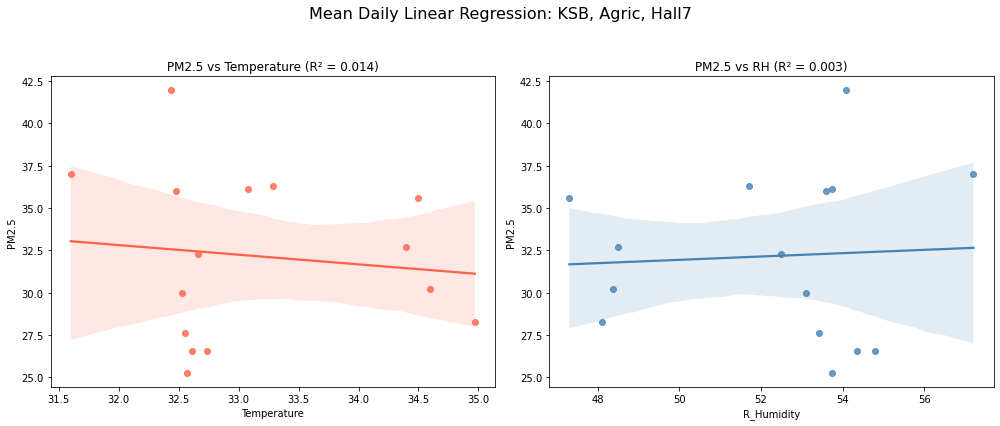

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
ksb = pd.read_csv("KSB mean daily.csv")
agric = pd.read_csv("Agric mean daily.csv")
hall7 = pd.read_csv("Hall7 mean daily.csv")

# Select relevant columns and merge
merged = pd.concat([
    ksb[['PM2.5', 'Temperature', 'R_Humidity']],
    agric[['PM2.5', 'Temperature', 'R_Humidity']],
    hall7[['PM2.5', 'Temperature', 'R_Humidity']]
], ignore_index=True).dropna()

# ----------------------
# Correlation Matrix
# ----------------------
plt.figure(figsize=(5, 4))
corr = merged.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mean Daily Correlation Matrix: KSB,Agric & Hall 7")
plt.tight_layout()
plt.savefig("daily_correlation_matrix.jpeg", dpi=300)
plt.show()

# ----------------------
# Linear Regression: PM2.5 vs Temperature
# ----------------------
X_temp = merged[['Temperature']]
y_pm25 = merged['PM2.5']
model_temp = LinearRegression().fit(X_temp, y_pm25)
r2_temp = r2_score(y_pm25, model_temp.predict(X_temp))

# ----------------------
# Linear Regression: PM2.5 vs RH
# ----------------------
X_rh = merged[['R_Humidity']]
model_rh = LinearRegression().fit(X_rh, y_pm25)
r2_rh = r2_score(y_pm25, model_rh.predict(X_rh))

# ----------------------
# Regression Plots
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Mean Daily Linear Regression: KSB, Agric, Hall7", fontsize=16)

# PM2.5 vs Temperature
sns.regplot(x='Temperature', y='PM2.5', data=merged, ax=axes[0], color='tomato')
axes[0].set_title(f"PM2.5 vs Temperature (R² = {r2_temp:.3f})")

# PM2.5 vs RH
sns.regplot(x='R_Humidity', y='PM2.5', data=merged, ax=axes[1], color='steelblue')
axes[1].set_title(f"PM2.5 vs RH (R² = {r2_rh:.3f})")

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("daily_regression_plots.jpeg", dpi=300)
plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# AQI categories and color bands (EPA USA standard)
aqi_levels = [
    (0, 50, 'Good', '#00E400'),
    (51, 100, 'Moderate', '#FFFF00'),
    (101, 150, 'Unhealthy for Sensitive Groups', '#FF7E00'),
    (151, 200, 'Unhealthy', '#FF0000'),
    (201, 300, 'Very Unhealthy', '#8F3F97'),
    (301, 500, 'Hazardous', '#7E0023')
]

# PM2.5 to AQI converter (US EPA)
def calculate_pm25_aqi(pm):
    for Clow, Chigh, Ilow, Ihigh in [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500),
    ]:
        if Clow <= pm <= Chigh:
            return round(((Ihigh - Ilow) / (Chigh - Clow)) * (pm - Clow) + Ilow)
    return None

# AQI gauge plot function
def draw_aqi_gauge(aqi_value, title='AQI Gauge', filename='aqi_gauge.jpeg'):
    fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi)
    ax.set_theta_direction(-1)
    ax.set_axis_off()

    def aqi_to_angle(aqi):
        return np.deg2rad(180 * aqi / 500)

    for start, end, label, color in aqi_levels:
        theta_start = aqi_to_angle(start)
        theta_end = aqi_to_angle(end)
        theta_mid = (theta_start + theta_end) / 2

        ax.bar(
            x=theta_mid,
            height=1,
            width=(theta_end - theta_start),
            bottom=0,
            color=color,
            edgecolor='white',
            linewidth=2
        )

        ax.text(
            theta_mid,
            1.15,
            f"{label}\n({start}-{end})",
            color='black',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            rotation=np.rad2deg(theta_mid) - 90,
            rotation_mode='anchor'
        )

    # Needle
    aqi_angle = aqi_to_angle(aqi_value)
    ax.plot([aqi_angle, aqi_angle], [0, 1], color='black', linewidth=3)
    ax.plot(aqi_angle, 1, 'o', color='black', markersize=10)

    # Title and centered AQI value below the image
    ax.set_title(title, fontsize=18, y=1.2)
    fig.text(0.5, 0.02, f"AQI: {aqi_value:.0f}", fontsize=24, fontweight='bold', ha='center')

    plt.tight_layout()
    plt.savefig(filename, dpi=300, format='jpeg')
    plt.close()

# Files to load
hourly_files = [
    "KSB mean hourly.csv",
    "Agric mean hourly.csv",
    "Hall7 mean hourly.csv"
]

daily_files = [
    "KSB mean daily.csv",
    "Agric mean daily.csv",
    "Hall7 mean daily.csv"
]

# Combine and compute AQI (Hourly)
hourly_pm25_all = []
for file in hourly_files:
    df = pd.read_csv(file)
    if 'PM2.5' in df.columns:
        df = df.dropna(subset=['PM2.5'])
        df['AQI'] = df['PM2.5'].apply(calculate_pm25_aqi)
        hourly_pm25_all.append(df['AQI'])

combined_hourly_aqi = round(pd.concat(hourly_pm25_all).mean(), 2)
draw_aqi_gauge(combined_hourly_aqi, title="Overall Mean Hourly AQI across KSB, Agric junction and Hall 7", filename="AQI_hourly_OVERALL.jpeg")

# Combine and compute AQI (Daily)
daily_pm25_all = []
for file in daily_files:
    df = pd.read_csv(file)
    if 'PM2.5' in df.columns:
        df = df.dropna(subset=['PM2.5'])
        df['AQI'] = df['PM2.5'].apply(calculate_pm25_aqi)
        daily_pm25_all.append(df['AQI'])

combined_daily_aqi = round(pd.concat(daily_pm25_all).mean(), 2)
draw_aqi_gauge(combined_daily_aqi, title="Overall Mean Daily AQI across KSB, Agric junction and Hall 7", filename="AQI_daily_OVERALL.jpeg")


In [3]:
print(boundary.geometry.is_valid)
print(boundary.geometry.is_empty)


0    True
dtype: bool
0    False
dtype: bool


In [7]:
import pandas as pd

# Route locations and PM2.5 values
pm25_daily = {
    "College of science": 31.09,
    "KSB": 30.53,
    "Agric": 33.79,
    "CAS": 29.35,
    "Hall7": 32.16,
    "Commercial area": 29.63
}

route_df = pd.read_csv("Route Locations.csv")
route_df.rename(columns={"LAT": "Latitude", "LON": "Longitude"}, inplace=True)
route_df["PM2.5"] = route_df["LOC"].map(pm25_daily)

# Check values
print(route_df[["LOC", "Latitude", "Longitude", "PM2.5"]])
print("\nMin:", route_df["PM2.5"].min(), "Max:", route_df["PM2.5"].max())


                       LOC  Latitude  Longitude  PM2.5
0  College of Sciene Route  6.673118  -1.567574    NaN
1                KSB Route  6.668819  -1.566962    NaN
2     Casely Hayford Route  6.675880  -1.567418    NaN
3     Agric Junction Route  6.677260  -1.567122    NaN
4    Commercial Area Route  6.682921  -1.574618    NaN
5             Hall 7 Route  6.679701  -1.573116    NaN

Min: nan Max: nan


In [8]:
import pandas as pd

# Use the exact LOC names from the CSV
pm25_daily = {
    "College of Sciene Route": 31.09,
    "KSB Route": 30.53,
    "Agric Junction Route": 33.79,
    "Casely Hayford Route": 29.35,
    "Hall 7 Route": 32.16,
    "Commercial Area Route": 29.63
}

# Load and rename
route_df = pd.read_csv("Route Locations.csv")
route_df.rename(columns={"LAT": "Latitude", "LON": "Longitude"}, inplace=True)

# Map PM2.5 values
route_df["PM2.5"] = route_df["LOC"].map(pm25_daily)

# Confirm results
print(route_df[["LOC", "PM2.5"]])
print("\nMin:", route_df["PM2.5"].min(), "Max:", route_df["PM2.5"].max())


                       LOC  PM2.5
0  College of Sciene Route  31.09
1                KSB Route  30.53
2     Casely Hayford Route  29.35
3     Agric Junction Route  33.79
4    Commercial Area Route  29.63
5             Hall 7 Route  32.16

Min: 29.35 Max: 33.79


In [10]:
pip install geopandas shapely numpy scipy rasterio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


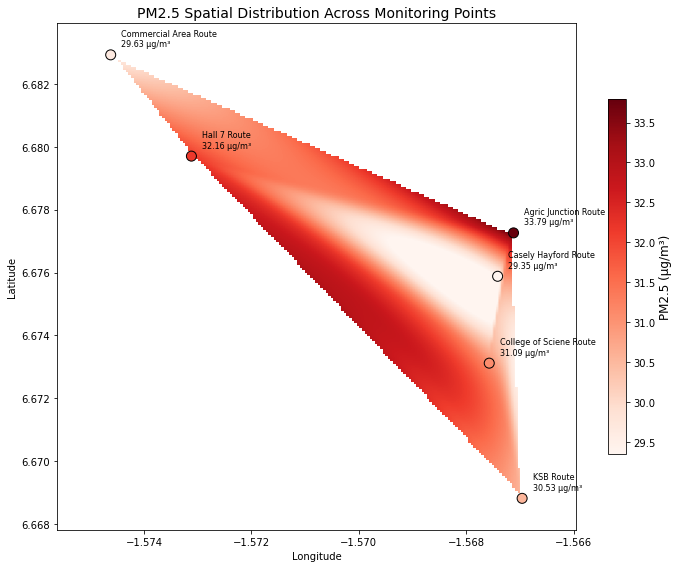

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from shapely.geometry import Point
import geopandas as gpd
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Step 1: Load route locations
df = pd.read_csv("Route Locations.csv")
df.rename(columns={"LAT": "Latitude", "LON": "Longitude"}, inplace=True)

# Step 2: Assign PM2.5 daily values manually
pm25_values = {
    "College of Sciene Route": 31.09,
    "KSB Route": 30.53,
    "Agric Junction Route": 33.79,
    "Casely Hayford Route": 29.35,
    "Hall 7 Route": 32.16,
    "Commercial Area Route": 29.63
}
df["PM2.5"] = df["LOC"].map(pm25_values)

# Step 3: Create grid for interpolation
x = df["Longitude"].values
y = df["Latitude"].values
z = df["PM2.5"].values

# Define grid over the point area
xi = np.linspace(x.min() - 0.001, x.max() + 0.001, 200)
yi = np.linspace(y.min() - 0.001, y.max() + 0.001, 200)
xi, yi = np.meshgrid(xi, yi)

# Step 4: Interpolate PM2.5 data onto grid
zi = griddata((x, y), z, (xi, yi), method="cubic")

# Step 5: Plot the interpolated PM2.5 map
fig, ax = plt.subplots(figsize=(10, 8))
cmap = cm.Reds
norm = Normalize(vmin=np.nanmin(z), vmax=np.nanmax(z))

# Interpolated surface
heatmap = ax.imshow(
    zi,
    extent=(x.min() - 0.001, x.max() + 0.001, y.min() - 0.001, y.max() + 0.001),
    origin="lower",
    cmap=cmap,
    norm=norm,
    aspect="auto"
)

# Overlay the points
sc = ax.scatter(x, y, c=z, cmap=cmap, norm=norm, edgecolor='black', s=100, zorder=2)

# Add labels
for i, row in df.iterrows():
    ax.text(
        row["Longitude"] + 0.0002,
        row["Latitude"] + 0.0002,
        f"{row['LOC']}\n{row['PM2.5']} µg/m³",
        fontsize=8,
        ha="left",
        va="bottom"
    )

# Add colorbar
cbar = fig.colorbar(heatmap, ax=ax, shrink=0.7)
cbar.set_label("PM2.5 (µg/m³)", fontsize=12)

# Aesthetic settings
ax.set_title("PM2.5 Spatial Distribution Across Monitoring Points", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.savefig("PM25_Spatial_Distribution_Map.jpeg", dpi=300)
plt.show()


In [1]:
import pandas as pd

# Use the exact LOC names from the CSV
pm25_daily = {
    "College of Sciene Route": 31.09,
    "KSB Route": 30.53,
    "Agric Junction Route": 33.79,
    "Casely Hayford Route": 29.35,
    "Hall 7 Route": 32.16,
    "Commercial Area Route": 29.63
}

# Load and rename
route_df = pd.read_csv("Route Locations.csv")
route_df.rename(columns={"LAT": "Latitude", "LON": "Longitude"}, inplace=True)

# Map PM2.5 values
route_df["PM2.5"] = route_df["LOC"].map(pm25_daily)

# Confirm results
print(route_df[["LOC", "PM2.5"]])
print("\nMin:", route_df["PM2.5"].min(), "Max:", route_df["PM2.5"].max())


/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


                       LOC  PM2.5
0  College of Sciene Route  31.09
1                KSB Route  30.53
2     Casely Hayford Route  29.35
3     Agric Junction Route  33.79
4    Commercial Area Route  29.63
5             Hall 7 Route  32.16

Min: 29.35 Max: 33.79


In [2]:
import pandas as pd

# Step 1: Define PM2.5 daily values using exact LOC names
pm25_daily = {
    "College of Sciene Route": 31.09,
    "KSB Route": 30.53,
    "Agric Junction Route": 33.79,
    "Casely Hayford Route": 29.35,
    "Hall 7 Route": 32.16,
    "Commercial Area Route": 29.63
}

# Step 2: Load the Route Locations CSV and rename columns
route_df = pd.read_csv("Route Locations.csv")
route_df.rename(columns={"LAT": "Latitude", "LON": "Longitude"}, inplace=True)

# Step 3: Map PM2.5 values to the DataFrame
route_df["PM2.5"] = route_df["LOC"].map(pm25_daily)

# Step 4: Save to new CSV file
route_df.to_csv("Route_PM25_Daily.csv", index=False)

# Step 5: Optional confirmation printout
print(route_df[["LOC", "PM2.5"]])
print("\nSaved as 'Route_PM25_Daily.csv'")
print("Min:", route_df["PM2.5"].min(), "Max:", route_df["PM2.5"].max())


                       LOC  PM2.5
0  College of Sciene Route  31.09
1                KSB Route  30.53
2     Casely Hayford Route  29.35
3     Agric Junction Route  33.79
4    Commercial Area Route  29.63
5             Hall 7 Route  32.16

Saved as 'Route_PM25_Daily.csv'
Min: 29.35 Max: 33.79


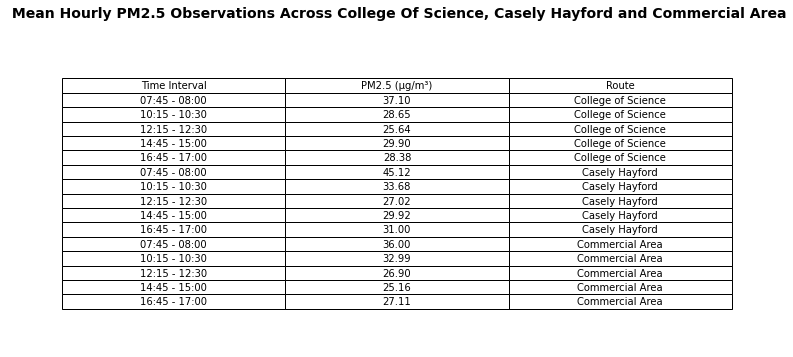

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Route label and file mapping
files = {
    "College of science mean hourly.csv": "College of Science",
    "CAS mean hourly.csv": "Casely Hayford",
    "Commercial area mean hourly.csv": "Commercial Area"
}

# Prepare data for table
table_data = []

for file, label in files.items():
    df = pd.read_csv(file)

    # Clean intervals
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace('–', '-', regex=False)
        .str.replace(r'\s+', '', regex=True)
        .str.replace('-', ' - ', regex=False)
    )
    df['Start'] = pd.to_datetime(df['Interval'].str.split(' - ').str[0], format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start').reset_index(drop=True)

    # Append with route label
    for i, row in df.iterrows():
        table_data.append([row['Interval'], f"{row['PM2.5']:.2f}", label])

# Convert to DataFrame
table_df = pd.DataFrame(table_data, columns=["Time Interval", "PM2.5 (µg/m³)", "Route"])

# Plot as a table
fig, ax = plt.subplots(figsize=(10, len(table_df) * 0.25 + 2))
ax.axis('off')
table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    cellLoc='center',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Title
plt.title(" Mean Hourly PM2.5 Observations Across College Of Science, Casely Hayford and Commercial Area", fontsize=14, weight='bold', pad=20)

# Save as JPEG
plt.savefig("Hourly_PM25_Observation_Table.jpeg", dpi=300, bbox_inches='tight')
plt.show()


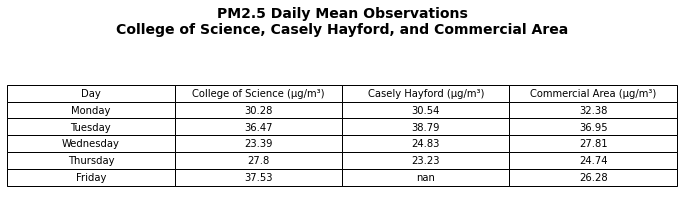

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load daily mean data
com_daily = pd.read_csv("Commercial area mean daily.csv")
cos_daily = pd.read_csv("College of science mean daily.csv")
cas_daily = pd.read_csv("CAS mean daily.csv")

# Ensure consistent day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for df in [com_daily, cos_daily, cas_daily]:
    df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)
    df.sort_values('Day', inplace=True)

# Merge into one DataFrame by 'Day'
table_df = pd.DataFrame({'Day': day_order})
table_df = table_df.merge(cos_daily[['Day', 'PM2.5']], on='Day', how='left')
table_df = table_df.merge(cas_daily[['Day', 'PM2.5']], on='Day', how='left', suffixes=('_College', '_CAS'))
table_df = table_df.merge(com_daily[['Day', 'PM2.5']], on='Day', how='left')
table_df.rename(columns={
    'PM2.5_College': 'College of Science (µg/m³)',
    'PM2.5_CAS': 'Casely Hayford (µg/m³)',
    'PM2.5': 'Commercial Area (µg/m³)'
}, inplace=True)

# Round values
table_df = table_df.round(2)

# Create figure for table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

# Add table
table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    cellLoc='center',
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

# Title
plt.title("PM2.5 Daily Mean Observations\nCollege of Science, Casely Hayford, and Commercial Area",
          fontsize=14, weight='bold', pad=20)

# Save to JPEG
plt.savefig("PM2.5_Daily_Mean_Observation_Table.jpeg", dpi=300, bbox_inches='tight')
plt.show()


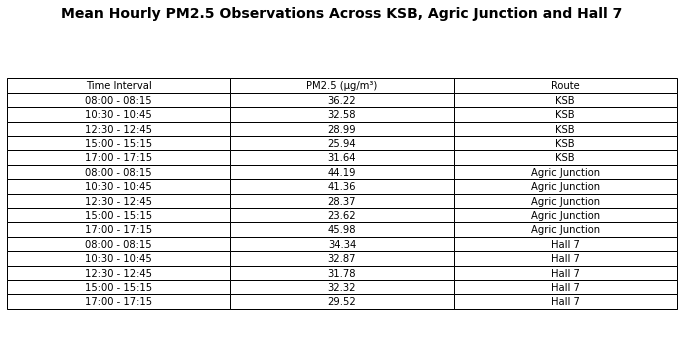

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Route label and file mapping
files = {
    "KSB mean hourly.csv": "KSB",
    "Agric mean hourly.csv": "Agric Junction",
    "Hall7 mean hourly.csv": "Hall 7"
}

# Prepare data for table
table_data = []

for file, label in files.items():
    df = pd.read_csv(file)

    # Clean intervals
    df['Interval'] = (
        df['Interval']
        .astype(str)
        .str.replace('–', '-', regex=False)
        .str.replace(r'\s+', '', regex=True)
        .str.replace('-', ' - ', regex=False)
    )
    df['Start'] = pd.to_datetime(df['Interval'].str.split(' - ').str[0], format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start').reset_index(drop=True)

    # Append with route label
    for i, row in df.iterrows():
        table_data.append([row['Interval'], f"{row['PM2.5']:.2f}", label])

# Convert to DataFrame
table_df = pd.DataFrame(table_data, columns=["Time Interval", "PM2.5 (µg/m³)", "Route"])

# Plot as a table
fig, ax = plt.subplots(figsize=(10, len(table_df) * 0.25 + 2))
ax.axis('off')
table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    cellLoc='center',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Title
plt.title("Mean Hourly PM2.5 Observations Across KSB, Agric Junction and Hall 7", fontsize=14, weight='bold', pad=20)

# Save as JPEG
plt.savefig("Hourly_PM25_Observation_Table_KSB_Agric_Hall7.jpeg", dpi=300, bbox_inches='tight')
plt.show()


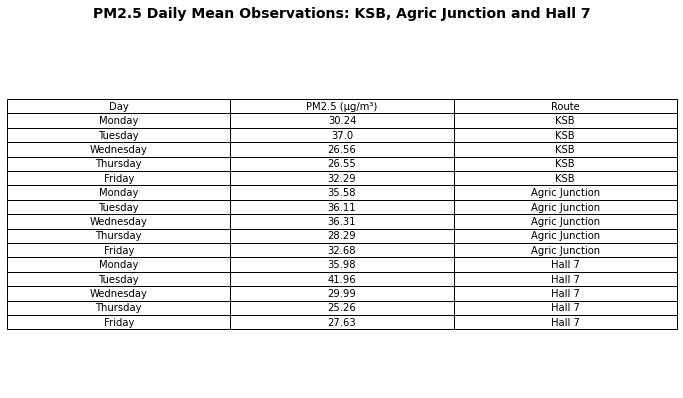

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load only the required daily datasets
ksb_daily = pd.read_csv("KSB mean daily.csv")
agric_daily = pd.read_csv("Agric mean daily.csv")
hall7_daily = pd.read_csv("Hall7 mean daily.csv")

# Ensure consistent weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Helper function to reorder
def prepare(df, label):
    df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)
    df = df.sort_values('Day').reset_index(drop=True)
    df['Route'] = label
    return df[['Day', 'PM2.5', 'Route']]

# Prepare and combine
ksb_daily = prepare(ksb_daily, "KSB")
agric_daily = prepare(agric_daily, "Agric Junction")
hall7_daily = prepare(hall7_daily, "Hall 7")

# Merge all into a single DataFrame
table_df = pd.concat([ksb_daily, agric_daily, hall7_daily], ignore_index=True)
table_df['PM2.5'] = table_df['PM2.5'].round(2)

# Plot as a table
fig, ax = plt.subplots(figsize=(10, len(table_df) * 0.3 + 2))
ax.axis('off')
table = ax.table(
    cellText=table_df.values,
    colLabels=["Day", "PM2.5 (µg/m³)", "Route"],
    cellLoc='center',
    loc='center'
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add title
plt.title("PM2.5 Daily Mean Observations: KSB, Agric Junction and Hall 7", fontsize=14, weight='bold', pad=20)

# Save as image
plt.savefig("Daily_PM25_Observation_Table_KSB_Agric_Hall7.jpeg", dpi=300, bbox_inches='tight')
plt.show()


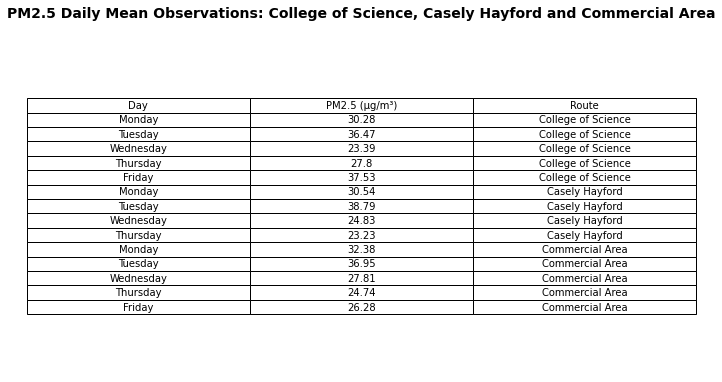

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the required daily datasets
cos_daily = pd.read_csv("College of science mean daily.csv")
cas_daily = pd.read_csv("CAS mean daily.csv")
com_daily = pd.read_csv("Commercial area mean daily.csv")

# Ensure consistent weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Helper function to reorder and label
def prepare(df, label):
    df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)
    df = df.sort_values('Day').reset_index(drop=True)
    df['Route'] = label
    return df[['Day', 'PM2.5', 'Route']]

# Prepare and combine
cos_daily = prepare(cos_daily, "College of Science")
cas_daily = prepare(cas_daily, "Casely Hayford")
com_daily = prepare(com_daily, "Commercial Area")

# Merge all into a single DataFrame
table_df = pd.concat([cos_daily, cas_daily, com_daily], ignore_index=True)
table_df['PM2.5'] = table_df['PM2.5'].round(2)

# Plot as a table
fig, ax = plt.subplots(figsize=(10, len(table_df) * 0.3 + 2))
ax.axis('off')
table = ax.table(
    cellText=table_df.values,
    colLabels=["Day", "PM2.5 (µg/m³)", "Route"],
    cellLoc='center',
    loc='center'
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add title
plt.title("PM2.5 Daily Mean Observations: College of Science, Casely Hayford and Commercial Area", 
          fontsize=14, weight='bold', pad=20)

# Save as image
plt.savefig("Daily_PM25_Observation_Table_COS_CAS_Commercial.jpeg", dpi=300, bbox_inches='tight')
plt.show()


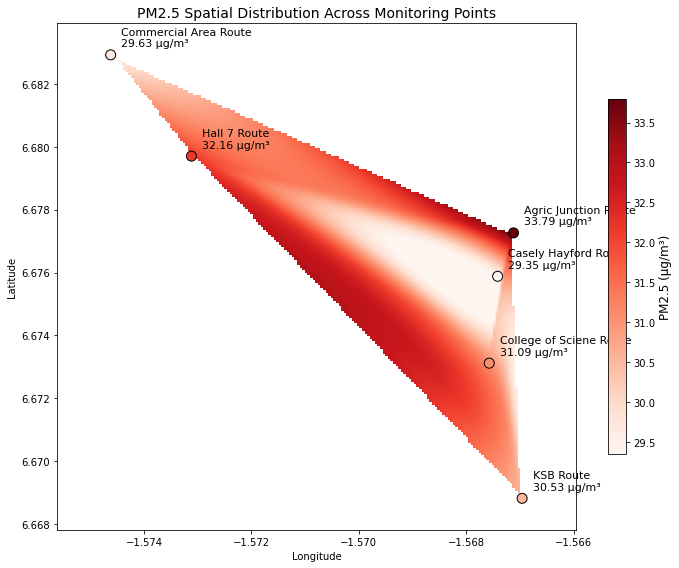

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from shapely.geometry import Point
import geopandas as gpd
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Step 1: Load route locations
df = pd.read_csv("Route Locations.csv")
df.rename(columns={"LAT": "Latitude", "LON": "Longitude"}, inplace=True)

# Step 2: Assign PM2.5 daily values manually
pm25_values = {
    "College of Sciene Route": 31.09,
    "KSB Route": 30.53,
    "Agric Junction Route": 33.79,
    "Casely Hayford Route": 29.35,
    "Hall 7 Route": 32.16,
    "Commercial Area Route": 29.63
}
df["PM2.5"] = df["LOC"].map(pm25_values)

# Step 3: Create grid for interpolation
x = df["Longitude"].values
y = df["Latitude"].values
z = df["PM2.5"].values

# Define grid over the point area
xi = np.linspace(x.min() - 0.001, x.max() + 0.001, 200)
yi = np.linspace(y.min() - 0.001, y.max() + 0.001, 200)
xi, yi = np.meshgrid(xi, yi)

# Step 4: Interpolate PM2.5 data onto grid
zi = griddata((x, y), z, (xi, yi), method="cubic")

# Step 5: Plot the interpolated PM2.5 map
fig, ax = plt.subplots(figsize=(10, 8))
cmap = cm.Reds
norm = Normalize(vmin=np.nanmin(z), vmax=np.nanmax(z))

# Interpolated surface
heatmap = ax.imshow(
    zi,
    extent=(x.min() - 0.001, x.max() + 0.001, y.min() - 0.001, y.max() + 0.001),
    origin="lower",
    cmap=cmap,
    norm=norm,
    aspect="auto"
)

# Overlay the points
sc = ax.scatter(x, y, c=z, cmap=cmap, norm=norm, edgecolor='black', s=100, zorder=2)

# Add labels with increased font size
for i, row in df.iterrows():
    ax.text(
        row["Longitude"] + 0.0002,
        row["Latitude"] + 0.0002,
        f"{row['LOC']}\n{row['PM2.5']} µg/m³",
        fontsize=11,  # Increased from 8
        ha="left",
        va="bottom"
    )

# Add colorbar
cbar = fig.colorbar(heatmap, ax=ax, shrink=0.7)
cbar.set_label("PM2.5 (µg/m³)", fontsize=12)

# Aesthetic settings
ax.set_title("PM2.5 Spatial Distribution Across Monitoring Points", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.savefig("PM25_Spatial_Distribution_Map.jpeg", dpi=300)
plt.show()


In [1]:
import xarray as xr

/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
ds = xr.open_dataset("wind data.nc")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
ds

<xarray.Dataset> Size: 4kB
Dimensions:     (valid_time: 100, latitude: 2, longitude: 1)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 800B 2025-07-14T08:00:00 ... 2025...
  * latitude    (latitude) float64 16B 6.75 6.5
  * longitude   (longitude) float64 8B -1.7
    expver      (valid_time) <U4 2kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 800B ...
    v10         (valid_time, latitude, longitude) float32 800B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-02T17:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
import xarray as xr
import numpy as np
import pandas as pd

# Extract time series for nearest grid point
u10_knust = ds['u10'].sel(latitude=6.75, longitude=-1.7, method='nearest')
v10_knust = ds['v10'].sel(latitude=6.75, longitude=-1.7, method='nearest')


In [6]:
# Wind speed
wind_speed = np.sqrt(u10_knust**2 + v10_knust**2)

# Wind direction (meteorological, from which the wind is coming)
wind_dir = (np.arctan2(-u10_knust, -v10_knust) * 180 / np.pi) % 360


In [7]:
df = pd.DataFrame({
    'speed': wind_speed.values,
    'direction': wind_dir.values
}, index=u10_knust['valid_time'].values)


/home/jephthah/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


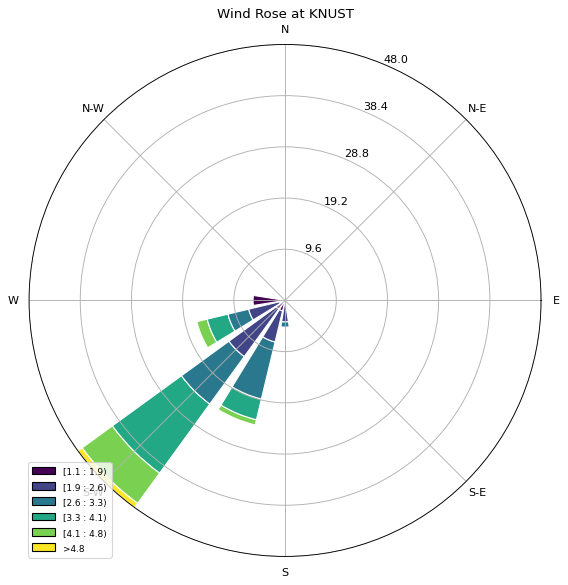

In [8]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df['direction'], df['speed'],
       normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose at KNUST')
plt.show()


In [10]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load dataset (if not already loaded)
# ds = xr.open_dataset("your_file_path.nc")

# KNUST approximate location
lat_knust = 6.6745
lon_knust = -1.5715

# Select nearest grid point
u10_knust = ds['u10'].sel(latitude=lat_knust, longitude=lon_knust, method='nearest')
v10_knust = ds['v10'].sel(latitude=lat_knust, longitude=lon_knust, method='nearest')

# Calculate wind speed and direction
wind_speed = np.sqrt(u10_knust**2 + v10_knust**2)
wind_dir = (np.arctan2(-u10_knust, -v10_knust) * 180 / np.pi) % 360

# Create DataFrame
df = pd.DataFrame({
    'speed': wind_speed.values,
    'direction': wind_dir.values
}, index=u10_knust['valid_time'].values)

# Plot wind rose and save
fig = plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['direction'], df['speed'],
       normed=True,
       opening=0.8,
       edgecolor='black',
       bins=np.arange(0, np.ceil(df['speed'].max()) + 2, 2),  # 2 m/s intervals
       cmap=plt.cm.viridis)

# Title and vertical legend
ax.set_title("Wind Rose at KNUST", fontsize=16)
ax.set_legend(title="Wind Speed (m/s)", loc='center left',
              bbox_to_anchor=(1.1, 0.5), fontsize=12, title_fontsize=12)

# Save as JPEG
plt.tight_layout()
plt.savefig("wind_rose_knust.jpeg", format='jpeg', dpi=300)
plt.close()

print("Wind rose saved as 'wind_rose_knust.jpeg'")


/tmp/ipykernel_6673/125313553.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Wind rose saved as 'wind_rose_knust.jpeg'


Correlation between PM2.5 and Wind Speed: -0.87


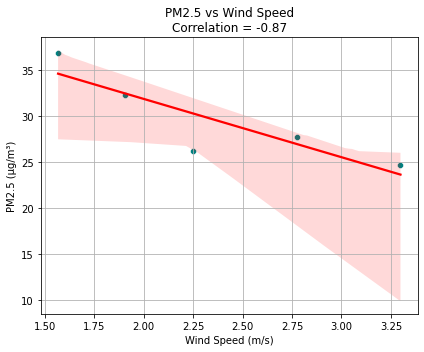

In [5]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Load Air Quality Data ----------
com = pd.read_csv("Commercial area mean daily.csv")
cos = pd.read_csv("College of science mean daily.csv")
cas = pd.read_csv("CAS mean daily.csv")

merged = pd.concat([com, cos, cas], ignore_index=True)
merged['Date'] = pd.to_datetime(merged['Date'])

aq_daily = merged.groupby('Date')[['PM2.5']].mean().reset_index()

# ---------- Load Wind Data ----------
ds = xr.open_dataset("wind data.nc")

# Compute wind speed and name it
wind_speed = np.sqrt(ds['u10']**2 + ds['v10']**2)
wind_speed.name = "wind_speed"

# Spatial average and daily resample
wind_mean = wind_speed.mean(dim=['latitude', 'longitude'])
wind_daily = wind_mean.resample(valid_time='1D').mean()

# Convert to DataFrame
wind_df = wind_daily.to_dataframe().reset_index()
wind_df = wind_df.rename(columns={'valid_time': 'Date'})

# ---------- Merge PM2.5 with Wind Speed ----------
wind_df['Date'] = pd.to_datetime(wind_df['Date'])
df = pd.merge(aq_daily, wind_df, on='Date').dropna()

# ---------- Correlation Calculation ----------
correlation = df['PM2.5'].corr(df['wind_speed'])
print(f"Correlation between PM2.5 and Wind Speed: {correlation:.2f}")

# ---------- Scatter Plot ----------
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='wind_speed', y='PM2.5', color='teal')
sns.regplot(data=df, x='wind_speed', y='PM2.5', scatter=False, color='red')
plt.title(f"PM2.5 vs Wind Speed\nCorrelation = {correlation:.2f}")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.savefig("pm25_wind_correlation.jpeg", dpi=300)
plt.show()


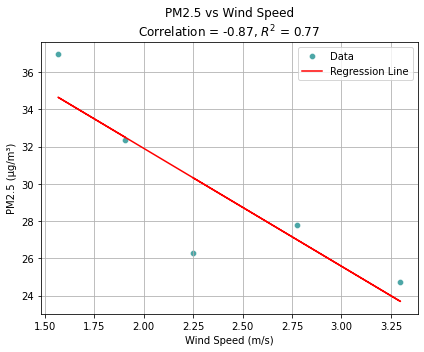

In [6]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---------- Load Air Quality Data ----------
com = pd.read_csv("Commercial area mean daily.csv")
cos = pd.read_csv("College of science mean daily.csv")
cas = pd.read_csv("CAS mean daily.csv")

# Merge and average daily PM2.5
merged = pd.concat([com, cos, cas], ignore_index=True)
merged['Date'] = pd.to_datetime(merged['Date'])
aq_daily = merged.groupby('Date')[['PM2.5']].mean().reset_index()

# ---------- Load Wind Data ----------
ds = xr.open_dataset("wind data.nc")

# Compute wind speed and name it
wind_speed = np.sqrt(ds['u10']**2 + ds['v10']**2)
wind_speed.name = "wind_speed"

# Spatial and temporal mean
wind_mean = wind_speed.mean(dim=['latitude', 'longitude'])
wind_daily = wind_mean.resample(valid_time='1D').mean()

# Convert to DataFrame
wind_df = wind_daily.to_dataframe().reset_index()
wind_df = wind_df.rename(columns={'valid_time': 'Date'})

# ---------- Merge DataFrames ----------
wind_df['Date'] = pd.to_datetime(wind_df['Date'])
df = pd.merge(aq_daily, wind_df, on='Date').dropna()

# ---------- Correlation ----------
correlation = df['PM2.5'].corr(df['wind_speed'])

# ---------- Linear Regression ----------
X = df[['wind_speed']]
y = df['PM2.5']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# ---------- Plot ----------
plt.figure(figsize=(6, 5))
sns.scatterplot(x='wind_speed', y='PM2.5', data=df, color='teal', alpha=0.7, label='Data')
plt.plot(df['wind_speed'], y_pred, color='red', label='Regression Line')
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.title(f"PM2.5 vs Wind Speed\nCorrelation = {correlation:.2f}, $R^2$ = {r2:.2f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pm25_wind_regression.jpeg", dpi=300)
plt.show()


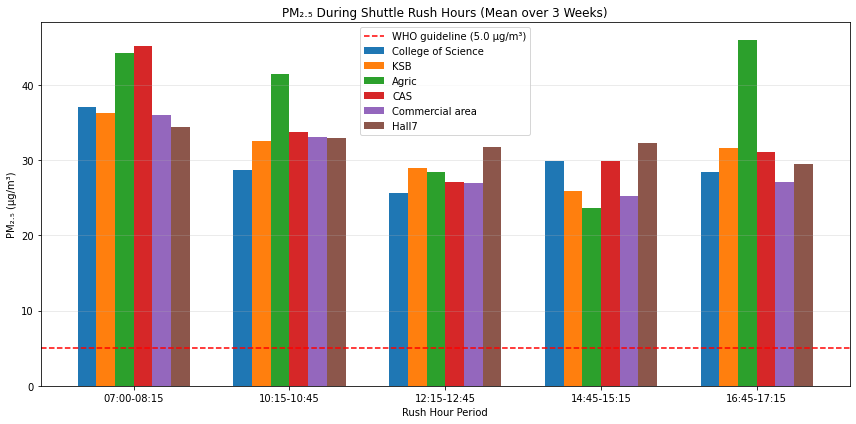

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# FILES & SETTINGS
# -----------------------------
files = {
    "College of Science": "College of science mean hourly.csv",
    "KSB": "KSB mean hourly.csv",
    "Agric": "Agric mean hourly.csv",
    "CAS": "CAS mean hourly.csv",
    "Commercial area": "Commercial area mean hourly.csv",
    "Hall7": "Hall7 mean hourly.csv"
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

WHO_PM25_GUIDELINE = 5.0  # µg/m³

# Actual rush-hour time ranges (in order they appear in CSVs)
rush_hours_labels = [
    "07:00-08:15",
    "10:15-10:45",
    "12:15-12:45",
    "14:45-15:15",
    "16:45-17:15"
]

# -----------------------------
# HELPER FUNCTION
# -----------------------------
def find_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower_cols = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower_cols:
            return lower_cols[c.lower()]
    return None

# -----------------------------
# LOAD & MERGE ALL ROUTES
# -----------------------------
merged_df = None
for route, path in files.items():
    df = pd.read_csv(path)
    pm_col = find_column(df, PM_CANDIDATES)
    hour_col = find_column(df, HOUR_CANDIDATES)

    if hour_col is None:
        df["Hour"] = rush_hours_labels  # assign our defined labels
        hour_col = "Hour"

    df = df[[hour_col, pm_col]].copy()
    df.rename(columns={pm_col: route, hour_col: "Hour"}, inplace=True)

    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on="Hour", how="outer")

# Ensure order matches our rush-hours list
merged_df["Hour"] = pd.Categorical(merged_df["Hour"], categories=rush_hours_labels, ordered=True)
merged_df.sort_values("Hour", inplace=True)

# -----------------------------
# PLOT: grouped bar chart
# -----------------------------
routes = list(files.keys())
hours = merged_df["Hour"].values
n_hours = len(hours)
n_routes = len(routes)

bar_width = 0.12
x = np.arange(n_hours)

fig, ax = plt.subplots(figsize=(12, 6))

for i, route in enumerate(routes):
    ax.bar(x + i*bar_width, merged_df[route], width=bar_width, label=route)

# WHO guideline line
ax.axhline(WHO_PM25_GUIDELINE, color="red", linestyle="--", linewidth=1.5, label=f"WHO guideline ({WHO_PM25_GUIDELINE} µg/m³)")

ax.set_xticks(x + bar_width * (n_routes-1) / 2)
ax.set_xticklabels(hours)
ax.set_xlabel("Rush Hour Period")
ax.set_ylabel("PM₂.₅ (µg/m³)")
ax.set_title("PM₂.₅ During Shuttle Rush Hours (Mean over 3 Weeks)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


/tmp/ipykernel_5233/2985521265.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
/tmp/ipykernel_5233/2985521265.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
/tmp/ipykernel_5233/2985521265.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors="coerce")



=== Mean Daily PM₂.₅ Summary (3 weeks) ===
             Route  Mean_PM25  WHO_Exceed_Days  EPA_Exceed_Days  Total_Days
College of Science      31.09                5                2           5
               KSB      30.53                5                1           5
             Agric      33.79                5                3           5
               CAS      29.35                4                1           4
   Commercial area      29.63                5                1           5
             Hall7      32.16                5                2           5


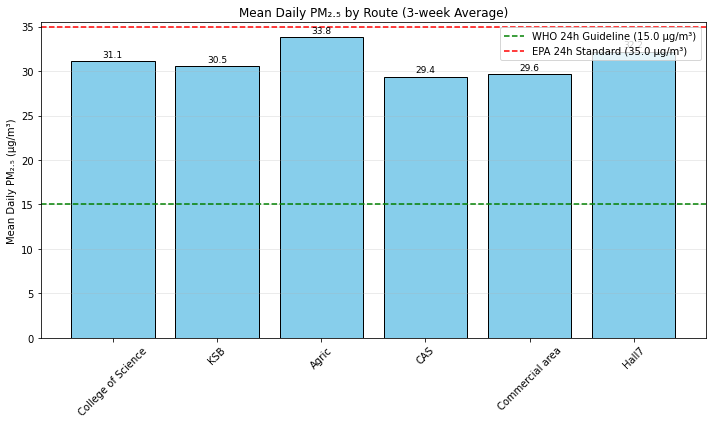

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# FILES & SETTINGS
# -----------------------------
files = {
    "College of Science": "College of science mean daily.csv",
    "KSB": "KSB mean daily.csv",
    "Agric": "Agric mean daily.csv",
    "CAS": "CAS mean daily.csv",
    "Commercial area": "Commercial area mean daily.csv",
    "Hall7": "Hall7 mean daily.csv"
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
DATE_CANDIDATES = ["Date", "date", "DATE", "Day", "day"]

WHO_PM25_24H = 15.0   # WHO 24-hour guideline (µg/m³)
EPA_PM25_24H = 35.0   # EPA 24-hour standard (µg/m³)

# -----------------------------
# HELPER FUNCTION
# -----------------------------
def find_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower_cols = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower_cols:
            return lower_cols[c.lower()]
    return None

# -----------------------------
# MAIN ANALYSIS
# -----------------------------
results = []

for route, path in files.items():
    df = pd.read_csv(path)

    # Identify PM2.5 column
    pm_col = find_column(df, PM_CANDIDATES)
    if pm_col is None:
        raise ValueError(f"No PM2.5 column found in {path}")

    # Identify date column (optional, just for info)
    date_col = find_column(df, DATE_CANDIDATES)
    if date_col:
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    df[pm_col] = pd.to_numeric(df[pm_col], errors="coerce")
    df = df.dropna(subset=[pm_col])

    # Calculate mean daily PM2.5 over the 3 weeks
    mean_pm25 = df[pm_col].mean()

    # Count exceedances
    who_exceed = (df[pm_col] > WHO_PM25_24H).sum()
    epa_exceed = (df[pm_col] > EPA_PM25_24H).sum()

    results.append({
        "Route": route,
        "Mean_PM25": round(mean_pm25, 2),
        "WHO_Exceed_Days": who_exceed,
        "EPA_Exceed_Days": epa_exceed,
        "Total_Days": len(df)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Mean Daily PM₂.₅ Summary (3 weeks) ===")
print(results_df.to_string(index=False))

# -----------------------------
# PLOT
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results_df))
ax.bar(x, results_df["Mean_PM25"], color="skyblue", edgecolor="black")

# Add guideline lines
ax.axhline(WHO_PM25_24H, color="green", linestyle="--", linewidth=1.5, label=f"WHO 24h Guideline ({WHO_PM25_24H} µg/m³)")
ax.axhline(EPA_PM25_24H, color="red", linestyle="--", linewidth=1.5, label=f"EPA 24h Standard ({EPA_PM25_24H} µg/m³)")

# Labels
ax.set_xticks(x)
ax.set_xticklabels(results_df["Route"], rotation=45)
ax.set_ylabel("Mean Daily PM₂.₅ (µg/m³)")
ax.set_title("Mean Daily PM₂.₅ by Route (3-week Average)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# Value labels on bars
for i, val in enumerate(results_df["Mean_PM25"]):
    ax.text(i, val + 0.5, f"{val:.1f}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()



=== PM₂.₅ Exposure Assessment (Mean Daily, HQ-like) ===
             Route         Group  Mean_PM25    EC  HQ_Ghana  HQ_WHO
College of Science    Passengers      31.09 31.09      0.89    2.07
College of Science       Drivers      31.09 31.09      0.89    2.07
College of Science Waiting staff      31.09 31.09      0.89    2.07
               KSB    Passengers      30.53 30.53      0.87    2.04
               KSB       Drivers      30.53 30.53      0.87    2.04
               KSB Waiting staff      30.53 30.53      0.87    2.04
             Agric    Passengers      33.79 33.79      0.97    2.25
             Agric       Drivers      33.79 33.79      0.97    2.25
             Agric Waiting staff      33.79 33.79      0.97    2.25
               CAS    Passengers      29.35 29.35      0.84    1.96
               CAS       Drivers      29.35 29.35      0.84    1.96
               CAS Waiting staff      29.35 29.35      0.84    1.96
   Commercial area    Passengers      29.63 29.63      0.85

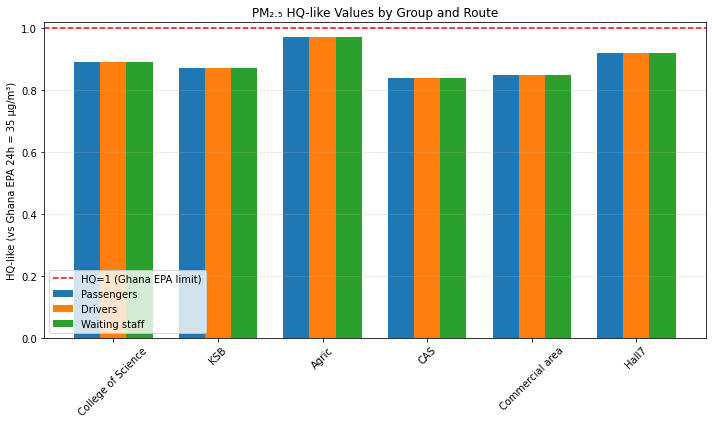

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# FILES & ROUTE NAMES
# -----------------------------
files = {
    "College of Science": "College of science mean daily.csv",
    "KSB": "KSB mean daily.csv",
    "Agric": "Agric mean daily.csv",
    "CAS": "CAS mean daily.csv",
    "Commercial area": "Commercial area mean daily.csv",
    "Hall7": "Hall7 mean daily.csv"
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]

# Standards
GHANA_PM25_24H = 35.0  # µg/m³
WHO_PM25_24H = 15.0    # µg/m³

# Exposure parameters (per group)
groups = {
    "Passengers": {"ET": 1.0, "EF": 21, "ED": 3/52},
    "Drivers": {"ET": 8.0, "EF": 21, "ED": 3/52},
    "Waiting staff": {"ET": 4.0, "EF": 21, "ED": 3/52}
}

# -----------------------------
# HELPER FUNCTION
# -----------------------------
def find_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower_cols = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower_cols:
            return lower_cols[c.lower()]
    return None

# -----------------------------
# MAIN ANALYSIS
# -----------------------------
results = []

for route, path in files.items():
    df = pd.read_csv(path)
    pm_col = find_column(df, PM_CANDIDATES)
    if pm_col is None:
        raise ValueError(f"No PM2.5 column found in {path}")

    df[pm_col] = pd.to_numeric(df[pm_col], errors="coerce")
    df = df.dropna(subset=[pm_col])

    # Mean daily PM2.5 over the period
    CA = df[pm_col].mean()

    # Compute EC and HQ-like for each group
    for group, params in groups.items():
        ET, EF, ED = params["ET"], params["EF"], params["ED"]
        AT = ET * EF * ED
        EC = (CA * ET * EF * ED) / AT  # will equal CA if AT matches
        HQ_ghana = EC / GHANA_PM25_24H
        HQ_who = EC / WHO_PM25_24H

        results.append({
            "Route": route,
            "Group": group,
            "Mean_PM25": round(CA, 2),
            "EC": round(EC, 2),
            "HQ_Ghana": round(HQ_ghana, 2),
            "HQ_WHO": round(HQ_who, 2)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\n=== PM₂.₅ Exposure Assessment (Mean Daily, HQ-like) ===")
print(results_df.to_string(index=False))

# -----------------------------
# PLOT HQ-Ghana by group/route
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 6))
routes_list = list(files.keys())
x = np.arange(len(routes_list))
bar_width = 0.25

for i, group in enumerate(groups.keys()):
    hq_vals = results_df[results_df["Group"] == group]["HQ_Ghana"].values
    ax.bar(x + i*bar_width, hq_vals, width=bar_width, label=group)

ax.axhline(1, color="red", linestyle="--", linewidth=1.5, label="HQ=1 (Ghana EPA limit)")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(routes_list, rotation=45)
ax.set_ylabel("HQ-like (vs Ghana EPA 24h = 35 µg/m³)")
ax.set_title("PM₂.₅ HQ-like Values by Group and Route")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()



=== PM₂.₅ Exposure Assessment at Peak Hour(s) (HQ-like) ===
             Route         Group  Peak_PM25    EC  HQ_Ghana  HQ_WHO
College of Science    Passengers      37.10 37.10      1.06    2.47
College of Science       Drivers      37.10 37.10      1.06    2.47
College of Science Waiting staff      37.10 37.10      1.06    2.47
               KSB    Passengers      36.22 36.22      1.03    2.41
               KSB       Drivers      36.22 36.22      1.03    2.41
               KSB Waiting staff      36.22 36.22      1.03    2.41
             Agric    Passengers      45.98 45.98      1.31    3.07
             Agric       Drivers      45.98 45.98      1.31    3.07
             Agric Waiting staff      45.98 45.98      1.31    3.07
               CAS    Passengers      45.12 45.12      1.29    3.01
               CAS       Drivers      45.12 45.12      1.29    3.01
               CAS Waiting staff      45.12 45.12      1.29    3.01
   Commercial area    Passengers      36.00 36.00      

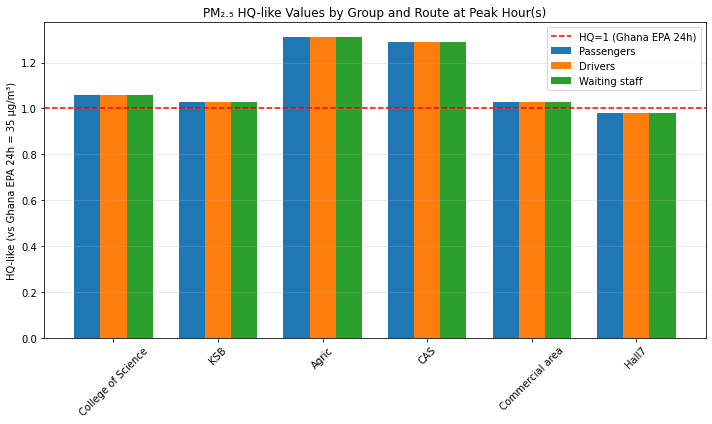

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# FILES & ROUTE NAMES
# -----------------------------
files = {
    "College of Science": "College of science mean hourly.csv",
    "KSB": "KSB mean hourly.csv",
    "Agric": "Agric mean hourly.csv",
    "CAS": "CAS mean hourly.csv",
    "Commercial area": "Commercial area mean hourly.csv",
    "Hall7": "Hall7 mean hourly.csv"
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

# Standards
GHANA_PM25_24H = 35.0
WHO_PM25_24H = 15.0

# Exposure parameters (per group)
groups = {
    "Passengers": {"ET": 1.0, "EF": 21, "ED": 3/52},  # round trip 1 hour/day
    "Drivers": {"ET": 8.0, "EF": 21, "ED": 3/52},     # 8 hours/day
    "Waiting staff": {"ET": 4.0, "EF": 21, "ED": 3/52} # 4 hours/day
}

# -----------------------------
# HELPER FUNCTION
# -----------------------------
def find_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower_cols = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower_cols:
            return lower_cols[c.lower()]
    return None

# -----------------------------
# MAIN ANALYSIS
# -----------------------------
results = []

for route, path in files.items():
    df = pd.read_csv(path)
    pm_col = find_column(df, PM_CANDIDATES)
    hour_col = find_column(df, HOUR_CANDIDATES)

    if hour_col is None:
        df["Hour"] = list(range(len(df)))
        hour_col = "Hour"

    df[pm_col] = pd.to_numeric(df[pm_col], errors="coerce")
    df = df.dropna(subset=[pm_col])

    # --- Identify PEAK hour(s) ---
    # Change nlargest(1) to nlargest(2) if you want top 2 hours averaged
    peak_hours = df.nlargest(1, pm_col)
    CA_peak = peak_hours[pm_col].mean()

    # --- Compute EC and HQ for each group ---
    for group, params in groups.items():
        ET, EF, ED = params["ET"], params["EF"], params["ED"]
        AT = ET * EF * ED
        EC = (CA_peak * ET * EF * ED) / AT
        HQ_ghana = EC / GHANA_PM25_24H
        HQ_who = EC / WHO_PM25_24H

        results.append({
            "Route": route,
            "Group": group,
            "Peak_PM25": round(CA_peak, 2),
            "EC": round(EC, 2),
            "HQ_Ghana": round(HQ_ghana, 2),
            "HQ_WHO": round(HQ_who, 2)
        })

# -----------------------------
# OUTPUT TABLE
# -----------------------------
results_df = pd.DataFrame(results)
print("\n=== PM₂.₅ Exposure Assessment at Peak Hour(s) (HQ-like) ===")
print(results_df.to_string(index=False))

# -----------------------------
# PLOT HQ-Ghana at peaks
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 6))
routes_list = list(files.keys())
x = np.arange(len(routes_list))
bar_width = 0.25

for i, group in enumerate(groups.keys()):
    hq_vals = results_df[results_df["Group"] == group]["HQ_Ghana"].values
    ax.bar(x + i*bar_width, hq_vals, width=bar_width, label=group)

ax.axhline(1, color="red", linestyle="--", linewidth=1.5, label="HQ=1 (Ghana EPA 24h)")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(routes_list, rotation=45)
ax.set_ylabel("HQ-like (vs Ghana EPA 24h = 35 µg/m³)")
ax.set_title("PM₂.₅ HQ-like Values by Group and Route at Peak Hour(s)")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()



Summary table (mean daily vs peak metrics):
             Route  Mean_Daily  Days  Hourly_mean_of_sampled  Peak_hour  Top2_mean  Hourly_std  Hourly_CV
             Agric       33.79     5                   36.70      45.98      45.08        8.99       0.25
             Hall7       32.16     5                   32.17      34.34      33.61        1.57       0.05
College of Science       31.09     5                   29.93      37.10      33.50        3.84       0.13
               KSB       30.53     5                   31.07      36.22      34.40        3.46       0.11
   Commercial area       29.63     5                   29.63      36.00      34.50        4.14       0.14
               CAS       29.35     4                   33.35      45.12      39.40        6.26       0.19

Ranks (higher = worse):
             Route  Rank_mean_daily  Rank_peak
             Agric              1.0        1.0
             Hall7              2.0        6.0
College of Science              3.0        3.0


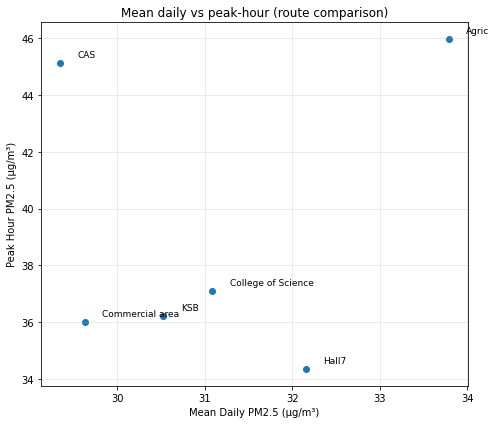

/tmp/ipykernel_5233/4093194511.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=summary_df['Route'], showmeans=True)


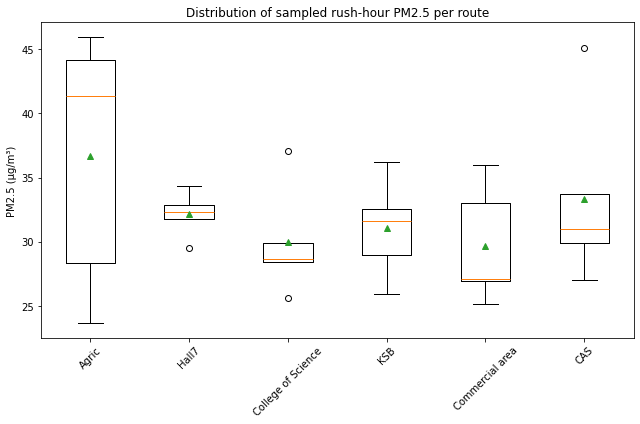

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Edit filenames if necessary ---
routes = {
    "College of Science": {
        "daily": "College of science mean daily.csv",
        "hourly": "College of science mean hourly.csv"
    },
    "KSB": {
        "daily": "KSB mean daily.csv",
        "hourly": "KSB mean hourly.csv"
    },
    "Agric": {
        "daily": "Agric mean daily.csv",
        "hourly": "Agric mean hourly.csv"
    },
    "CAS": {
        "daily": "CAS mean daily.csv",
        "hourly": "CAS mean hourly.csv"
    },
    "Commercial area": {
        "daily": "Commercial area mean daily.csv",
        "hourly": "Commercial area mean hourly.csv"
    },
    "Hall7": {
        "daily": "Hall7 mean daily.csv",
        "hourly": "Hall7 mean hourly.csv"
    }
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

summary = []
hourly_detail = {}

for route, files in routes.items():
    # load daily
    df_daily = pd.read_csv(files["daily"])
    pm_col_daily = find_col(df_daily, PM_CANDIDATES)
    if pm_col_daily is None:
        raise ValueError(f"No PM column in {files['daily']}")
    df_daily[pm_col_daily] = pd.to_numeric(df_daily[pm_col_daily], errors='coerce')
    df_daily = df_daily.dropna(subset=[pm_col_daily])
    mean_daily = df_daily[pm_col_daily].mean()
    days = len(df_daily)

    # load hourly (mean-hour rows)
    df_hr = pd.read_csv(files["hourly"])
    pm_col_hr = find_col(df_hr, PM_CANDIDATES)
    if pm_col_hr is None:
        raise ValueError(f"No PM column in {files['hourly']}")
    df_hr[pm_col_hr] = pd.to_numeric(df_hr[pm_col_hr], errors='coerce')
    df_hr = df_hr.dropna(subset=[pm_col_hr]).reset_index(drop=True)

    # compute peak metrics
    peak1 = df_hr[pm_col_hr].max() if len(df_hr)>0 else np.nan
    top2_mean = df_hr[pm_col_hr].nlargest(2).mean() if len(df_hr)>=2 else peak1
    hr_mean = df_hr[pm_col_hr].mean() if len(df_hr)>0 else np.nan
    hr_std = df_hr[pm_col_hr].std(ddof=0) if len(df_hr)>0 else np.nan
    cv = hr_std / hr_mean if hr_mean and hr_mean>0 else np.nan

    summary.append({
        "Route": route,
        "Mean_Daily": round(mean_daily,2),
        "Days": days,
        "Hourly_mean_of_sampled": round(hr_mean,2),
        "Peak_hour": round(peak1,2),
        "Top2_mean": round(top2_mean,2),
        "Hourly_std": round(hr_std,2),
        "Hourly_CV": round(cv,2)
    })

    hourly_detail[route] = df_hr[pm_col_hr].values

summary_df = pd.DataFrame(summary).sort_values("Mean_Daily", ascending=False)
print("\nSummary table (mean daily vs peak metrics):")
print(summary_df.to_string(index=False))

# Rank comparison
summary_df['Rank_mean_daily'] = summary_df['Mean_Daily'].rank(method='min', ascending=False)
summary_df['Rank_peak'] = summary_df['Peak_hour'].rank(method='min', ascending=False)
print("\nRanks (higher = worse):")
print(summary_df[['Route','Rank_mean_daily','Rank_peak']].to_string(index=False))

# Scatter: mean daily vs peak
plt.figure(figsize=(7,6))
plt.scatter(summary_df['Mean_Daily'], summary_df['Peak_hour'])
for i,row in summary_df.iterrows():
    plt.text(row['Mean_Daily']+0.2, row['Peak_hour']+0.2, row['Route'], fontsize=9)
plt.xlabel('Mean Daily PM2.5 (µg/m³)')
plt.ylabel('Peak Hour PM2.5 (µg/m³)')
plt.title('Mean daily vs peak-hour (route comparison)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplots of hourly sampled distributions (visualise spread & outliers)
plt.figure(figsize=(9,6))
data = [hourly_detail[r] for r in summary_df['Route']]
plt.boxplot(data, labels=summary_df['Route'], showmeans=True)
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Distribution of sampled rush-hour PM2.5 per route')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Summary (Mean daily vs Peak metrics):
                    Mean_Daily  Peak_hour  Top2_mean  Hourly_mean_sampled  \
Route                                                                       
College of Science       31.09      37.10      33.50                29.93   
KSB                      30.53      36.22      34.40                31.07   
Agric                    33.79      45.98      45.08                36.70   
CAS                      29.35      45.12      39.40                33.35   
Commercial area          29.63      36.00      34.50                29.63   
Hall7                    32.16      34.34      33.61                32.17   

                    Hourly_std  Hourly_CV  
Route                                      
College of Science        3.84       0.13  
KSB                       3.46       0.11  
Agric                     8.99       0.25  
CAS                       6.26       0.19  
Commercial area           4.14       0.14  
Hall7                     1.57      

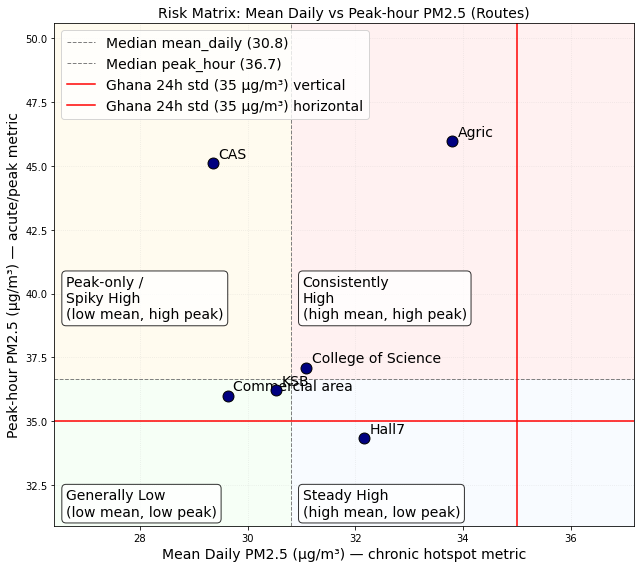

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# FILE LIST (edit filenames if needed)
# -----------------------------
routes = {
    "College of Science": {
        "daily": "College of science mean daily.csv",
        "hourly": "College of science mean hourly.csv"
    },
    "KSB": {
        "daily": "KSB mean daily.csv",
        "hourly": "KSB mean hourly.csv"
    },
    "Agric": {
        "daily": "Agric mean daily.csv",
        "hourly": "Agric mean hourly.csv"
    },
    "CAS": {
        "daily": "CAS mean daily.csv",
        "hourly": "CAS mean hourly.csv"
    },
    "Commercial area": {
        "daily": "Commercial area mean daily.csv",
        "hourly": "Commercial area mean hourly.csv"
    },
    "Hall7": {
        "daily": "Hall7 mean daily.csv",
        "hourly": "Hall7 mean hourly.csv"
    }
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

GHANA_PM25_24H = 35.0  # µg/m³ (reference policy threshold)

# -----------------------------
# helper to find pm column
# -----------------------------
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

# -----------------------------
# build summary (Mean_Daily, Peak_hour)
# -----------------------------
records = []
for name, fdict in routes.items():
    # daily
    df_d = pd.read_csv(fdict["daily"])
    pm_col_d = find_col(df_d, PM_CANDIDATES)
    if pm_col_d is None:
        raise ValueError(f"No PM column found in {fdict['daily']}")
    df_d[pm_col_d] = pd.to_numeric(df_d[pm_col_d], errors="coerce")
    df_d = df_d.dropna(subset=[pm_col_d])
    mean_daily = df_d[pm_col_d].mean()

    # hourly (sampled rush-hour mean-hour rows)
    df_h = pd.read_csv(fdict["hourly"])
    pm_col_h = find_col(df_h, PM_CANDIDATES)
    if pm_col_h is None:
        raise ValueError(f"No PM column found in {fdict['hourly']}")
    df_h[pm_col_h] = pd.to_numeric(df_h[pm_col_h], errors="coerce")
    df_h = df_h.dropna(subset=[pm_col_h]).reset_index(drop=True)

    peak_hour = df_h[pm_col_h].max() if len(df_h) > 0 else np.nan
    top2_mean = df_h[pm_col_h].nlargest(2).mean() if len(df_h) >= 2 else peak_hour
    hr_mean = df_h[pm_col_h].mean() if len(df_h) > 0 else np.nan
    hr_std = df_h[pm_col_h].std(ddof=0) if len(df_h) > 0 else np.nan
    cv = hr_std / hr_mean if (hr_mean and hr_mean > 0) else np.nan

    records.append({
        "Route": name,
        "Mean_Daily": round(mean_daily, 2),
        "Peak_hour": round(peak_hour, 2),
        "Top2_mean": round(top2_mean, 2),
        "Hourly_mean_sampled": round(hr_mean, 2),
        "Hourly_std": round(hr_std, 2),
        "Hourly_CV": round(cv, 2),
    })

summary_df = pd.DataFrame(records).set_index("Route")
print("\nSummary (Mean daily vs Peak metrics):")
print(summary_df)

# -----------------------------
# Risk matrix plot
# -----------------------------
x = summary_df["Mean_Daily"].values
y = summary_df["Peak_hour"].values
labels = summary_df.index.tolist()

# medians to split relative risk
x_median = np.nanmedian(x)
y_median = np.nanmedian(y)

fig, ax = plt.subplots(figsize=(9,8))

# background shading for quadrants (optional aesthetics)
x_min, x_max = min(x)*0.9, max(x)*1.1
y_min, y_max = min(y)*0.9, max(y)*1.1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Shade quadrants: top-right = Consistently High (high mean & high peak)
ax.fill_betweenx([y_median, y_max], x_median, x_max, color="#ffdddd", alpha=0.4)  # top-right
ax.fill_betweenx([y_median, y_max], x_min, x_median, color="#fff2cc", alpha=0.3)  # top-left (Peak-only / Spiky)
ax.fill_betweenx([y_min, y_median], x_min, x_median, color="#ddffdd", alpha=0.25) # bottom-left (Generally low)
ax.fill_betweenx([y_min, y_median], x_median, x_max, color="#e6f0ff", alpha=0.25) # bottom-right (High mean, low peak)

# scatter
sc = ax.scatter(x, y, s=120, c='navy', edgecolor='k', zorder=5)

# annotate each point
for xi, yi, lab in zip(x, y, labels):
    ax.text(xi + (x_max-x_min)*0.01, yi + (y_max-y_min)*0.01, lab, fontsize=14)

# plot reference lines
ax.axvline(x=x_median, color='grey', linestyle='--', linewidth=1, label=f"Median mean_daily ({x_median:.1f})")
ax.axhline(y=y_median, color='grey', linestyle='--', linewidth=1, label=f"Median peak_hour ({y_median:.1f})")

# Ghana standard lines (policy threshold)
ax.axvline(x=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) vertical")
ax.axhline(y=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) horizontal")

# quadrant labels
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(x_median + (x_max-x_min)*0.02, y_median + (y_max-y_min)*0.12, "Consistently\nHigh\n(high mean, high peak)", fontsize=14, bbox=props)
ax.text(x_min + (x_max-x_min)*0.02, y_median + (y_max-y_min)*0.12, "Peak-only /\nSpiky High\n(low mean, high peak)", fontsize=14, bbox=props)
ax.text(x_min + (x_max-x_min)*0.02, y_min + (y_max-y_min)*0.02, "Generally Low\n(low mean, low peak)", fontsize=14, bbox=props)
ax.text(x_median + (x_max-x_min)*0.02, y_min + (y_max-y_min)*0.02, "Steady High\n(high mean, low peak)", fontsize=14, bbox=props)

ax.set_xlabel("Mean Daily PM2.5 (µg/m³) — chronic hotspot metric", fontsize=14)
ax.set_ylabel("Peak-hour PM2.5 (µg/m³) — acute/peak metric",fontsize=14 )
ax.set_title("Risk Matrix: Mean Daily vs Peak-hour PM2.5 (Routes)", fontsize=14)

ax.grid(alpha=0.25, linestyle=':')
ax.legend(loc='upper left', fontsize=14)
plt.tight_layout()
# SAVE PLOT AS JPEG
plt.savefig("Risk_Matrix_MeanDaily_vs_Peak_PM25.jpeg", dpi=300, bbox_inches='tight')
plt.show()



Summary (Mean daily vs Peak metrics):
                    Mean_Daily  Peak_hour  Top2_mean  Hourly_mean_sampled  \
Route                                                                       
College of Science       31.09      37.10      33.50                29.93   
KSB                      30.53      36.22      34.40                31.07   
Agric                    33.79      45.98      45.08                36.70   
CAS                      29.35      45.12      39.40                33.35   
Commercial area          29.63      36.00      34.50                29.63   
Hall7                    32.16      34.34      33.61                32.17   

                    Hourly_std  Hourly_CV  
Route                                      
College of Science        3.84       0.13  
KSB                       3.46       0.11  
Agric                     8.99       0.25  
CAS                       6.26       0.19  
Commercial area           4.14       0.14  
Hall7                     1.57      

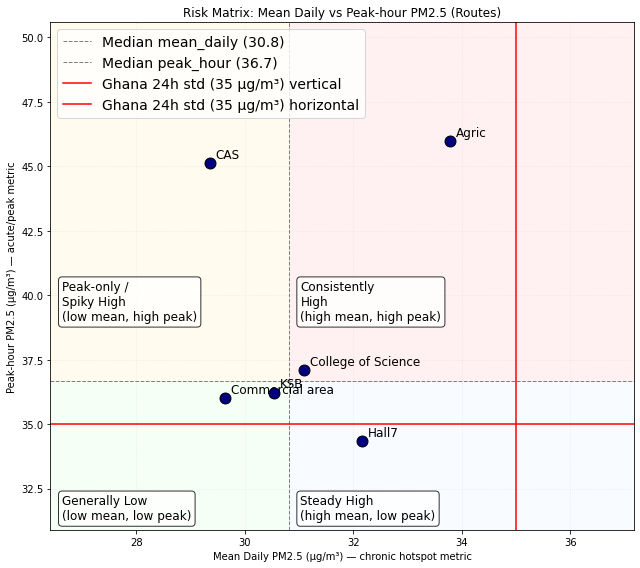

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# FILE LIST (edit filenames if needed)
# -----------------------------
routes = {
    "College of Science": {
        "daily": "College of science mean daily.csv",
        "hourly": "College of science mean hourly.csv"
    },
    "KSB": {
        "daily": "KSB mean daily.csv",
        "hourly": "KSB mean hourly.csv"
    },
    "Agric": {
        "daily": "Agric mean daily.csv",
        "hourly": "Agric mean hourly.csv"
    },
    "CAS": {
        "daily": "CAS mean daily.csv",
        "hourly": "CAS mean hourly.csv"
    },
    "Commercial area": {
        "daily": "Commercial area mean daily.csv",
        "hourly": "Commercial area mean hourly.csv"
    },
    "Hall7": {
        "daily": "Hall7 mean daily.csv",
        "hourly": "Hall7 mean hourly.csv"
    }
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

GHANA_PM25_24H = 35.0  # µg/m³ (reference policy threshold)

# -----------------------------
# helper to find pm column
# -----------------------------
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

# -----------------------------
# build summary (Mean_Daily, Peak_hour)
# -----------------------------
records = []
for name, fdict in routes.items():
    # daily
    df_d = pd.read_csv(fdict["daily"])
    pm_col_d = find_col(df_d, PM_CANDIDATES)
    if pm_col_d is None:
        raise ValueError(f"No PM column found in {fdict['daily']}")
    df_d[pm_col_d] = pd.to_numeric(df_d[pm_col_d], errors="coerce")
    df_d = df_d.dropna(subset=[pm_col_d])
    mean_daily = df_d[pm_col_d].mean()

    # hourly (sampled rush-hour mean-hour rows)
    df_h = pd.read_csv(fdict["hourly"])
    pm_col_h = find_col(df_h, PM_CANDIDATES)
    if pm_col_h is None:
        raise ValueError(f"No PM column found in {fdict['hourly']}")
    df_h[pm_col_h] = pd.to_numeric(df_h[pm_col_h], errors="coerce")
    df_h = df_h.dropna(subset=[pm_col_h]).reset_index(drop=True)

    peak_hour = df_h[pm_col_h].max() if len(df_h) > 0 else np.nan
    top2_mean = df_h[pm_col_h].nlargest(2).mean() if len(df_h) >= 2 else peak_hour
    hr_mean = df_h[pm_col_h].mean() if len(df_h) > 0 else np.nan
    hr_std = df_h[pm_col_h].std(ddof=0) if len(df_h) > 0 else np.nan
    cv = hr_std / hr_mean if (hr_mean and hr_mean > 0) else np.nan

    records.append({
        "Route": name,
        "Mean_Daily": round(mean_daily, 2),
        "Peak_hour": round(peak_hour, 2),
        "Top2_mean": round(top2_mean, 2),
        "Hourly_mean_sampled": round(hr_mean, 2),
        "Hourly_std": round(hr_std, 2),
        "Hourly_CV": round(cv, 2),
    })

summary_df = pd.DataFrame(records).set_index("Route")
print("\nSummary (Mean daily vs Peak metrics):")
print(summary_df)

# -----------------------------
# Risk matrix plot
# -----------------------------
x = summary_df["Mean_Daily"].values
y = summary_df["Peak_hour"].values
labels = summary_df.index.tolist()

# medians to split relative risk
x_median = np.nanmedian(x)
y_median = np.nanmedian(y)

fig, ax = plt.subplots(figsize=(9,8))

# background shading for quadrants (optional aesthetics)
x_min, x_max = min(x)*0.9, max(x)*1.1
y_min, y_max = min(y)*0.9, max(y)*1.1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Shade quadrants: top-right = Consistently High (high mean & high peak)
ax.fill_betweenx([y_median, y_max], x_median, x_max, color="#ffdddd", alpha=0.4)  # top-right
ax.fill_betweenx([y_median, y_max], x_min, x_median, color="#fff2cc", alpha=0.3)  # top-left (Peak-only / Spiky)
ax.fill_betweenx([y_min, y_median], x_min, x_median, color="#ddffdd", alpha=0.25) # bottom-left (Generally low)
ax.fill_betweenx([y_min, y_median], x_median, x_max, color="#e6f0ff", alpha=0.25) # bottom-right (High mean, low peak)

# scatter
sc = ax.scatter(x, y, s=120, c='navy', edgecolor='k', zorder=5)

# annotate each point
for xi, yi, lab in zip(x, y, labels):
    ax.text(xi + (x_max-x_min)*0.01, yi + (y_max-y_min)*0.01, lab, fontsize=12)

# plot reference lines
ax.axvline(x=x_median, color='grey', linestyle='--', linewidth=1, label=f"Median mean_daily ({x_median:.1f})")
ax.axhline(y=y_median, color='grey', linestyle='--', linewidth=1, label=f"Median peak_hour ({y_median:.1f})")

# Ghana standard lines (policy threshold)
ax.axvline(x=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) vertical")
ax.axhline(y=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) horizontal")

# quadrant labels
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(x_median + (x_max-x_min)*0.02, y_median + (y_max-y_min)*0.12, "Consistently\nHigh\n(high mean, high peak)", fontsize=12, bbox=props)
ax.text(x_min + (x_max-x_min)*0.02, y_median + (y_max-y_min)*0.12, "Peak-only /\nSpiky High\n(low mean, high peak)", fontsize=12, bbox=props)
ax.text(x_min + (x_max-x_min)*0.02, y_min + (y_max-y_min)*0.02, "Generally Low\n(low mean, low peak)", fontsize=12, bbox=props)
ax.text(x_median + (x_max-x_min)*0.02, y_min + (y_max-y_min)*0.02, "Steady High\n(high mean, low peak)", fontsize=12, bbox=props)

ax.set_xlabel("Mean Daily PM2.5 (µg/m³) — chronic hotspot metric")
ax.set_ylabel("Peak-hour PM2.5 (µg/m³) — acute/peak metric")
ax.set_title("Risk Matrix: Mean Daily vs Peak-hour PM2.5 (Routes)")

ax.grid(alpha=0.25, linestyle=':')
ax.legend(loc='upper left', fontsize=14)
plt.tight_layout()

# SAVE PLOT AS JPEG
plt.savefig("Risk_Matrix_MeanDaily_vs_Peak_PM25.jpeg", dpi=300, bbox_inches='tight')

plt.show()


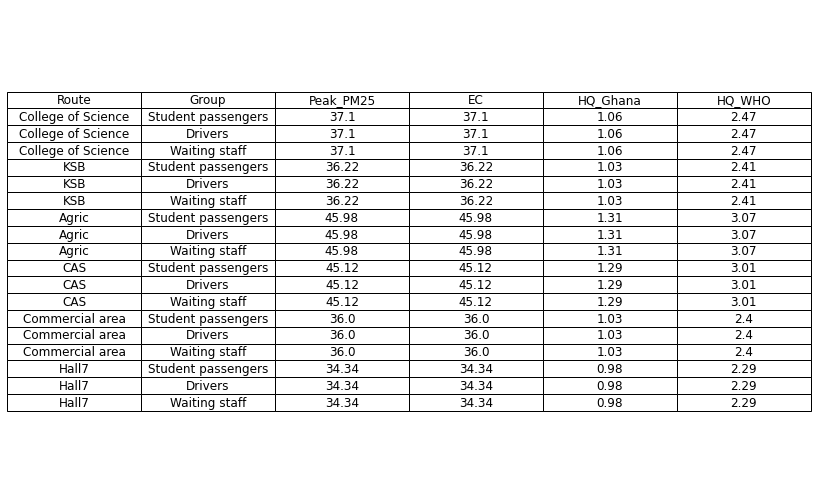

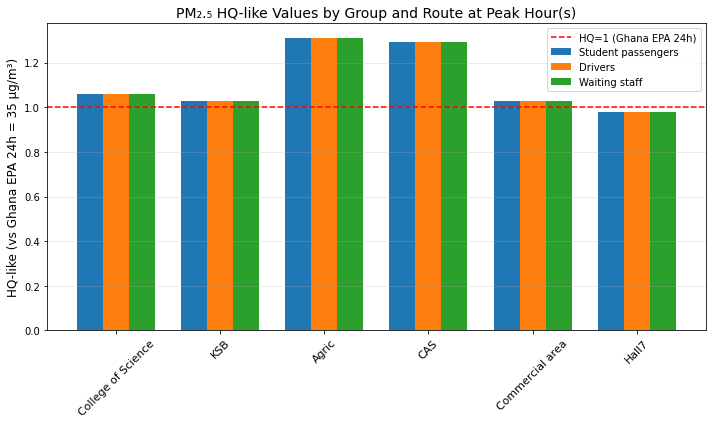

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# FILES & ROUTE NAMES
# -----------------------------
files = {
    "College of Science": "College of science mean hourly.csv",
    "KSB": "KSB mean hourly.csv",
    "Agric": "Agric mean hourly.csv",
    "CAS": "CAS mean hourly.csv",
    "Commercial area": "Commercial area mean hourly.csv",
    "Hall7": "Hall7 mean hourly.csv"
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

# Standards
GHANA_PM25_24H = 35.0
WHO_PM25_24H = 15.0

# Exposure parameters (per group)
groups = {
    "Student passengers": {"ET": 1.0, "EF": 21, "ED": 3/52},  # round trip 1 hour/day
    "Drivers": {"ET": 8.0, "EF": 21, "ED": 3/52},              # 8 hours/day
    "Waiting staff": {"ET": 4.0, "EF": 21, "ED": 3/52}         # 4 hours/day
}

# -----------------------------
# HELPER FUNCTION
# -----------------------------
def find_column(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower_cols = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower_cols:
            return lower_cols[c.lower()]
    return None

# -----------------------------
# MAIN ANALYSIS
# -----------------------------
results = []

for route, path in files.items():
    df = pd.read_csv(path)
    pm_col = find_column(df, PM_CANDIDATES)
    hour_col = find_column(df, HOUR_CANDIDATES)

    if hour_col is None:
        df["Hour"] = list(range(len(df)))
        hour_col = "Hour"

    df[pm_col] = pd.to_numeric(df[pm_col], errors="coerce")
    df = df.dropna(subset=[pm_col])

    # Identify PEAK hour
    peak_hours = df.nlargest(1, pm_col)
    CA_peak = peak_hours[pm_col].mean()

    # Compute EC and HQ for each group
    for group, params in groups.items():
        ET, EF, ED = params["ET"], params["EF"], params["ED"]
        AT = ET * EF * ED
        EC = (CA_peak * ET * EF * ED) / AT
        HQ_ghana = EC / GHANA_PM25_24H
        HQ_who = EC / WHO_PM25_24H

        results.append({
            "Route": route,
            "Group": group,
            "Peak_PM25": round(CA_peak, 2),
            "EC": round(EC, 2),
            "HQ_Ghana": round(HQ_ghana, 2),
            "HQ_WHO": round(HQ_who, 2)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# -----------------------------
# SAVE TABLE AS JPEG (wider, bigger fonts)
# -----------------------------
fig, ax = plt.subplots(figsize=(12, len(results_df) * 0.5))  # wider table
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)  # bigger font
table.scale(1.2, 1.4)   # increase cell size

plt.savefig("PM25_exposure_table.jpeg", dpi=300, bbox_inches="tight")

# -----------------------------
# PLOT HQ-Ghana at peaks & SAVE
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 6))
routes_list = list(files.keys())
x = np.arange(len(routes_list))
bar_width = 0.25

for i, group in enumerate(groups.keys()):
    hq_vals = results_df[results_df["Group"] == group]["HQ_Ghana"].values
    ax.bar(x + i*bar_width, hq_vals, width=bar_width, label=group)

ax.axhline(1, color="red", linestyle="--", linewidth=1.5, label="HQ=1 (Ghana EPA 24h)")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(routes_list, rotation=45, fontsize=11)
ax.set_ylabel("HQ-like (vs Ghana EPA 24h = 35 µg/m³)", fontsize=12)
ax.set_title("PM₂.₅ HQ-like Values by Group and Route at Peak Hour(s)", fontsize=14)
ax.legend(fontsize=10)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("PM25_HQ_plot.jpeg", dpi=300)
plt.show()



Summary (Mean daily vs Peak metrics):
                    Mean Daily PM2.5 (µg/m³)  Peak Hour PM2.5 (µg/m³)  \
Route                                                                   
College of Science                     31.09                    37.10   
KSB                                    30.53                    36.22   
Agric                                  33.79                    45.98   
CAS                                    29.35                    45.12   
Commercial area                        29.63                    36.00   
Hall7                                  32.16                    34.34   

                    Top 2-Hour Avg PM2.5 (µg/m³)  \
Route                                              
College of Science                         33.50   
KSB                                        34.40   
Agric                                      45.08   
CAS                                        39.40   
Commercial area                            34.50   
Hall7       

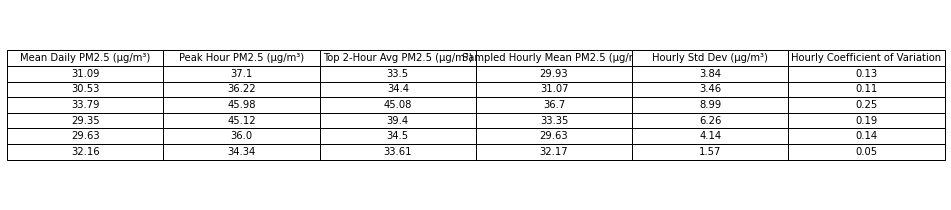

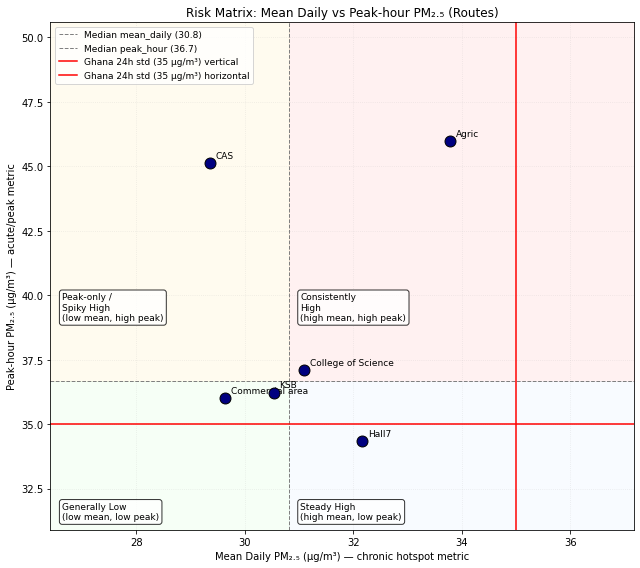

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# FILE LIST
# -----------------------------
routes = {
    "College of Science": {
        "daily": "College of science mean daily.csv",
        "hourly": "College of science mean hourly.csv"
    },
    "KSB": {
        "daily": "KSB mean daily.csv",
        "hourly": "KSB mean hourly.csv"
    },
    "Agric": {
        "daily": "Agric mean daily.csv",
        "hourly": "Agric mean hourly.csv"
    },
    "CAS": {
        "daily": "CAS mean daily.csv",
        "hourly": "CAS mean hourly.csv"
    },
    "Commercial area": {
        "daily": "Commercial area mean daily.csv",
        "hourly": "Commercial area mean hourly.csv"
    },
    "Hall7": {
        "daily": "Hall7 mean daily.csv",
        "hourly": "Hall7 mean hourly.csv"
    }
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]
HOUR_CANDIDATES = ["Hour", "hour", "HOUR", "HourOfDay", "hour_of_day", "Hour (0-23)"]

GHANA_PM25_24H = 35.0  # µg/m³ (reference policy threshold)

# -----------------------------
# helper to find pm column
# -----------------------------
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

# -----------------------------
# build summary (Mean_Daily, Peak_hour)
# -----------------------------
records = []
for name, fdict in routes.items():
    # daily
    df_d = pd.read_csv(fdict["daily"])
    pm_col_d = find_col(df_d, PM_CANDIDATES)
    if pm_col_d is None:
        raise ValueError(f"No PM column found in {fdict['daily']}")
    df_d[pm_col_d] = pd.to_numeric(df_d[pm_col_d], errors="coerce")
    df_d = df_d.dropna(subset=[pm_col_d])
    mean_daily = df_d[pm_col_d].mean()

    # hourly (sampled rush-hour mean-hour rows)
    df_h = pd.read_csv(fdict["hourly"])
    pm_col_h = find_col(df_h, PM_CANDIDATES)
    if pm_col_h is None:
        raise ValueError(f"No PM column found in {fdict['hourly']}")
    df_h[pm_col_h] = pd.to_numeric(df_h[pm_col_h], errors="coerce")
    df_h = df_h.dropna(subset=[pm_col_h]).reset_index(drop=True)

    peak_hour = df_h[pm_col_h].max() if len(df_h) > 0 else np.nan
    top2_mean = df_h[pm_col_h].nlargest(2).mean() if len(df_h) >= 2 else peak_hour
    hr_mean = df_h[pm_col_h].mean() if len(df_h) > 0 else np.nan
    hr_std = df_h[pm_col_h].std(ddof=0) if len(df_h) > 0 else np.nan
    cv = hr_std / hr_mean if (hr_mean and hr_mean > 0) else np.nan

    records.append({
        "Route": name,
        "Mean Daily PM2.5 (µg/m³)": round(mean_daily, 2),
        "Peak Hour PM2.5 (µg/m³)": round(peak_hour, 2),
        "Top 2-Hour Avg PM2.5 (µg/m³)": round(top2_mean, 2),
        "Sampled Hourly Mean PM2.5 (µg/m³)": round(hr_mean, 2),
        "Hourly Std Dev (µg/m³)": round(hr_std, 2),
        "Hourly Coefficient of Variation": round(cv, 2),
    })

summary_df = pd.DataFrame(records).set_index("Route")
print("\nSummary (Mean daily vs Peak metrics):")
print(summary_df)

# -----------------------------
# SAVE TABLE AS JPEG
# -----------------------------
fig, ax = plt.subplots(figsize=(14, len(summary_df) * 0.6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.savefig("PM25_mean_daily_vs_peak_table.jpeg", dpi=300, bbox_inches="tight")

# -----------------------------
# Risk matrix plot
# -----------------------------
x = summary_df["Mean Daily PM2.5 (µg/m³)"].values
y = summary_df["Peak Hour PM2.5 (µg/m³)"].values
labels = summary_df.index.tolist()

# medians to split relative risk
x_median = np.nanmedian(x)
y_median = np.nanmedian(y)

fig, ax = plt.subplots(figsize=(9, 8))

x_min, x_max = min(x) * 0.9, max(x) * 1.1
y_min, y_max = min(y) * 0.9, max(y) * 1.1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# quadrant shading
ax.fill_betweenx([y_median, y_max], x_median, x_max, color="#ffdddd", alpha=0.4)
ax.fill_betweenx([y_median, y_max], x_min, x_median, color="#fff2cc", alpha=0.3)
ax.fill_betweenx([y_min, y_median], x_min, x_median, color="#ddffdd", alpha=0.25)
ax.fill_betweenx([y_min, y_median], x_median, x_max, color="#e6f0ff", alpha=0.25)

# scatter plot
ax.scatter(x, y, s=120, c='navy', edgecolor='k', zorder=5)

# annotate points
for xi, yi, lab in zip(x, y, labels):
    ax.text(xi + (x_max - x_min) * 0.01, yi + (y_max - y_min) * 0.01, lab, fontsize=9)

# reference lines
ax.axvline(x=x_median, color='grey', linestyle='--', linewidth=1, label=f"Median mean_daily ({x_median:.1f})")
ax.axhline(y=y_median, color='grey', linestyle='--', linewidth=1, label=f"Median peak_hour ({y_median:.1f})")
ax.axvline(x=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) vertical")
ax.axhline(y=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) horizontal")

# quadrant labels
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(x_median + (x_max - x_min) * 0.02, y_median + (y_max - y_min) * 0.12,
        "Consistently\nHigh\n(high mean, high peak)", fontsize=9, bbox=props)
ax.text(x_min + (x_max - x_min) * 0.02, y_median + (y_max - y_min) * 0.12,
        "Peak-only /\nSpiky High\n(low mean, high peak)", fontsize=9, bbox=props)
ax.text(x_min + (x_max - x_min) * 0.02, y_min + (y_max - y_min) * 0.02,
        "Generally Low\n(low mean, low peak)", fontsize=9, bbox=props)
ax.text(x_median + (x_max - x_min) * 0.02, y_min + (y_max - y_min) * 0.02,
        "Steady High\n(high mean, low peak)", fontsize=9, bbox=props)

ax.set_xlabel("Mean Daily PM₂.₅ (µg/m³) — chronic hotspot metric")
ax.set_ylabel("Peak-hour PM₂.₅ (µg/m³) — acute/peak metric")
ax.set_title("Risk Matrix: Mean Daily vs Peak-hour PM₂.₅ (Routes)")

ax.grid(alpha=0.25, linestyle=':')
ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig("PM25_risk_matrix.jpeg", dpi=300)
plt.show()



Summary (Mean daily vs Peak metrics):
                    Mean Daily PM₂.₅ (µg/m³)  Peak Hour PM₂.₅ (µg/m³)  \
Route                                                                   
College of Science                     31.09                    37.10   
KSB                                    30.53                    36.22   
Agric                                  33.79                    45.98   
CAS                                    29.35                    45.12   
Commercial area                        29.63                    36.00   
Hall7                                  32.16                    34.34   

                    Top 2-Hour Avg PM₂.₅ (µg/m³)  \
Route                                              
College of Science                         33.50   
KSB                                        34.40   
Agric                                      45.08   
CAS                                        39.40   
Commercial area                            34.50   
Hall7       

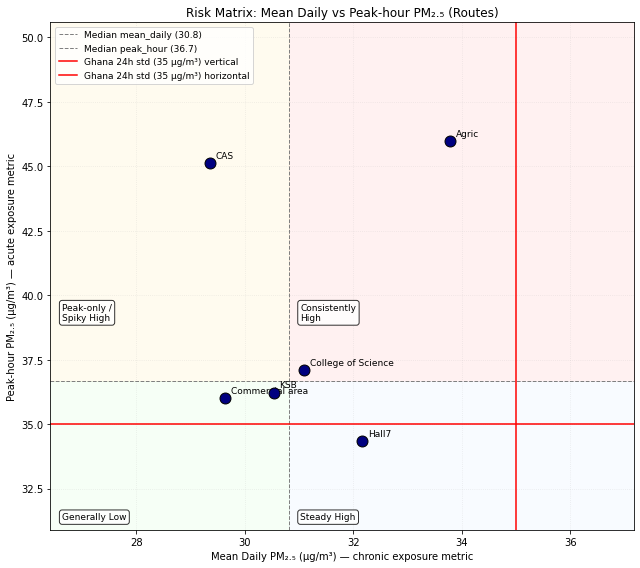

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# FILE LIST
# -----------------------------
routes = {
    "College of Science": {
        "daily": "College of science mean daily.csv",
        "hourly": "College of science mean hourly.csv"
    },
    "KSB": {
        "daily": "KSB mean daily.csv",
        "hourly": "KSB mean hourly.csv"
    },
    "Agric": {
        "daily": "Agric mean daily.csv",
        "hourly": "Agric mean hourly.csv"
    },
    "CAS": {
        "daily": "CAS mean daily.csv",
        "hourly": "CAS mean hourly.csv"
    },
    "Commercial area": {
        "daily": "Commercial area mean daily.csv",
        "hourly": "Commercial area mean hourly.csv"
    },
    "Hall7": {
        "daily": "Hall7 mean daily.csv",
        "hourly": "Hall7 mean hourly.csv"
    }
}

PM_CANDIDATES = ["PM2.5", "PM2_5", "PM25", "pm25", "PM_2_5", "PM2.5(ug/m3)", "PM2.5_ugm3"]

GHANA_PM25_24H = 35.0  # µg/m³

# -----------------------------
# helper to find pm column
# -----------------------------
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    lower = {col.lower(): col for col in df.columns}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

# -----------------------------
# build summary (Mean_Daily, Peak_hour)
# -----------------------------
records = []
for name, fdict in routes.items():
    # daily
    df_d = pd.read_csv(fdict["daily"])
    pm_col_d = find_col(df_d, PM_CANDIDATES)
    df_d[pm_col_d] = pd.to_numeric(df_d[pm_col_d], errors="coerce")
    df_d = df_d.dropna(subset=[pm_col_d])
    mean_daily = df_d[pm_col_d].mean()

    # hourly
    df_h = pd.read_csv(fdict["hourly"])
    pm_col_h = find_col(df_h, PM_CANDIDATES)
    df_h[pm_col_h] = pd.to_numeric(df_h[pm_col_h], errors="coerce")
    df_h = df_h.dropna(subset=[pm_col_h]).reset_index(drop=True)

    peak_hour = df_h[pm_col_h].max() if len(df_h) > 0 else np.nan
    top2_mean = df_h[pm_col_h].nlargest(2).mean() if len(df_h) >= 2 else peak_hour
    hr_mean = df_h[pm_col_h].mean()
    hr_std = df_h[pm_col_h].std(ddof=0)
    cv = hr_std / hr_mean if hr_mean > 0 else np.nan

    records.append({
        "Route": name,
        "Mean Daily PM₂.₅ (µg/m³)": round(mean_daily, 2),
        "Peak Hour PM₂.₅ (µg/m³)": round(peak_hour, 2),
        "Top 2-Hour Avg PM₂.₅ (µg/m³)": round(top2_mean, 2),
        "Sampled Hourly Mean PM₂.₅ (µg/m³)": round(hr_mean, 2),
        "Hourly Std Dev (µg/m³)": round(hr_std, 2),
        "Hourly Coefficient of Variation": round(cv, 2),
    })

summary_df = pd.DataFrame(records).set_index("Route")
print("\nSummary (Mean daily vs Peak metrics):")
print(summary_df)

# -----------------------------
# SAVE TABLE AS JPEG with bigger font & width
# -----------------------------
fig, ax = plt.subplots(figsize=(18, len(summary_df) * 1.2))  # Wider and taller table
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values,
                 colLabels=summary_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(14)  # Increased font size
table.scale(1.8, 1.8)   # Increased cell width and height

plt.savefig("PM25_mean_daily_vs_peak_table.jpeg", dpi=300, bbox_inches="tight")
plt.close()

# -----------------------------
# Risk matrix plot
# -----------------------------
x = summary_df["Mean Daily PM₂.₅ (µg/m³)"].values
y = summary_df["Peak Hour PM₂.₅ (µg/m³)"].values
labels = summary_df.index.tolist()

x_median = np.nanmedian(x)
y_median = np.nanmedian(y)

fig, ax = plt.subplots(figsize=(9, 8))
x_min, x_max = min(x) * 0.9, max(x) * 1.1
y_min, y_max = min(y) * 0.9, max(y) * 1.1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# quadrant shading
ax.fill_betweenx([y_median, y_max], x_median, x_max, color="#ffdddd", alpha=0.4)
ax.fill_betweenx([y_median, y_max], x_min, x_median, color="#fff2cc", alpha=0.3)
ax.fill_betweenx([y_min, y_median], x_min, x_median, color="#ddffdd", alpha=0.25)
ax.fill_betweenx([y_min, y_median], x_median, x_max, color="#e6f0ff", alpha=0.25)

# scatter
ax.scatter(x, y, s=120, c='navy', edgecolor='k', zorder=5)

# annotate points
for xi, yi, lab in zip(x, y, labels):
    ax.text(xi + (x_max - x_min) * 0.01, yi + (y_max - y_min) * 0.01, lab, fontsize=9)

# reference lines
ax.axvline(x=x_median, color='grey', linestyle='--', linewidth=1, label=f"Median mean_daily ({x_median:.1f})")
ax.axhline(y=y_median, color='grey', linestyle='--', linewidth=1, label=f"Median peak_hour ({y_median:.1f})")
ax.axvline(x=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) vertical")
ax.axhline(y=GHANA_PM25_24H, color='red', linestyle='-', linewidth=1.5, label=f"Ghana 24h std (35 µg/m³) horizontal")

# quadrant labels
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(x_median + (x_max - x_min) * 0.02, y_median + (y_max - y_min) * 0.12, "Consistently\nHigh", fontsize=9, bbox=props)
ax.text(x_min + (x_max - x_min) * 0.02, y_median + (y_max - y_min) * 0.12, "Peak-only /\nSpiky High", fontsize=9, bbox=props)
ax.text(x_min + (x_max - x_min) * 0.02, y_min + (y_max - y_min) * 0.02, "Generally Low", fontsize=9, bbox=props)
ax.text(x_median + (x_max - x_min) * 0.02, y_min + (y_max - y_min) * 0.02, "Steady High", fontsize=9, bbox=props)

ax.set_xlabel("Mean Daily PM₂.₅ (µg/m³) — chronic exposure metric")
ax.set_ylabel("Peak-hour PM₂.₅ (µg/m³) — acute exposure metric")
ax.set_title("Risk Matrix: Mean Daily vs Peak-hour PM₂.₅ (Routes)")

ax.grid(alpha=0.25, linestyle=':')
ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig("PM25_risk_matrix.jpeg", dpi=300)
plt.show()


In [3]:
import pandas as pd
df = pd.read_csv("College of science mean hourly.csv")
print(df.columns)


Index(['Interval', 'PM2.5', 'Temperature', 'R_Humidity'], dtype='object')


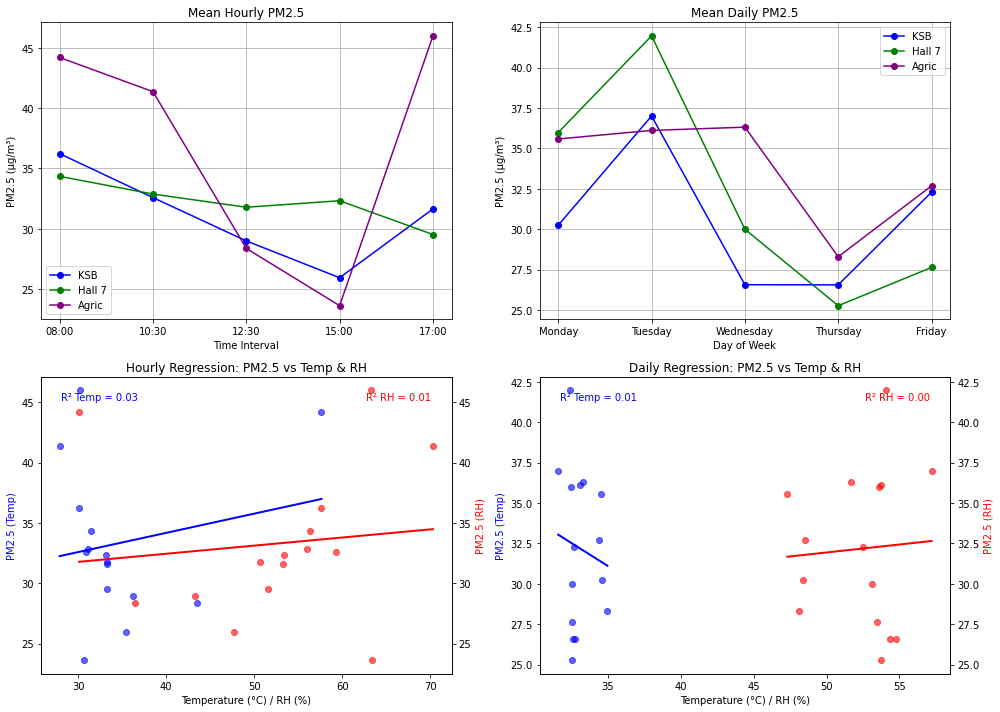

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -------------------------
# File paths
# -------------------------
hourly_files = {
    "KSB mean hourly.csv": "KSB",
    "Hall7 mean hourly.csv": "Hall 7",
    "Agric mean hourly.csv": "Agric"
}

daily_files = {
    "KSB mean daily.csv": "KSB",
    "Hall7 mean daily.csv": "Hall 7",
    "Agric mean daily.csv": "Agric"
}

colors = {
    "KSB": "blue",
    "Hall 7": "green",
    "Agric": "purple"
}

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ---------- ROW 1 COL 1: Mean Hourly ----------
ax = axes[0, 0]
for file, label in hourly_files.items():
    df = pd.read_csv(file)
    df['Start'] = pd.to_datetime(df['Interval'].str.split('–|-').str[0].str.strip(), format='%H:%M', errors='coerce')
    df = df.dropna(subset=['Start']).sort_values('Start')
    ax.plot(df['Start'].dt.strftime('%H:%M'), df['PM2.5'], marker='o', label=label, color=colors[label])
ax.set_title("Mean Hourly PM2.5")
ax.set_xlabel("Time Interval")
ax.set_ylabel("PM2.5 (µg/m³)")
ax.legend()
ax.grid(True)

# ---------- ROW 1 COL 2: Mean Daily ----------
ax = axes[0, 1]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for file, label in daily_files.items():
    df = pd.read_csv(file)
    df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)
    df = df.sort_values('Day')
    ax.plot(df['Day'], df['PM2.5'], marker='o', label=label, color=colors[label])
ax.set_title("Mean Daily PM2.5")
ax.set_xlabel("Day of Week")
ax.set_ylabel("PM2.5 (µg/m³)")
ax.legend()
ax.grid(True)

# ---------- ROW 2 COL 1: Hourly Regression ----------
hourly_combined = pd.concat([pd.read_csv(f) for f in hourly_files.keys()], ignore_index=True)
ax1 = axes[1, 0]
ax2 = ax1.twinx()

# Temp regression
x_temp = hourly_combined["Temperature"].values.reshape(-1, 1)
y_pm = hourly_combined["PM2.5"].values
model_temp = LinearRegression().fit(x_temp, y_pm)
x_range_temp = np.linspace(x_temp.min(), x_temp.max(), 100).reshape(-1, 1)
y_pred_temp = model_temp.predict(x_range_temp)
r2_temp = model_temp.score(x_temp, y_pm)

# RH regression
x_rh = hourly_combined["R_Humidity"].values.reshape(-1, 1)
model_rh = LinearRegression().fit(x_rh, y_pm)
x_range_rh = np.linspace(x_rh.min(), x_rh.max(), 100).reshape(-1, 1)
y_pred_rh = model_rh.predict(x_range_rh)
r2_rh = model_rh.score(x_rh, y_pm)

# Scatter + regression lines
ax1.scatter(hourly_combined["Temperature"], y_pm, color="blue", alpha=0.6)
ax1.plot(x_range_temp, y_pred_temp, color="blue", lw=2)
ax2.scatter(hourly_combined["R_Humidity"], y_pm, color="red", alpha=0.6)
ax2.plot(x_range_rh, y_pred_rh, color="red", lw=2)

# R² text labels
ax1.text(0.05, 0.95, f"R² Temp = {r2_temp:.2f}", transform=ax1.transAxes,
         color="blue", fontsize=10, verticalalignment="top")
ax2.text(0.95, 0.95, f"R² RH = {r2_rh:.2f}", transform=ax2.transAxes,
         color="red", fontsize=10, verticalalignment="top", horizontalalignment="right")

ax1.set_xlabel("Temperature (°C) / RH (%)")
ax1.set_ylabel("PM2.5 (Temp)", color="blue")
ax2.set_ylabel("PM2.5 (RH)", color="red")
ax1.set_title("Hourly Regression: PM2.5 vs Temp & RH")

# ---------- ROW 2 COL 2: Daily Regression ----------
daily_combined = pd.concat([pd.read_csv(f) for f in daily_files.keys()], ignore_index=True)
ax3 = axes[1, 1]
ax4 = ax3.twinx()

# Temp regression
x_temp = daily_combined["Temperature"].values.reshape(-1, 1)
y_pm = daily_combined["PM2.5"].values
model_temp = LinearRegression().fit(x_temp, y_pm)
x_range_temp = np.linspace(x_temp.min(), x_temp.max(), 100).reshape(-1, 1)
y_pred_temp = model_temp.predict(x_range_temp)
r2_temp = model_temp.score(x_temp, y_pm)

# RH regression
x_rh = daily_combined["R_Humidity"].values.reshape(-1, 1)
model_rh = LinearRegression().fit(x_rh, y_pm)
x_range_rh = np.linspace(x_rh.min(), x_rh.max(), 100).reshape(-1, 1)
y_pred_rh = model_rh.predict(x_range_rh)
r2_rh = model_rh.score(x_rh, y_pm)

# Scatter + regression lines
ax3.scatter(daily_combined["Temperature"], y_pm, color="blue", alpha=0.6)
ax3.plot(x_range_temp, y_pred_temp, color="blue", lw=2)
ax4.scatter(daily_combined["R_Humidity"], y_pm, color="red", alpha=0.6)
ax4.plot(x_range_rh, y_pred_rh, color="red", lw=2)

# R² text labels
ax3.text(0.05, 0.95, f"R² Temp = {r2_temp:.2f}", transform=ax3.transAxes,
         color="blue", fontsize=10, verticalalignment="top")
ax4.text(0.95, 0.95, f"R² RH = {r2_rh:.2f}", transform=ax4.transAxes,
         color="red", fontsize=10, verticalalignment="top", horizontalalignment="right")

ax3.set_xlabel("Temperature (°C) / RH (%)")
ax3.set_ylabel("PM2.5 (Temp)", color="blue")
ax4.set_ylabel("PM2.5 (RH)", color="red")
ax3.set_title("Daily Regression: PM2.5 vs Temp & RH")

plt.tight_layout()
plt.savefig("KSB_Hall7_Agric_PM2.5_analysis.jpeg", dpi=300)
plt.show()


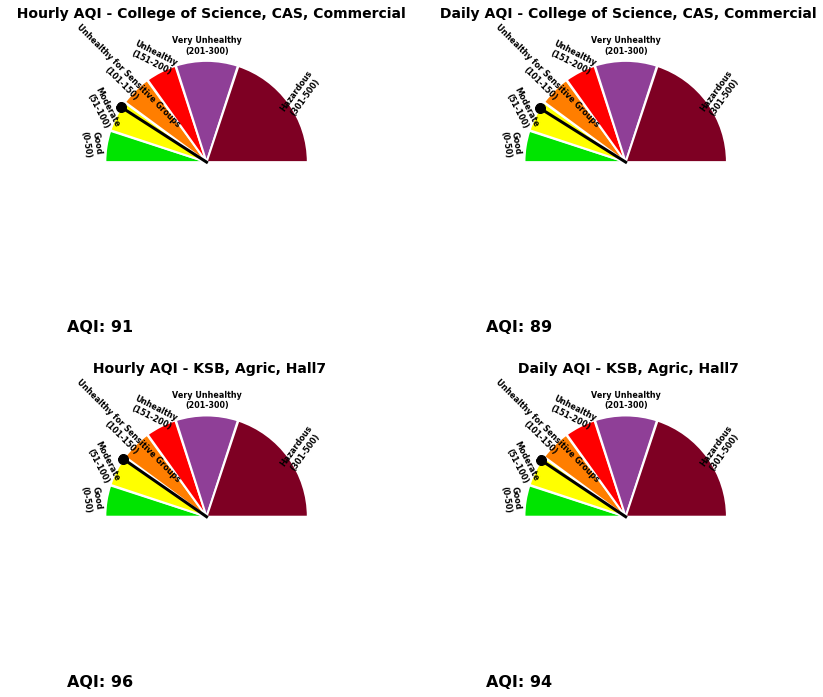

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# AQI categories and color bands (EPA USA standard)
aqi_levels = [
    (0, 50, 'Good', '#00E400'),
    (51, 100, 'Moderate', '#FFFF00'),
    (101, 150, 'Unhealthy for Sensitive Groups', '#FF7E00'),
    (151, 200, 'Unhealthy', '#FF0000'),
    (201, 300, 'Very Unhealthy', '#8F3F97'),
    (301, 500, 'Hazardous', '#7E0023')
]

# PM2.5 to AQI converter (US EPA)
def calculate_pm25_aqi(pm):
    for Clow, Chigh, Ilow, Ihigh in [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500),
    ]:
        if Clow <= pm <= Chigh:
            return round(((Ihigh - Ilow) / (Chigh - Clow)) * (pm - Clow) + Ilow)
    return None

# AQI gauge drawing for subplot
def draw_aqi_gauge(ax, aqi_value, title):
    ax.set_theta_offset(np.pi)
    ax.set_theta_direction(-1)
    ax.set_axis_off()

    def aqi_to_angle(aqi):
        return np.deg2rad(180 * aqi / 500)

    # Draw colored segments
    for start, end, label, color in aqi_levels:
        theta_start = aqi_to_angle(start)
        theta_end = aqi_to_angle(end)
        theta_mid = (theta_start + theta_end) / 2
        ax.bar(theta_mid, 1, width=(theta_end - theta_start), bottom=0,
               color=color, edgecolor='white', linewidth=2)
        ax.text(theta_mid, 1.15, f"{label}\n({start}-{end})",
                color='black', ha='center', va='center',
                fontsize=8, fontweight='bold',
                rotation=np.rad2deg(theta_mid) - 90,
                rotation_mode='anchor')

    # Needle
    aqi_angle = aqi_to_angle(aqi_value)
    ax.plot([aqi_angle, aqi_angle], [0, 1], color='black', linewidth=3)
    ax.plot(aqi_angle, 1, 'o', color='black', markersize=10)

    # Bold title
    ax.set_title(title, fontsize=14, fontweight='bold', y=1.15)

    # AQI value
    ax.text(0, -0.3, f"AQI: {aqi_value:.0f}", fontsize=16,
            fontweight='bold', ha='center', transform=ax.transAxes)

# Function to calculate mean AQI from CSV list
def mean_aqi_from_files(files):
    dfs = [pd.read_csv(f) for f in files]
    pm25 = pd.concat([df[['PM2.5']] for df in dfs], ignore_index=True).dropna()
    pm25['AQI'] = pm25['PM2.5'].apply(calculate_pm25_aqi)
    return round(pm25['AQI'].mean(), 2)

# File groups
hourly_group1 = [
    "College of science mean hourly.csv",
    "CAS mean hourly.csv",
    "Commercial area mean hourly.csv"
]
daily_group1 = [
    "College of science mean daily.csv",
    "CAS mean daily.csv",
    "Commercial area mean daily.csv"
]
hourly_group2 = [
    "KSB mean hourly.csv",
    "Agric mean hourly.csv",
    "Hall7 mean hourly.csv"
]
daily_group2 = [
    "KSB mean daily.csv",
    "Agric mean daily.csv",
    "Hall7 mean daily.csv"
]

# Compute mean AQIs
mean_hourly_aqi_g1 = mean_aqi_from_files(hourly_group1)
mean_daily_aqi_g1 = mean_aqi_from_files(daily_group1)
mean_hourly_aqi_g2 = mean_aqi_from_files(hourly_group2)
mean_daily_aqi_g2 = mean_aqi_from_files(daily_group2)

# Plot 2x2 panel
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': 'polar'})

draw_aqi_gauge(axs[0, 0], mean_hourly_aqi_g1,
               "  Hourly AQI - College of Science, CAS, Commercial")
draw_aqi_gauge(axs[0, 1], mean_daily_aqi_g1,
               " Daily AQI - College of Science, CAS, Commercial")
draw_aqi_gauge(axs[1, 0], mean_hourly_aqi_g2,
               " Hourly AQI - KSB, Agric, Hall7")
draw_aqi_gauge(axs[1, 1], mean_daily_aqi_g2,
               " Daily AQI - KSB, Agric, Hall7")

plt.tight_layout()
plt.savefig("AQI_panel_plot.jpeg", dpi=300, format='jpeg')
plt.show()



In [46]:
import xarray as xr

ds = xr.open_dataset("wind data.nc")
print(ds)


<xarray.Dataset> Size: 4kB
Dimensions:     (valid_time: 100, latitude: 2, longitude: 1)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 800B 2025-07-14T08:00:00 ... 2025...
  * latitude    (latitude) float64 16B 6.75 6.5
  * longitude   (longitude) float64 8B -1.7
    expver      (valid_time) <U4 2kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 800B ...
    v10         (valid_time, latitude, longitude) float32 800B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-02T17:21 GRIB to CDM+CF via cfgrib-0.9.1...


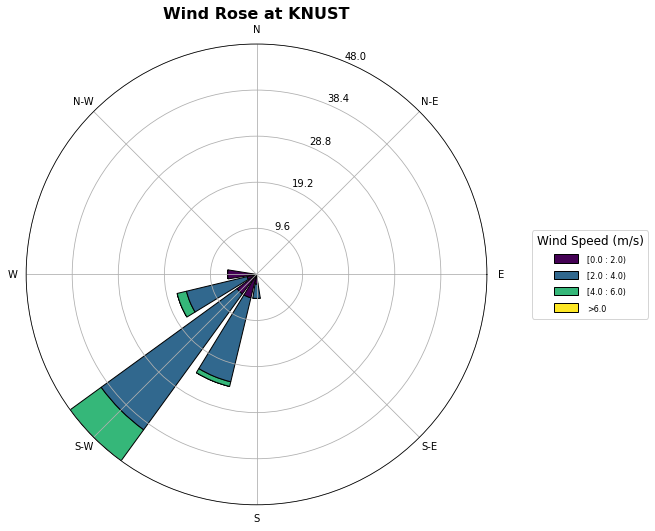

In [47]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load dataset
ds = xr.open_dataset("wind data.nc")

# Coordinates for KNUST (approx)
lat_knust = 6.6745
lon_knust = -1.5715

# Select nearest grid point
u10_knust = ds['u10'].sel(latitude=lat_knust, longitude=lon_knust, method='nearest')
v10_knust = ds['v10'].sel(latitude=lat_knust, longitude=lon_knust, method='nearest')

# Calculate wind speed and direction
wind_speed = np.sqrt(u10_knust**2 + v10_knust**2)
wind_dir = (np.arctan2(-u10_knust, -v10_knust) * 180 / np.pi) % 360

# Create DataFrame with correct time coordinate
df = pd.DataFrame({
    'speed': wind_speed.values,
    'direction': wind_dir.values
}, index=u10_knust['valid_time'].values)

# Plot wind rose
fig = plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['direction'], df['speed'],
       normed=True,
       opening=0.8,
       edgecolor='black',
       bins=np.arange(0, np.ceil(df['speed'].max()) + 2, 2),  # bins of 2 m/s
       cmap=plt.cm.viridis)

# Set title and labels
ax.set_title("Wind Rose at KNUST", fontsize=16, fontweight='bold')
ax.set_legend(title="Wind Speed (m/s)", loc='center left', bbox_to_anchor=(1.1, 0.5),
              fontsize=12, title_fontsize=12)

plt.show()


In [48]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load dataset
ds = xr.open_dataset("wind data.nc")

# Coordinates for KNUST (approx)
lat_knust = 6.6745
lon_knust = -1.5715

# Select nearest grid point
u10_knust = ds['u10'].sel(latitude=lat_knust, longitude=lon_knust, method='nearest')
v10_knust = ds['v10'].sel(latitude=lat_knust, longitude=lon_knust, method='nearest')

# Calculate wind speed and direction
wind_speed = np.sqrt(u10_knust**2 + v10_knust**2)
wind_dir = (np.arctan2(-u10_knust, -v10_knust) * 180 / np.pi) % 360

# Create DataFrame with correct time coordinate
df = pd.DataFrame({
    'speed': wind_speed.values,
    'direction': wind_dir.values
}, index=u10_knust['valid_time'].values)

# Plot wind rose
fig = plt.figure(figsize=(10, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['direction'], df['speed'],
       normed=True,
       opening=0.8,
       edgecolor='black',
       bins=np.arange(0, np.ceil(df['speed'].max()) + 2, 2),  # bins of 2 m/s
       cmap=plt.cm.viridis)

# Title and legend
date_range = f"{df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}"
ax.set_title(f"Wind Rose at KNUST\n({date_range})", fontsize=16, fontweight='bold')
ax.set_legend(title="Wind Speed (m/s)", loc='center left', bbox_to_anchor=(1.1, 0.5),
              fontsize=12, title_fontsize=12)

# Save as JPEG
plt.savefig("wind_rose_knust.jpeg", dpi=300, bbox_inches='tight')
plt.close()

print("✅ Wind rose saved as wind_rose_knust.jpeg")


✅ Wind rose saved as wind_rose_knust.jpeg


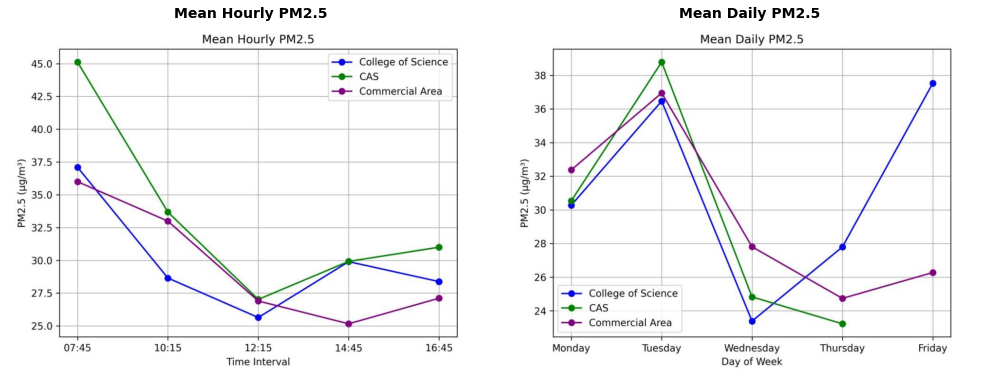

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load both images
wind_rose_img = mpimg.imread("Mean Hourly PM2.5 science.jpeg")
pm25_img = mpimg.imread("Mean Daily PM2.5 science.jpeg")

# Create panel plot (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Wind rose
axes[0].imshow(wind_rose_img)
axes[0].axis("off")
axes[0].set_title("Mean Hourly PM2.5", fontsize=14, fontweight='bold')

# PM2.5 Plot
axes[1].imshow(pm25_img)
axes[1].axis("off")
axes[1].set_title("Mean Daily PM2.5", fontsize=14, fontweight='bold')

# Save the panel plot
plt.tight_layout()
plt.savefig("COS", dpi=300)
plt.show()


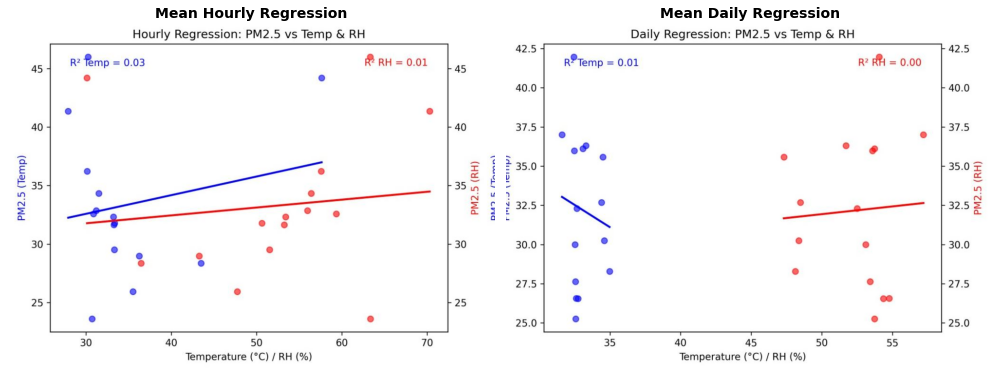

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load both images
wind_rose_img = mpimg.imread("Hourly Regression KSB.jpeg")
pm25_img = mpimg.imread("Daily Regression KSB.jpeg")

# Create panel plot (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Mean Hourly PM2.5
axes[0].imshow(wind_rose_img)
axes[0].axis("off")
axes[0].set_title("Mean Hourly Regression", fontsize=14, fontweight='bold')

# Mean Daily PM2.5
axes[1].imshow(pm25_img)
axes[1].axis("off")
axes[1].set_title("Mean Daily Regression", fontsize=14, fontweight='bold')

# Save the panel plot as JPEG
plt.tight_layout()
plt.savefig("CORR.jpeg", dpi=300, format="jpeg")

plt.show()


/home/jephthah/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


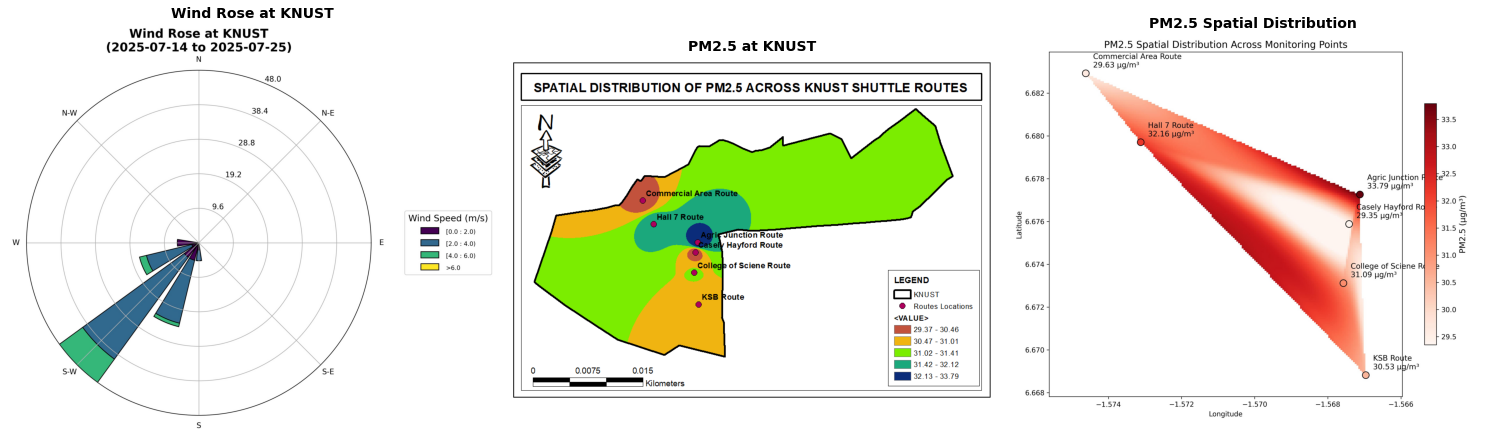

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
wind_rose_img = mpimg.imread("wind_rose_knust.jpeg")
pm25_img = mpimg.imread("AFEDI.tif")
spatial_img = mpimg.imread("PM25_Spatial_Distribution_Map.jpeg")

# Create 3-panel plot
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Wind rose
axes[0].imshow(wind_rose_img)
axes[0].axis("off")
axes[0].set_title("Wind Rose at KNUST", fontsize=14, fontweight='bold')

# PM2.5
axes[1].imshow(pm25_img)
axes[1].axis("off")
axes[1].set_title("PM2.5 at KNUST", fontsize=14, fontweight='bold')

# Spatial distribution
axes[2].imshow(spatial_img)
axes[2].axis("off")
axes[2].set_title("PM2.5 Spatial Distribution", fontsize=14, fontweight='bold')

# Save panel plot
plt.tight_layout()
plt.savefig("knust_3panel_plot.jpeg", dpi=300)
plt.show()


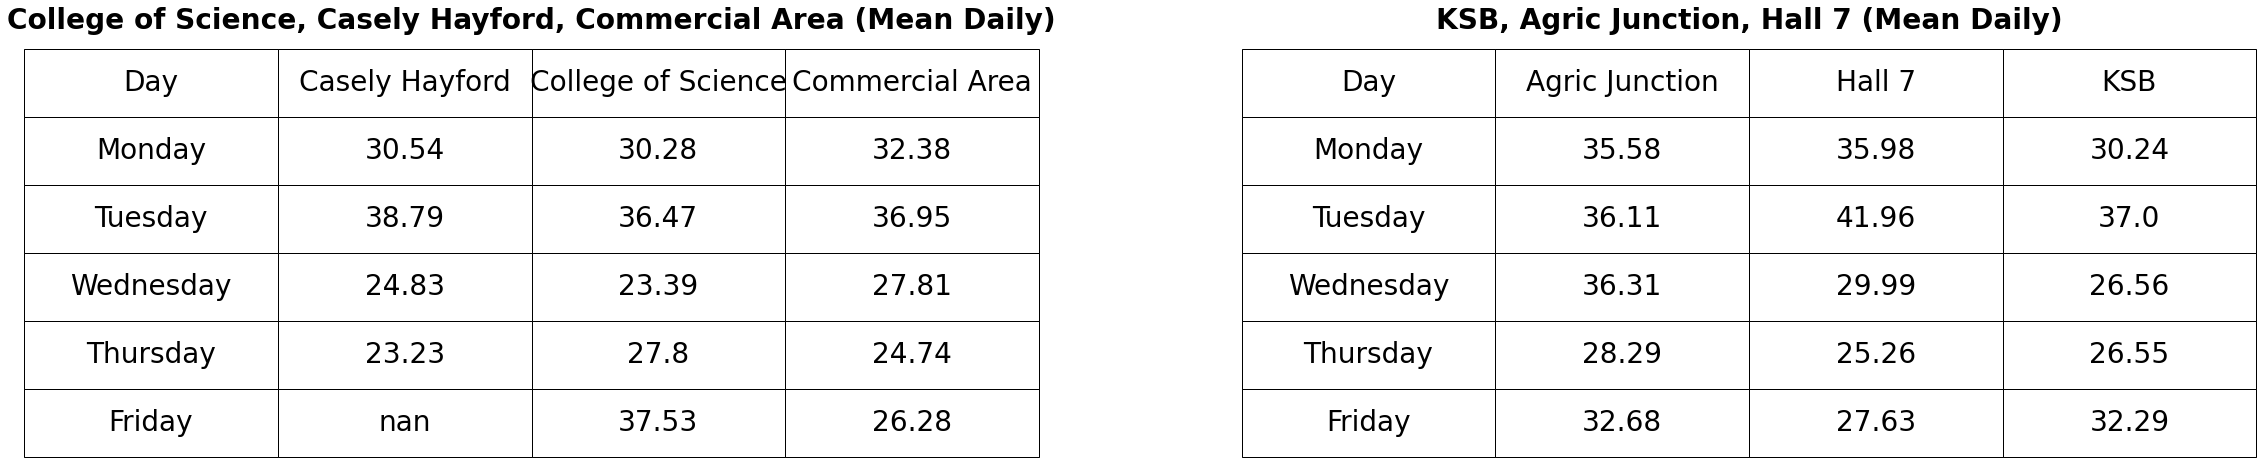

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
ksb_daily = pd.read_csv("KSB mean daily.csv")
agric_daily = pd.read_csv("Agric mean daily.csv")
hall7_daily = pd.read_csv("Hall7 mean daily.csv")

cos_daily = pd.read_csv("College of science mean daily.csv")
cas_daily = pd.read_csv("CAS mean daily.csv")
com_daily = pd.read_csv("Commercial area mean daily.csv")

# Add Location column
ksb_daily['Location'] = 'KSB'
agric_daily['Location'] = 'Agric Junction'
hall7_daily['Location'] = 'Hall 7'

cos_daily['Location'] = 'College of Science'
cas_daily['Location'] = 'Casely Hayford'
com_daily['Location'] = 'Commercial Area'

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert Day to ordered categorical and sort
for df in [ksb_daily, agric_daily, hall7_daily, cos_daily, cas_daily, com_daily]:
    df['Day'] = pd.Categorical(df['Day'], categories=weekday_order, ordered=True)
    df.sort_values('Day', inplace=True)

# Combine group 1 and group 2
group1_daily_df = pd.concat([cos_daily, cas_daily, com_daily], ignore_index=True)
group2_daily_df = pd.concat([ksb_daily, agric_daily, hall7_daily], ignore_index=True)

# Pivot so locations are columns, days are rows
group1_daily_pivot = group1_daily_df.pivot(index='Day', columns='Location', values='PM2.5').reset_index()
group2_daily_pivot = group2_daily_df.pivot(index='Day', columns='Location', values='PM2.5').reset_index()

# Plot panel tables
fig, axes = plt.subplots(
    1, 2,
    figsize=(40, max(len(group1_daily_pivot), len(group2_daily_pivot)) * 1.5)
)

axes[0].axis('off')
table1 = axes[0].table(
    cellText=group1_daily_pivot.values,
    colLabels=group1_daily_pivot.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)
table1.auto_set_font_size(False)
table1.set_fontsize(28)
table1.scale(4, 4)
axes[0].set_title(
    "College of Science, Casely Hayford, Commercial Area (Mean Daily)",
    fontsize=28, weight='bold', pad=20
)

axes[1].axis('off')
table2 = axes[1].table(
    cellText=group2_daily_pivot.values,
    colLabels=group2_daily_pivot.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)
table2.auto_set_font_size(False)
table2.set_fontsize(28)
table2.scale(4, 4)
axes[1].set_title(
    "KSB, Agric Junction, Hall 7 (Mean Daily)",
    fontsize=28, weight='bold', pad=20
)

plt.subplots_adjust(wspace=0.2)
plt.savefig("Daily_PM25_Observation_Panel_Tables_FullWide.jpeg", dpi=300, bbox_inches='tight')
plt.show()


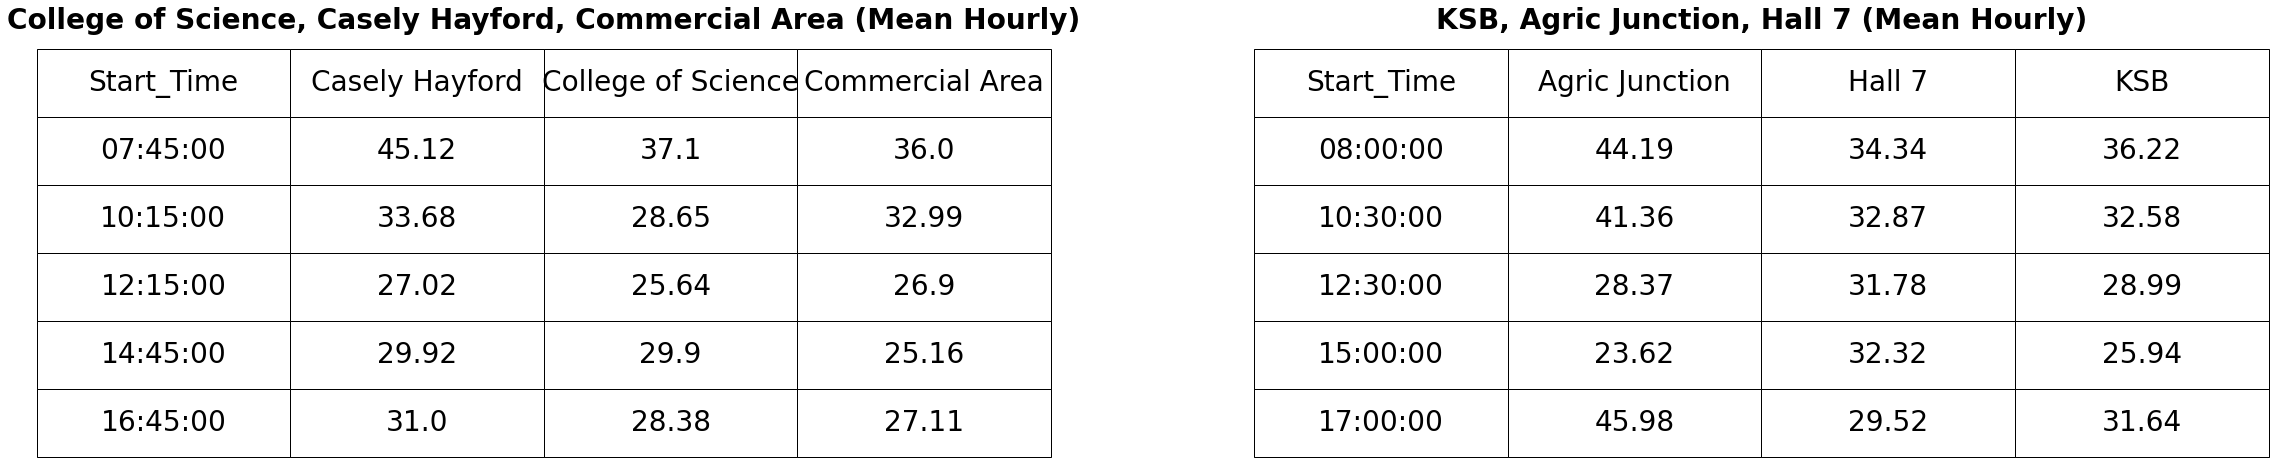

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs as before
# ...

# Add Location columns as before
# ...

# Extract start time from Interval string and convert to datetime.time
for df in [ksb_hourly, agric_hourly, hall7_hourly, cos_hourly, cas_hourly, com_hourly]:
    df['Start_Time'] = df['Interval'].str.split('–|-').str[0].str.strip()
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%H:%M').dt.time

# Combine groups using 'Start_Time' as the time index
group1_hourly_df = pd.concat([cos_hourly, cas_hourly, com_hourly], ignore_index=True)
group2_hourly_df = pd.concat([ksb_hourly, agric_hourly, hall7_hourly], ignore_index=True)

group1_hourly_pivot = group1_hourly_df.pivot(index='Start_Time', columns='Location', values='PM2.5').reset_index()
group2_hourly_pivot = group2_hourly_df.pivot(index='Start_Time', columns='Location', values='PM2.5').reset_index()

# Plot as before but index is now Start_Time
fig, axes = plt.subplots(
    1, 2,
    figsize=(40, max(len(group1_hourly_pivot), len(group2_hourly_pivot)) * 1.5)
)

axes[0].axis('off')
table1 = axes[0].table(
    cellText=group1_hourly_pivot.values,
    colLabels=group1_hourly_pivot.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)
table1.auto_set_font_size(False)
table1.set_fontsize(28)
table1.scale(4, 4)
axes[0].set_title(
    "College of Science, Casely Hayford, Commercial Area (Mean Hourly)",
    fontsize=28, weight='bold', pad=20
)

axes[1].axis('off')
table2 = axes[1].table(
    cellText=group2_hourly_pivot.values,
    colLabels=group2_hourly_pivot.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)
table2.auto_set_font_size(False)
table2.set_fontsize(28)
table2.scale(4, 4)
axes[1].set_title(
    "KSB, Agric Junction, Hall 7 (Mean Hourly)",
    fontsize=28, weight='bold', pad=20
)

plt.subplots_adjust(wspace=0.2)
plt.savefig("Hourly_PM25_Observation_Panel_Tables_FullWide.jpeg", dpi=300, bbox_inches='tight')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# ----------------------------------------
# EDIT THESE IF YOUR FILENAMES DIFFER
# You can provide a single filename (str) or multiple fallbacks (list[str])
# ----------------------------------------
daily_files = {
    "College of Science": ["College of science mean daily.csv", "College_of_science_mean_daily.csv"],
    "KSB": ["KSB mean daily.csv", "KSB_mean_daily.csv"],
    "CAS": ["CAS mean daily.csv", "CAS_mean_daily.csv"],
    "Commercial Area": ["Commercial area mean daily.csv", "Commercial_area_mean_daily.csv"],
    "Agric": ["Agric mean daily.csv", "Agric_mean_daily.csv"],
    "Hall7": ["Hall7 mean daily.csv", "Hall 7 mean daily.csv", "Hall_7_mean_daily.csv"]
}

hourly_files = {
    "College of Science": ["College of science mean hourly.csv", "College_of_science_mean_hourly.csv"],
    "KSB": ["KSB mean hourly.csv", "KSB_mean_hourly.csv"],
    "CAS": ["CAS mean hourly.csv", "CAS_mean_hourly.csv"],
    "Commercial Area": ["Commercial area mean hourly.csv", "Commercial_area_mean_hourly.csv"],
    "Agric": ["Agric mean hourly.csv", "Agric_mean_hourly.csv"],
    "Hall7": ["Hall7 mean hourly.csv", "Hall 7 mean hourly.csv", "Hall_7_mean_hourly.csv"]
}

# ----------------------------------------
# Helpers
# ----------------------------------------
def first_existing(path_candidates):
    """Return the first existing path from a str or list[str]."""
    if isinstance(path_candidates, str):
        return path_candidates if Path(path_candidates).exists() else None
    for p in path_candidates:
        if Path(p).exists():
            return p
    return None

def find_pm25_column(df: pd.DataFrame):
    """
    Try to locate a PM2.5 column with flexible matching.
    Falls back to the first numeric column if needed.
    """
    candidates = []
    for c in df.columns:
        cl = c.lower()
        if ("pm" in cl and ("2.5" in cl or "25" in cl)) or cl.strip() in {"pm2.5","pm25"}:
            candidates.append(c)
    if candidates:
        return candidates[0]
    # fallback: first numeric column
    for c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            return c
    # as last resort, coerce all columns and pick the one with most numeric values
    numeric_counts = {
        c: pd.to_numeric(df[c], errors="coerce").notna().sum()
        for c in df.columns
    }
    return max(numeric_counts, key=numeric_counts.get)

def mean_pm25_from_file(path):
    df = pd.read_csv(path)
    col = find_pm25_column(df)
    series = pd.to_numeric(df[col], errors="coerce").dropna()
    if series.empty:
        raise ValueError(f"No numeric PM2.5 data found in column '{col}' of {path}")
    return float(series.mean())

def calculate_means(file_map: dict):
    rows = []
    for loc, file_candidates in file_map.items():
        resolved = first_existing(file_candidates)
        if resolved is None:
            rows.append((loc, np.nan, f"File not found: {file_candidates}"))
            continue
        try:
            mean_val = mean_pm25_from_file(resolved)
            rows.append((loc, mean_val, "OK"))
        except Exception as e:
            rows.append((loc, np.nan, f"Error: {e}"))
    out = pd.DataFrame(rows, columns=["Location", "Mean PM2.5 (µg/m³)", "Status"]).set_index("Location")
    return out

# ----------------------------------------
# Compute
# ----------------------------------------
mean_daily = calculate_means(daily_files).sort_index()
mean_hourly = calculate_means(hourly_files).sort_index()

# Display
print("\n=== Mean Daily PM2.5 Across Locations (including Hall7) ===")
print(mean_daily.round(2))

print("\n=== Mean Hourly PM2.5 Across Locations (including Hall7) ===")
print(mean_hourly.round(2))

# Optional: save to a single Excel with two sheets
# mean_daily.to_excel("PM25_means.xlsx", sheet_name="Daily")
# with pd.ExcelWriter("PM25_means.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
#     mean_hourly.to_excel(writer, sheet_name="Hourly")
# print("\nSaved: PM25_means.xlsx")


/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jephthah/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (



=== Mean Daily PM2.5 Across Locations (including Hall7) ===
                    Mean PM2.5 (µg/m³) Status
Location                                     
Agric                            33.79     OK
CAS                              29.35     OK
College of Science               31.09     OK
Commercial Area                  29.63     OK
Hall7                            32.16     OK
KSB                              30.53     OK

=== Mean Hourly PM2.5 Across Locations (including Hall7) ===
                    Mean PM2.5 (µg/m³) Status
Location                                     
Agric                            36.70     OK
CAS                              33.35     OK
College of Science               29.93     OK
Commercial Area                  29.63     OK
Hall7                            32.17     OK
KSB                              31.07     OK


In [2]:
# Compute overall means
overall_daily = mean_daily["Mean PM2.5 (µg/m³)"].mean()
overall_hourly = mean_hourly["Mean PM2.5 (µg/m³)"].mean()

print("\n=== Overall Mean Daily PM2.5 Across All Locations ===")
print(round(overall_daily, 2), "µg/m³")

print("\n=== Overall Mean Hourly PM2.5 Across All Locations ===")
print(round(overall_hourly, 2), "µg/m³")



=== Overall Mean Daily PM2.5 Across All Locations ===
31.09 µg/m³

=== Overall Mean Hourly PM2.5 Across All Locations ===
32.14 µg/m³


In [1]:
from PIL import Image

# Load your images (make sure they're in the same folder as this script)
img1 = Image.open("AFEDI.jpeg")
img2 = Image.open("Risk Matrix.jpeg")

# Resize to same height
h_min = min(img1.height, img2.height)
img1_resized = img1.resize((int(img1.width * h_min / img1.height), h_min))
img2_resized = img2.resize((int(img2.width * h_min / img2.height), h_min))

# Create new blank image
total_width = img1_resized.width + img2_resized.width
panel_img = Image.new("RGB", (total_width, h_min))

# Paste them side by side
panel_img.paste(img1_resized, (0, 0))
panel_img.paste(img2_resized, (img1_resized.width, 0))

# Save the result
panel_img.save("AFEDI_RiskMatrix_panel.jpeg", "JPEG")

print("Panel image saved as AFEDI_RiskMatrix_panel.jpeg")


Panel image saved as AFEDI_RiskMatrix_panel.jpeg


In [1]:
import random
import nltk
import textacy
from textacy.preprocessing import normalize_whitespace
from nltk.corpus import wordnet

# Make sure to download required resources
# nltk.download('punkt')
# nltk.download('wordnet')

def synonym_replace(word):
    synonyms = wordnet.synsets(word)
    if synonyms:
        lemmas = synonyms[0].lemma_names()
        if lemmas:
            return random.choice(lemmas).replace("_", " ")
    return word

def humanize_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    new_words = []
    for w in words:
        if random.random() < 0.15:  # 15% chance to replace word with synonym
            new_words.append(synonym_replace(w))
        else:
            new_words.append(w)
    return " ".join(new_words)

def humanize_text(text):
    sentences = nltk.sent_tokenize(text)
    randomized = []
    for s in sentences:
        if random.random() < 0.3:  # 30% chance to slightly shuffle
            words = s.split()
            random.shuffle(words)
            s = " ".join(words)
        randomized.append(humanize_sentence(s))
    return normalize_whitespace(" ".join(randomized))

text = """Pollution is a key factor in urban quality of life, especially in developing countries that are growing quickly. Ahlfeldt and Pietrostefani (2019) noted that cities have attracted people because of some numerous benefits."""
print(humanize_text(text))


ModuleNotFoundError: No module named 'nltk'

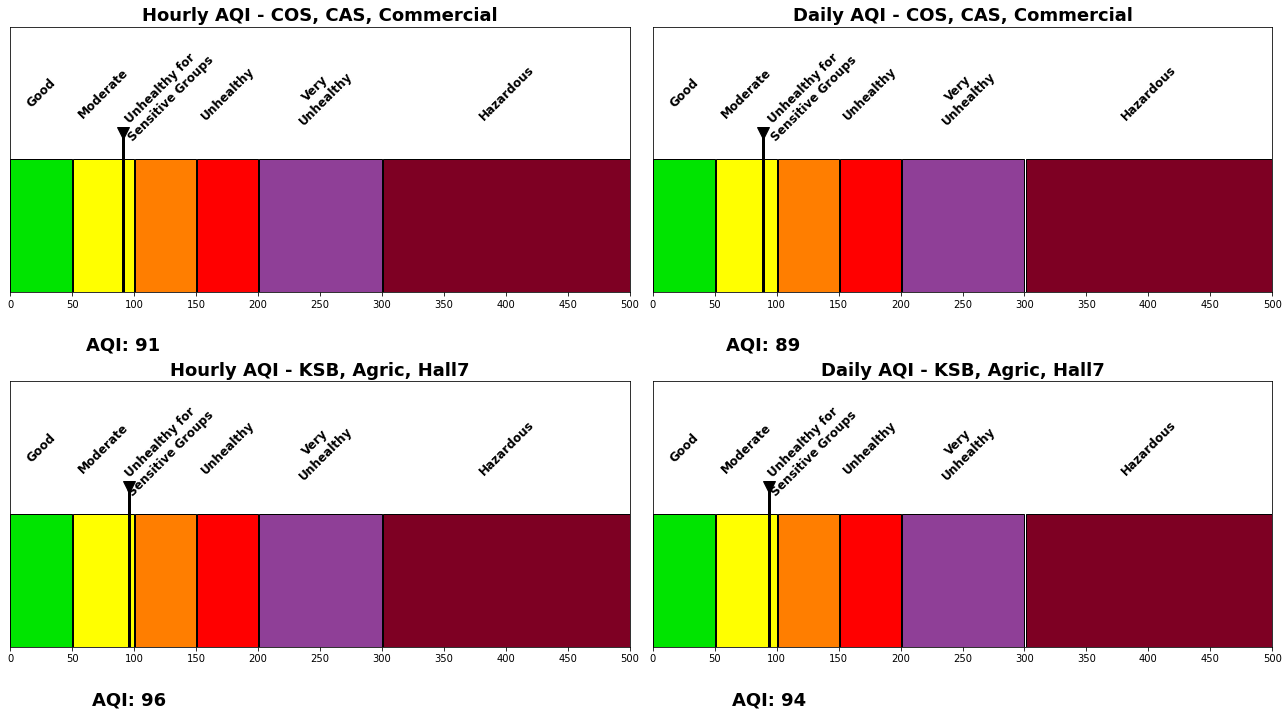

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# AQI levels (EPA USA standard)
aqi_levels = [
    (0, 50, 'Good', '#00E400'),
    (51, 100, 'Moderate', '#FFFF00'),
    (101, 150, 'Unhealthy for\nSensitive Groups', '#FF7E00'),
    (151, 200, 'Unhealthy', '#FF0000'),
    (201, 300, 'Very\nUnhealthy', '#8F3F97'),
    (301, 500, 'Hazardous', '#7E0023')
]

def draw_aqi_bar(ax, aqi_value, title):
    # Draw AQI colored ranges
    for start, end, label, color in aqi_levels:
        ax.add_patch(patches.Rectangle((start, 0), end-start, 1,
                                       facecolor=color, edgecolor="black"))
        # Bold category labels (important text)
        ax.text((start+end)/2, 1.5, label, ha="center", va="center",
                fontsize=12, fontweight="bold", rotation=45)

    # Needle marker
    ax.plot([aqi_value, aqi_value], [0, 1.2], color="black", linewidth=3)
    ax.plot(aqi_value, 1.2, "v", color="black", markersize=12)

    # Formatting
    ax.set_xlim(0, 500)
    ax.set_ylim(0, 2)
    ax.set_xticks(range(0, 501, 50))
    ax.set_yticks([])
    ax.set_title(title, fontsize=18, fontweight="bold")  # increased & bold

    # AQI value marker (emphasized)
    ax.text(aqi_value, -0.4, f"AQI: {aqi_value}", fontsize=18,
            fontweight="bold", ha="center", va="center", color="black")

# Correct AQI values
aqi_values = [91, 89, 96, 94]

# Plot 2x2 panel
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

draw_aqi_bar(axs[0,0], aqi_values[0], "Hourly AQI - COS, CAS, Commercial")
draw_aqi_bar(axs[0,1], aqi_values[1], "Daily AQI - COS, CAS, Commercial")
draw_aqi_bar(axs[1,0], aqi_values[2], "Hourly AQI - KSB, Agric, Hall7")
draw_aqi_bar(axs[1,1], aqi_values[3], "Daily AQI - KSB, Agric, Hall7")

plt.tight_layout()
plt.savefig("AQI bar.jpeg", dpi=300, format="jpeg")
plt.show()

